In [130]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
disp=pd.options.display
disp.max_rows = 100
disp.max_columns = 100

#importing the EDA modules
import os
os.chdir('C:\\Users\\hp\\Desktop\\Python\\Kaggle')
import EDA_module as EDA
import sns_eda

In [5]:
df=pd.read_csv('C:\\Users\\hp\\Desktop\\Python\\Kaggle\\Housing Prices Prediction\\train.csv')

In [6]:
df.head(100)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1          60       RL         65.0     8450   Pave   NaN      Reg   
1     2          20       RL         80.0     9600   Pave   NaN      Reg   
2     3          60       RL         68.0    11250   Pave   NaN      IR1   
3     4          70       RL         60.0     9550   Pave   NaN      IR1   
4     5          60       RL         84.0    14260   Pave   NaN      IR1   
5     6          50       RL         85.0    14115   Pave   NaN      IR1   
6     7          20       RL         75.0    10084   Pave   NaN      Reg   
7     8          60       RL          NaN    10382   Pave   NaN      IR1   
8     9          50       RM         51.0     6120   Pave   NaN      Reg   
9    10         190       RL         50.0     7420   Pave   NaN      Reg   
10   11          20       RL         70.0    11200   Pave   NaN      Reg   
11   12          60       RL         85.0    11924   Pave   NaN      IR1   
12   13          20       RL          NaN    12968   Pave   NaN      IR2   
13   14          20       RL         91.0    10652   Pave   NaN      IR1   
14   15          20       RL          NaN    10920   Pave   NaN      IR1   
15   16          45       RM         51.0     6120   Pave   NaN      Reg   
16   17          20       RL          NaN    11241   Pave   NaN      IR1   
17   18          90       RL         72.0    10791   Pave   NaN      Reg   
18   19          20       RL         66.0    13695   Pave   NaN      Reg   
19   20          20       RL         70.0     7560   Pave   NaN      Reg   
20   21          60       RL        101.0    14215   Pave   NaN      IR1   
21   22          45       RM         57.0     7449   Pave  Grvl      Reg   
22   23          20       RL         75.0     9742   Pave   NaN      Reg   
23   24         120       RM         44.0     4224   Pave   NaN      Reg   
24   25          20       RL          NaN     8246   Pave   NaN      IR1   
25   26          20       RL        110.0    14230   Pave   NaN      Reg   
26   27          20       RL         60.0     7200   Pave   NaN      Reg   
27   28          20       RL         98.0    11478   Pave   NaN      Reg   
28   29          20       RL         47.0    16321   Pave   NaN      IR1   
29   30          30       RM         60.0     6324   Pave   NaN      IR1   
30   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31   32          20       RL          NaN     8544   Pave   NaN      IR1   
32   33          20       RL         85.0    11049   Pave   NaN      Reg   
33   34          20       RL         70.0    10552   Pave   NaN      IR1   
34   35         120       RL         60.0     7313   Pave   NaN      Reg   
35   36          60       RL        108.0    13418   Pave   NaN      Reg   
36   37          20       RL        112.0    10859   Pave   NaN      Reg   
37   38          20       RL         74.0     8532   Pave   NaN      Reg   
38   39          20       RL         68.0     7922   Pave   NaN      Reg   
39   40          90       RL         65.0     6040   Pave   NaN      Reg   
40   41          20       RL         84.0     8658   Pave   NaN      Reg   
41   42          20       RL        115.0    16905   Pave   NaN      Reg   
42   43          85       RL          NaN     9180   Pave   NaN      IR1   
43   44          20       RL          NaN     9200   Pave   NaN      IR1   
44   45          20       RL         70.0     7945   Pave   NaN      Reg   
45   46         120       RL         61.0     7658   Pave   NaN      Reg   
46   47          50       RL         48.0    12822   Pave   NaN      IR1   
47   48          20       FV         84.0    11096   Pave   NaN      Reg   
48   49         190       RM         33.0     4456   Pave   NaN      Reg   
49   50          20       RL         66.0     7742   Pave   NaN      Reg   
50   51          60       RL          NaN    13869   Pave   NaN      IR2   
51   52          50       RM         52.0     6240   

In [129]:
df_sum = EDA.EDA_summary(df)
df_sum

Column Name Data Type Non-null Count Null Percentage Unique Count  \
0              Id     int64           1460           0.0 %         1460   
1      MSSubClass     int64           1460           0.0 %           15   
2        MSZoning    object           1460           0.0 %            5   
3     LotFrontage   float64           1201          17.7 %          111   
4         LotArea     int64           1460           0.0 %         1073   
5          Street    object           1460           0.0 %            2   
6           Alley    object             91          93.8 %            3   
7        LotShape    object           1460           0.0 %            4   
8     LandContour    object           1460           0.0 %            4   
9       Utilities    object           1460           0.0 %            2   
10      LotConfig    object           1460           0.0 %            5   
11      LandSlope    object           1460           0.0 %            3   
12   Neighborhood    object           1460           0.0 %           25   
13     Condition1    object           1460           0.0 %            9   
14     Condition2    object           1460           0.0 %            8   
15       BldgType    object           1460           0.0 %            5   
16     HouseStyle    object           1460           0.0 %            8   
17    OverallQual     int64           1460           0.0 %           10   
18    OverallCond     int64           1460           0.0 %            9   
19      YearBuilt     int64           1460           0.0 %          112   
20   YearRemodAdd     int64           1460           0.0 %           61   
21      RoofStyle    object           1460           0.0 %            6   
22       RoofMatl    object           1460           0.0 %            8   
23    Exterior1st    object           1460           0.0 %           15   
24    Exterior2nd    object           1460           0.0 %           16   
25     MasVnrType    object           1452           0.5 %            5   
26     MasVnrArea   float64           1452           0.5 %          328   
27      ExterQual    object           1460           0.0 %            4   
28      ExterCond    object           1460           0.0 %            5   
29     Foundation    object           1460           0.0 %            6   
30       BsmtQual    object           1423           2.5 %            5   
31       BsmtCond    object           1423           2.5 %            5   
32   BsmtExposure    object           1422           2.6 %            5   
33   BsmtFinType1    object           1423           2.5 %            7   
34     BsmtFinSF1     int64           1460           0.0 %          637   
35   BsmtFinType2    object           1422           2.6 %            7   
36     BsmtFinSF2     int64           1460           0.0 %          144   
37      BsmtUnfSF     int64           1460           0.0 %          780   
38    TotalBsmtSF     int64           1460           0.0 %          721   
39        Heating    object           1460           0.0 %            6   
40      HeatingQC    object           1460           0.0 %            5   
41     CentralAir    object           1460           0.0 %            2   
42     Electrical    object           1459           0.1 %            6   
43       1stFlrSF     int64           1460           0.0 %          753   
44       2ndFlrSF     int64           1460           0.0 %          417   
45   LowQualFinSF     int64           1460           0.0 %           24   
46      GrLivArea     int64           1460           0.0 %          861   
47   BsmtFullBath     int64           1460           0.0 %            4   
48   BsmtHalfBath     int64           1460           0.0 %            3   
49       FullBath     int64           1460           0.0 %            4   
50       HalfBath     int64           1460           0.0 %            3   
51   BedroomAbvGr     int64           1460           0.0 %            8   
52   KitchenAbvGr     int64    

Id
                                           Id                                           
    Dtype:  int64
    Values:  [1, 2, 3, 4, 5, '.............', 1456, 1457, 1458, 1459, 1460]
    

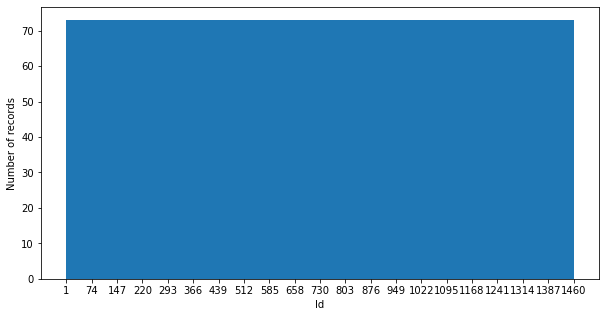

                                       MSSubClass                                       
    Dtype:  int64
    Values:  [20, 30, 40, 45, 50, '.............', 90, 120, 160, 180, 190]
    

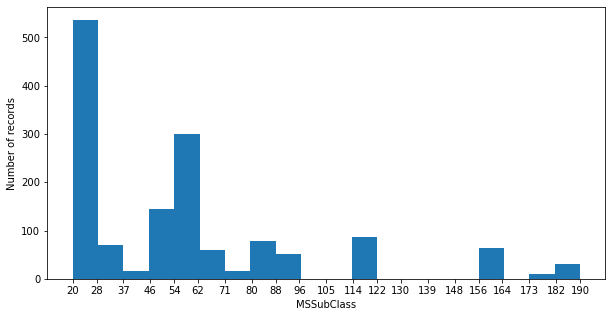

                                        MSZoning                                        
    Dtype:  object
    Values:  ['C (all)', 'FV', 'RH', 'RL', 'RM']
    Bar Plot
    

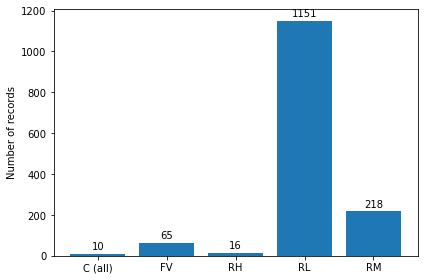

Pie Chart


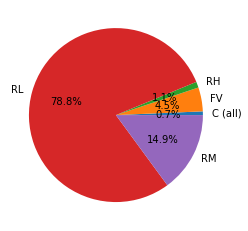

                                      LotFrontage                                       
    Dtype:  float64
    Values:  [21.0, 24.0, 30.0, 32.0, 33.0, '.............', 168.0, 174.0, 182.0, 313.0, nan]
    

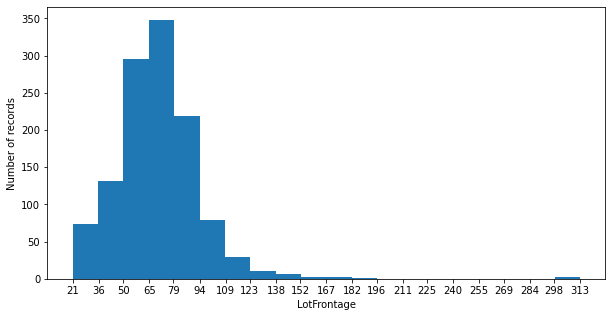

                                        LotArea                                         
    Dtype:  int64
    Values:  [1300, 1477, 1491, 1526, 1533, '.............', 70761, 115149, 159000, 164660, 215245]
    

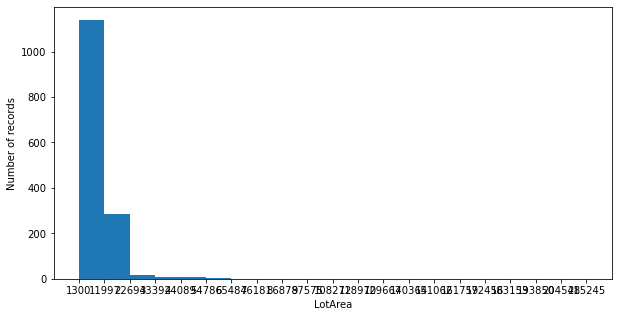

                                         Street                                         
    Dtype:  object
    Values:  ['Grvl', 'Pave']
    Bar Plot
    

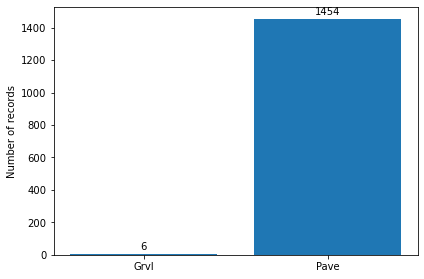

Pie Chart


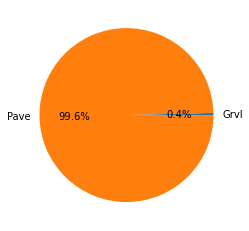

                                         Alley                                          
    Dtype:  object
    Values:  [nan, 'Grvl', 'Pave']
    Bar Plot
    

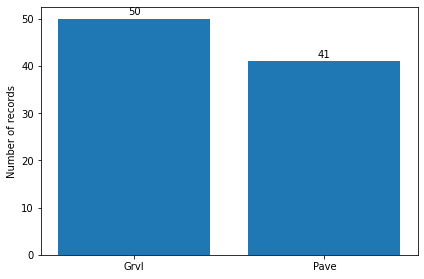

Pie Chart


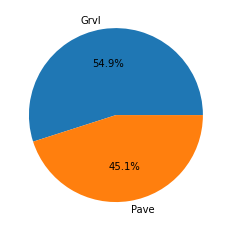

                                        LotShape                                        
    Dtype:  object
    Values:  ['IR1', 'IR2', 'IR3', 'Reg']
    Bar Plot
    

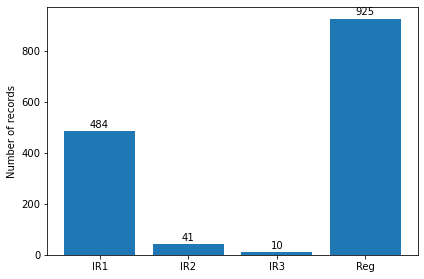

Pie Chart


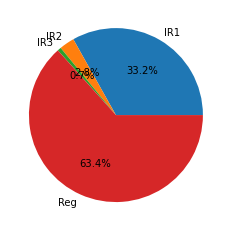

                                      LandContour                                       
    Dtype:  object
    Values:  ['Bnk', 'HLS', 'Low', 'Lvl']
    Bar Plot
    

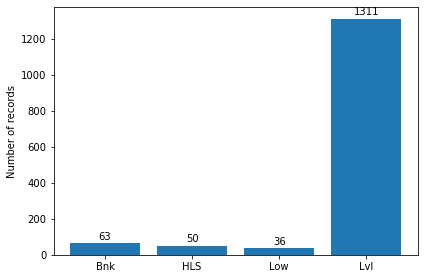

Pie Chart


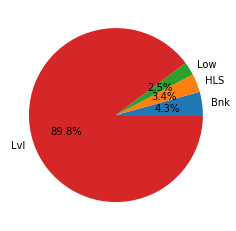

                                       Utilities                                        
    Dtype:  object
    Values:  ['AllPub', 'NoSeWa']
    Bar Plot
    

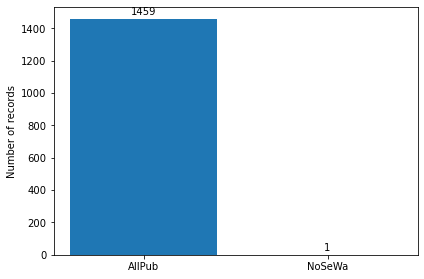

Pie Chart


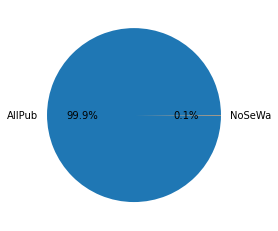

                                       LotConfig                                        
    Dtype:  object
    Values:  ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']
    Bar Plot
    

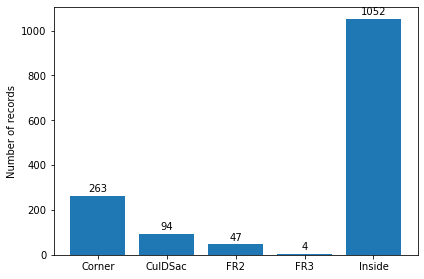

Pie Chart


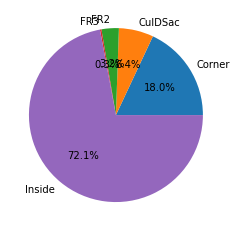

                                       LandSlope                                        
    Dtype:  object
    Values:  ['Gtl', 'Mod', 'Sev']
    Bar Plot
    

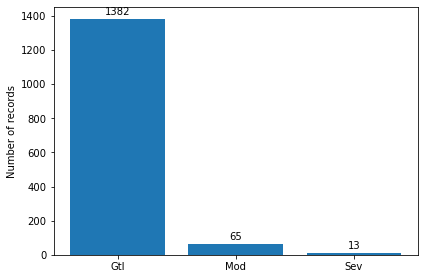

Pie Chart


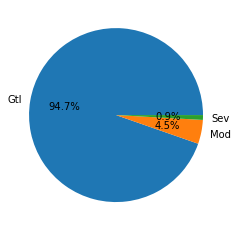

                                      Neighborhood                                      
    Dtype:  object
    Values:  ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', '.............', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
                                           Condition1                                       
    Dtype:  object
    Values:  ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']
    Bar Plot
    

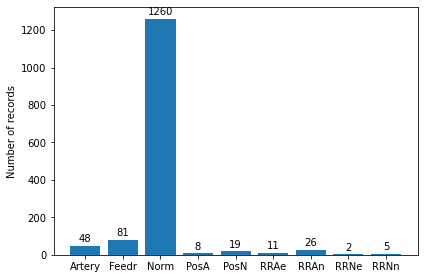

Pie Chart


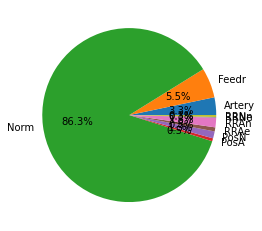

                                       Condition2                                       
    Dtype:  object
    Values:  ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn']
    Bar Plot
    

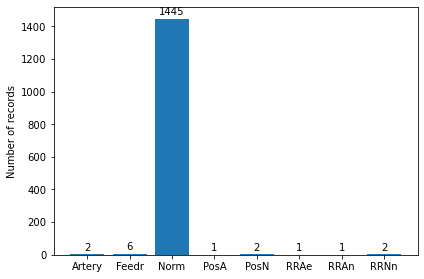

Pie Chart


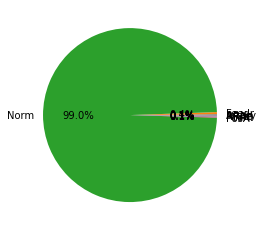

                                        BldgType                                        
    Dtype:  object
    Values:  ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']
    Bar Plot
    

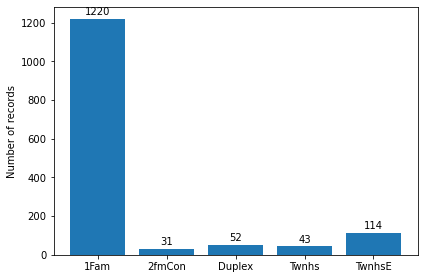

Pie Chart


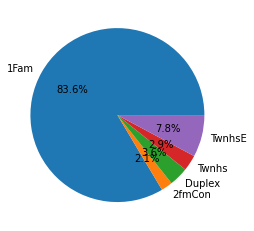

                                       HouseStyle                                       
    Dtype:  object
    Values:  ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']
    Bar Plot
    

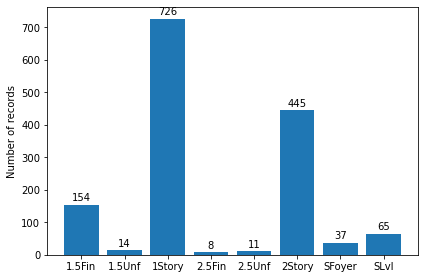

Pie Chart


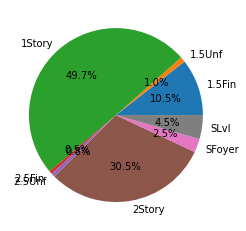

                                      OverallQual                                       
    Dtype:  int64
    Values:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    

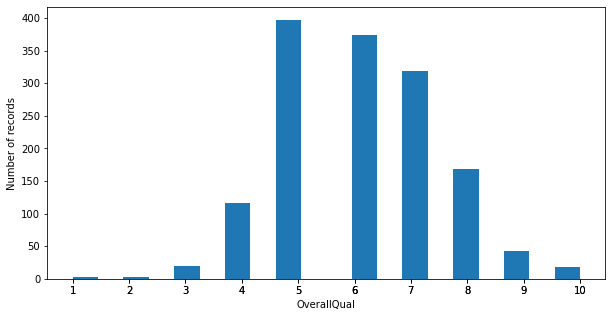

                                      OverallCond                                       
    Dtype:  int64
    Values:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
    Bar Plot
    

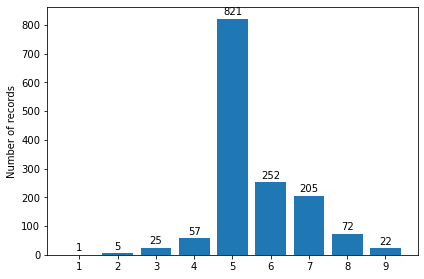

Pie Chart


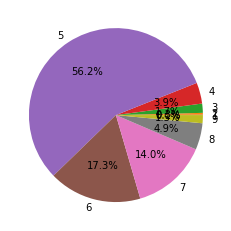

                                       YearBuilt                                        
    Dtype:  int64
    Values:  [1872, 1875, 1880, 1882, 1885, '.............', 2006, 2007, 2008, 2009, 2010]
    

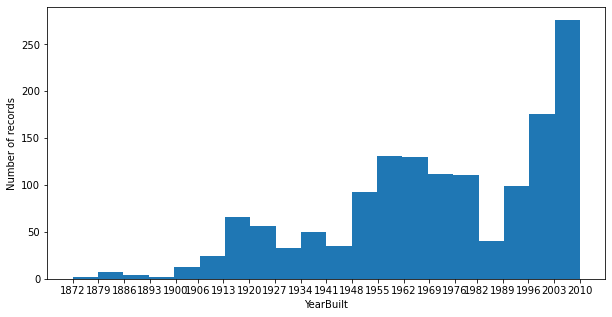

                                      YearRemodAdd                                      
    Dtype:  int64
    Values:  [1950, 1951, 1952, 1953, 1954, '.............', 2006, 2007, 2008, 2009, 2010]
    

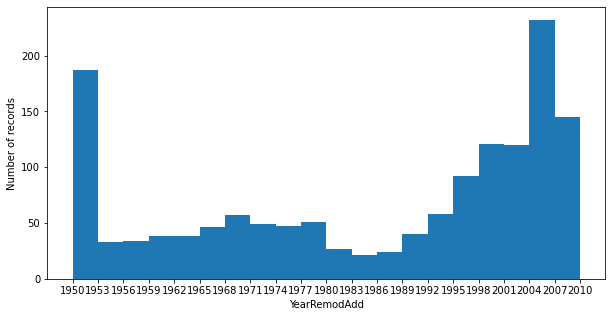

                                       RoofStyle                                        
    Dtype:  object
    Values:  ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']
    Bar Plot
    

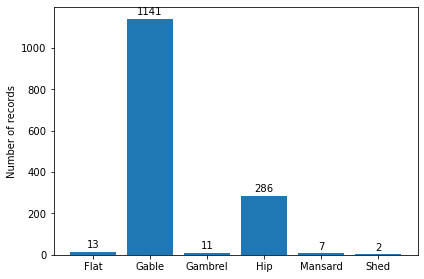

Pie Chart


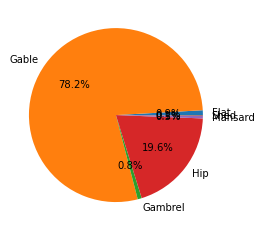

                                        RoofMatl                                        
    Dtype:  object
    Values:  ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl']
    Bar Plot
    

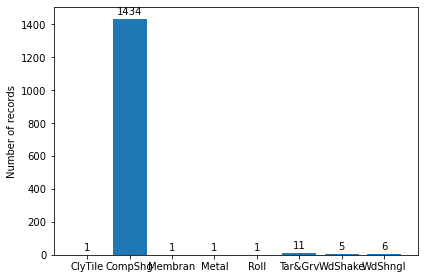

Pie Chart


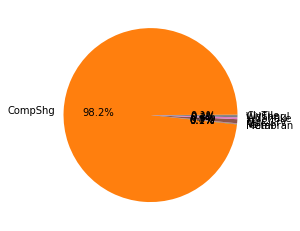

                                      Exterior1st                                       
    Dtype:  object
    Values:  ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', '.............', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']
                                          Exterior2nd                                       
    Dtype:  object
    Values:  ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', '.............', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng']
                                           MasVnrType                                       
    Dtype:  object
    Values:  ['BrkFace', 'None', 'Stone', 'BrkCmn', nan]
    Bar Plot
    

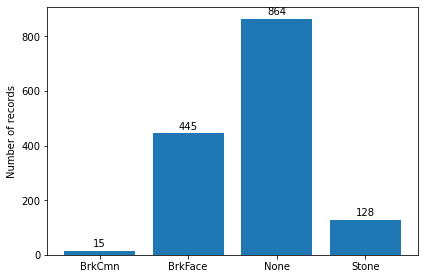

Pie Chart


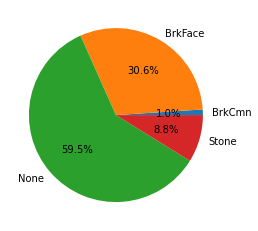

                                       MasVnrArea                                       
    Dtype:  float64
    Values:  [0.0, 1.0, 11.0, 14.0, 16.0, '.............', 1129.0, 1170.0, 1378.0, 1600.0, nan]
    

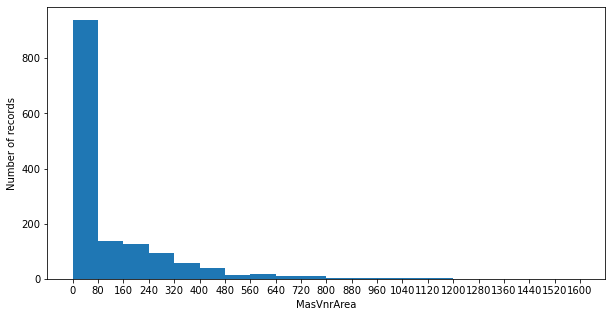

                                       ExterQual                                        
    Dtype:  object
    Values:  ['Ex', 'Fa', 'Gd', 'TA']
    Bar Plot
    

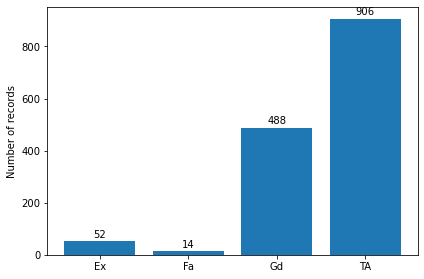

Pie Chart


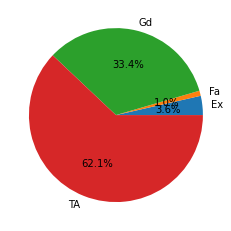

                                       ExterCond                                        
    Dtype:  object
    Values:  ['Ex', 'Fa', 'Gd', 'Po', 'TA']
    Bar Plot
    

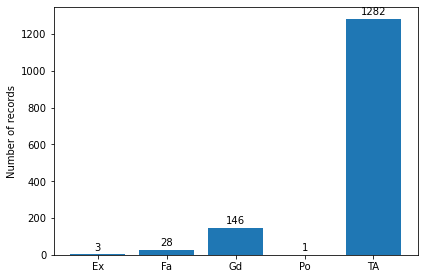

Pie Chart


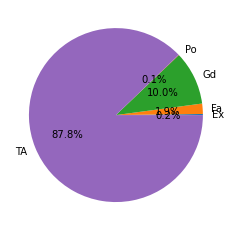

                                       Foundation                                       
    Dtype:  object
    Values:  ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood']
    Bar Plot
    

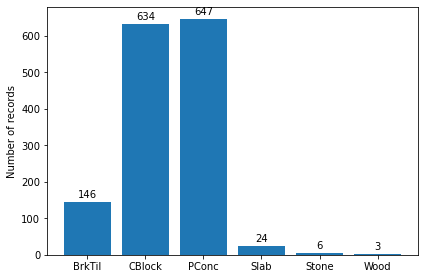

Pie Chart


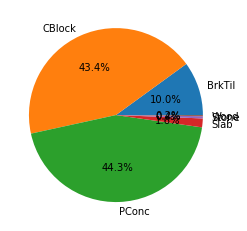

                                        BsmtQual                                        
    Dtype:  object
    Values:  ['Gd', 'TA', 'Ex', nan, 'Fa']
    Bar Plot
    

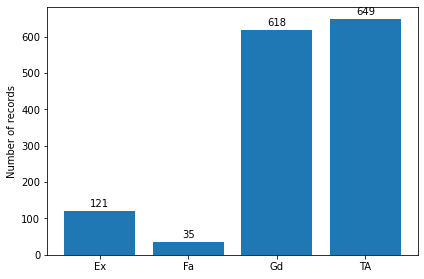

Pie Chart


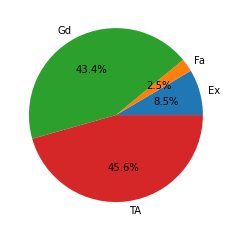

                                        BsmtCond                                        
    Dtype:  object
    Values:  ['TA', 'Gd', nan, 'Fa', 'Po']
    Bar Plot
    

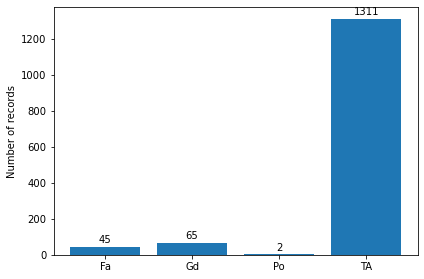

Pie Chart


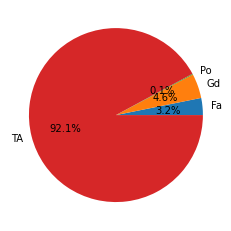

                                      BsmtExposure                                      
    Dtype:  object
    Values:  ['No', 'Gd', 'Mn', 'Av', nan]
    Bar Plot
    

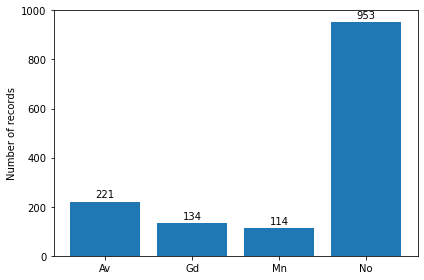

Pie Chart


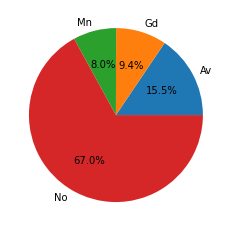

                                      BsmtFinType1                                      
    Dtype:  object
    Values:  ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ']
    Bar Plot
    

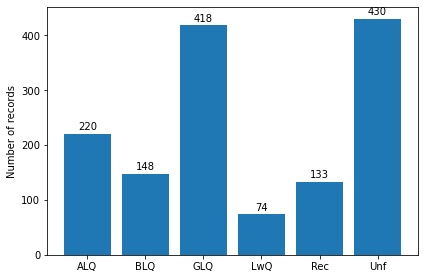

Pie Chart


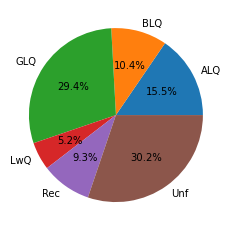

                                       BsmtFinSF1                                       
    Dtype:  int64
    Values:  [0, 2, 16, 20, 24, '.............', 1904, 2096, 2188, 2260, 5644]
    

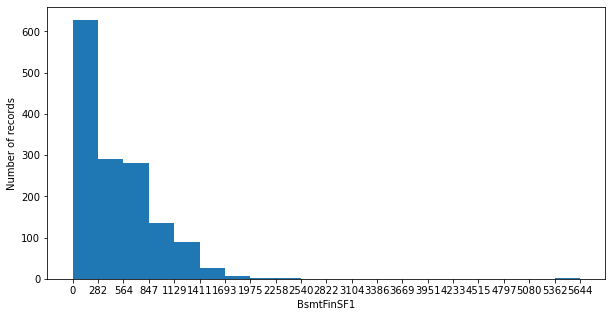

                                      BsmtFinType2                                      
    Dtype:  object
    Values:  ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ']
    Bar Plot
    

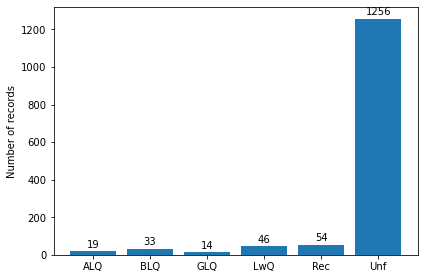

Pie Chart


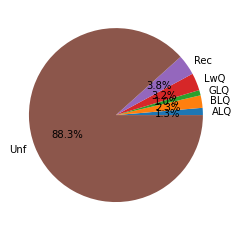

                                       BsmtFinSF2                                       
    Dtype:  int64
    Values:  [0, 28, 32, 35, 40, '.............', 1080, 1085, 1120, 1127, 1474]
    

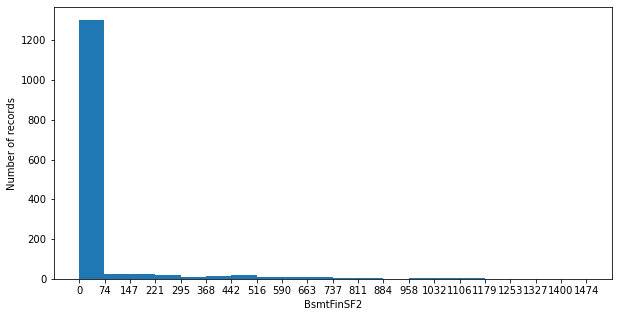

                                       BsmtUnfSF                                        
    Dtype:  int64
    Values:  [0, 14, 15, 23, 26, '.............', 2042, 2046, 2121, 2153, 2336]
    

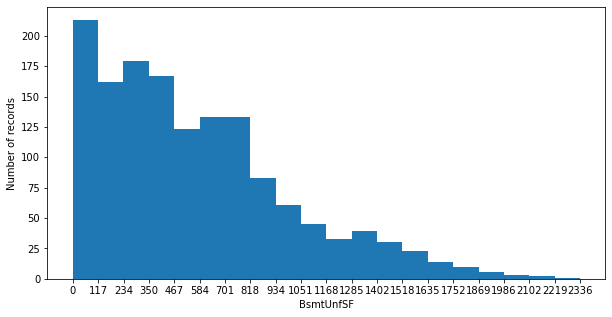

                                      TotalBsmtSF                                       
    Dtype:  int64
    Values:  [0, 105, 190, 264, 270, '.............', 3094, 3138, 3200, 3206, 6110]
    

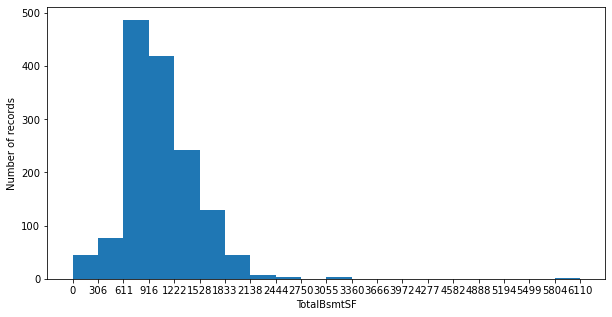

                                        Heating                                         
    Dtype:  object
    Values:  ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall']
    Bar Plot
    

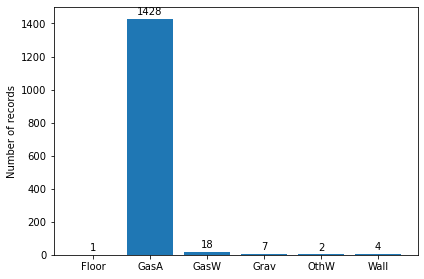

Pie Chart


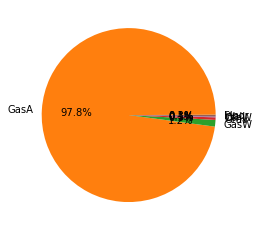

                                       HeatingQC                                        
    Dtype:  object
    Values:  ['Ex', 'Fa', 'Gd', 'Po', 'TA']
    Bar Plot
    

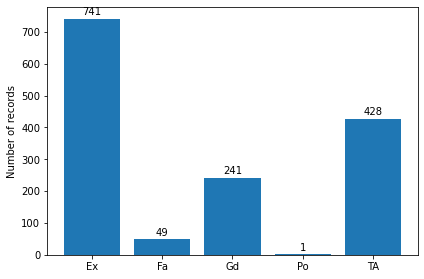

Pie Chart


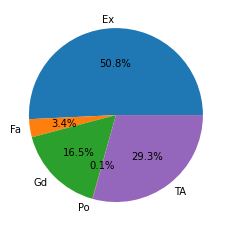

                                       CentralAir                                       
    Dtype:  object
    Values:  ['N', 'Y']
    Bar Plot
    

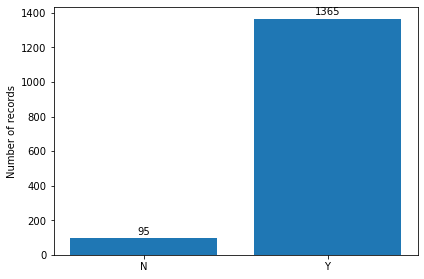

Pie Chart


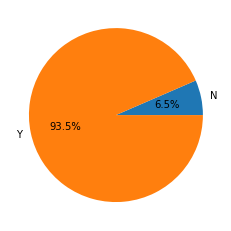

                                       Electrical                                       
    Dtype:  object
    Values:  ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan]
    Bar Plot
    

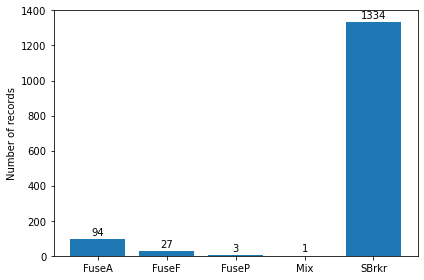

Pie Chart


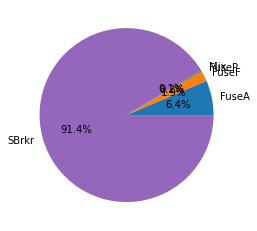

                                        1stFlrSF                                        
    Dtype:  int64
    Values:  [334, 372, 438, 480, 483, '.............', 2633, 2898, 3138, 3228, 4692]
    

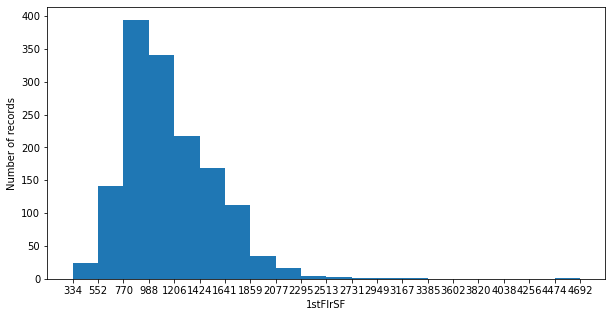

                                        2ndFlrSF                                        
    Dtype:  int64
    Values:  [0, 110, 167, 192, 208, '.............', 1611, 1796, 1818, 1872, 2065]
    

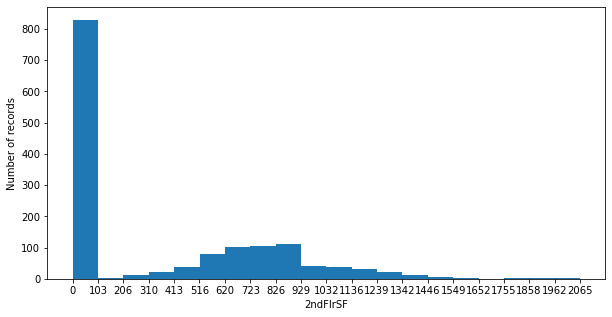

                                      LowQualFinSF                                      
    Dtype:  int64
    Values:  [0, 53, 80, 120, 144, '.............', 513, 514, 515, 528, 572]
    

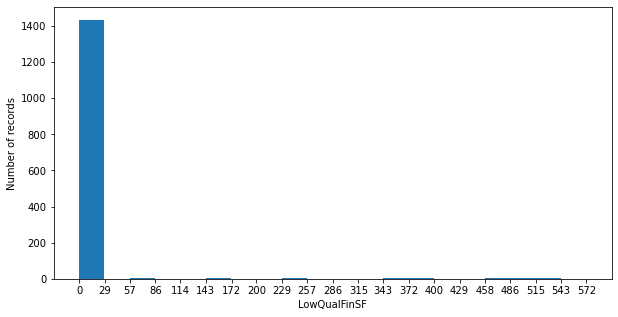

                                       GrLivArea                                        
    Dtype:  int64
    Values:  [334, 438, 480, 520, 605, '.............', 3627, 4316, 4476, 4676, 5642]
    

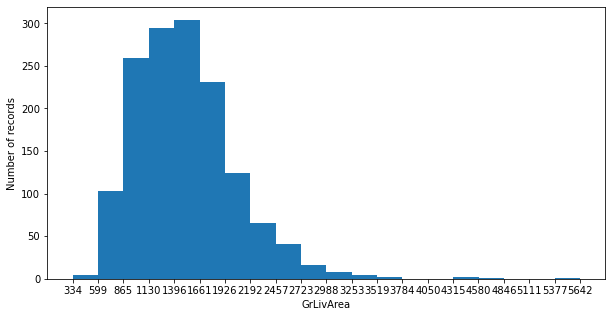

                                      BsmtFullBath                                      
    Dtype:  int64
    Values:  [0, 1, 2, 3]
    Bar Plot
    

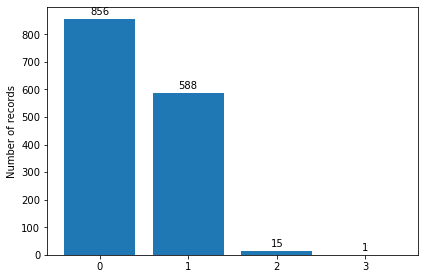

Pie Chart


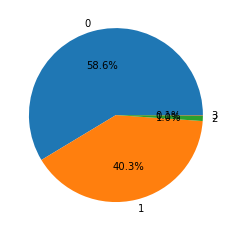

                                      BsmtHalfBath                                      
    Dtype:  int64
    Values:  [0, 1, 2]
    Bar Plot
    

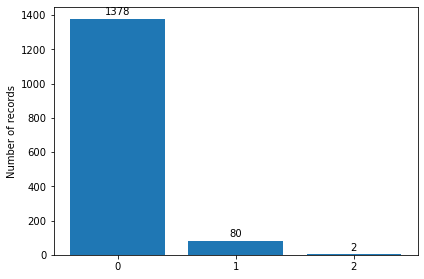

Pie Chart


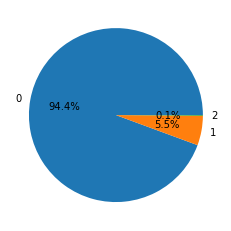

                                        FullBath                                        
    Dtype:  int64
    Values:  [0, 1, 2, 3]
    Bar Plot
    

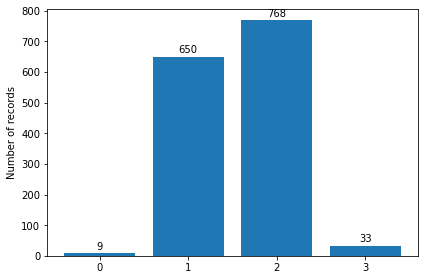

Pie Chart


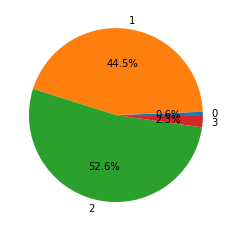

                                        HalfBath                                        
    Dtype:  int64
    Values:  [0, 1, 2]
    Bar Plot
    

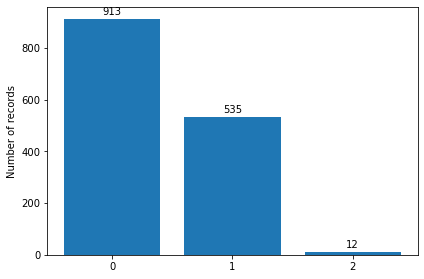

Pie Chart


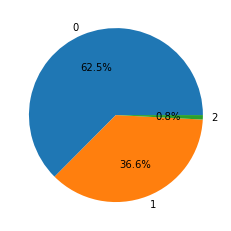

                                      BedroomAbvGr                                      
    Dtype:  int64
    Values:  [0, 1, 2, 3, 4, 5, 6, 8]
    Bar Plot
    

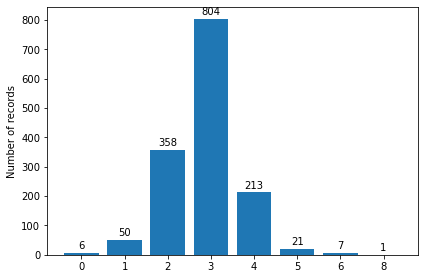

Pie Chart


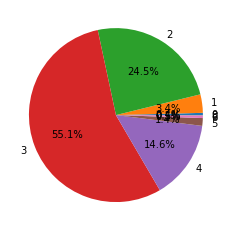

                                      KitchenAbvGr                                      
    Dtype:  int64
    Values:  [0, 1, 2, 3]
    Bar Plot
    

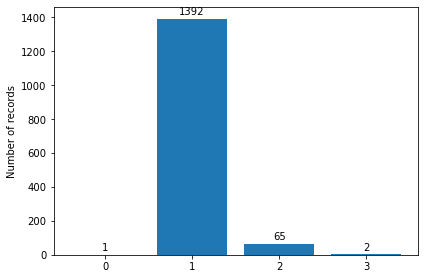

Pie Chart


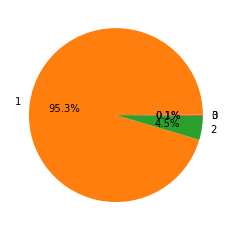

                                      KitchenQual                                       
    Dtype:  object
    Values:  ['Ex', 'Fa', 'Gd', 'TA']
    Bar Plot
    

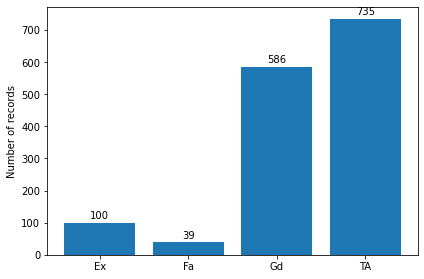

Pie Chart


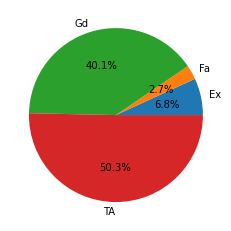

                                      TotRmsAbvGrd                                      
    Dtype:  int64
    Values:  [2, 3, 4, 5, 6, '.............', 9, 10, 11, 12, 14]
    

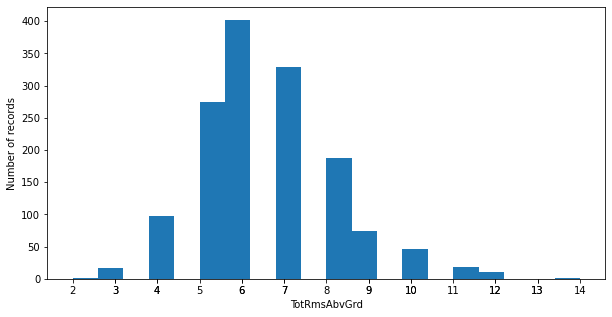

                                       Functional                                       
    Dtype:  object
    Values:  ['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ']
    Bar Plot
    

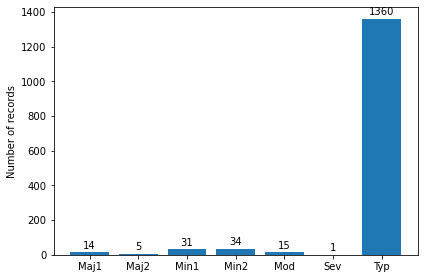

Pie Chart


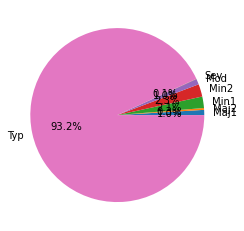

                                       Fireplaces                                       
    Dtype:  int64
    Values:  [0, 1, 2, 3]
    Bar Plot
    

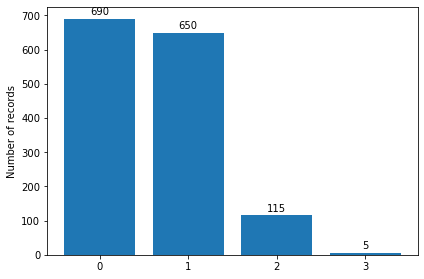

Pie Chart


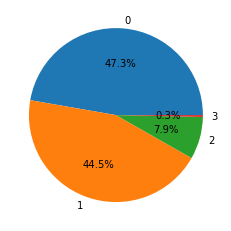

                                      FireplaceQu                                       
    Dtype:  object
    Values:  [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po']
    Bar Plot
    

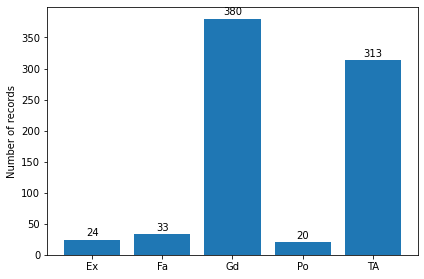

Pie Chart


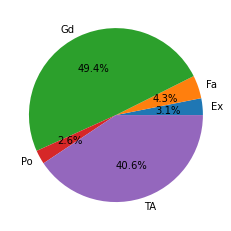

                                       GarageType                                       
    Dtype:  object
    Values:  ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types']
    Bar Plot
    

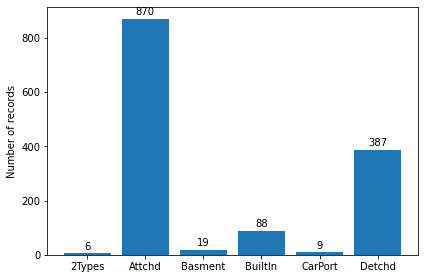

Pie Chart


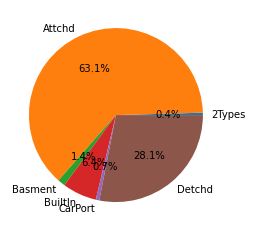

                                      GarageYrBlt                                       
    Dtype:  float64
    Values:  [1900.0, 1906.0, 1908.0, 1910.0, 1914.0, '.............', 2007.0, 2008.0, 2009.0, 2010.0, nan]
    

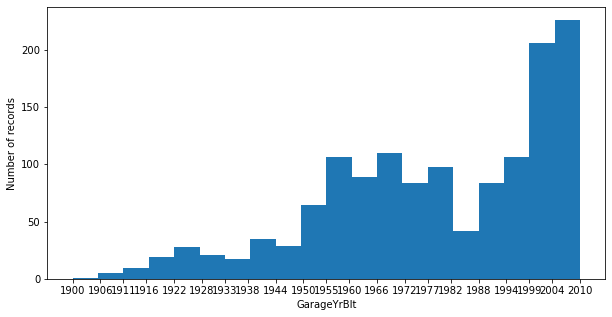

                                      GarageFinish                                      
    Dtype:  object
    Values:  ['RFn', 'Unf', 'Fin', nan]
    Bar Plot
    

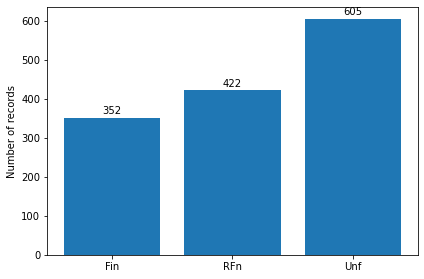

Pie Chart


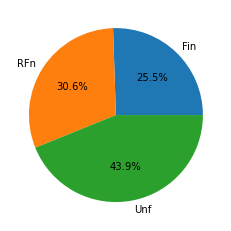

                                       GarageCars                                       
    Dtype:  int64
    Values:  [0, 1, 2, 3, 4]
    Bar Plot
    

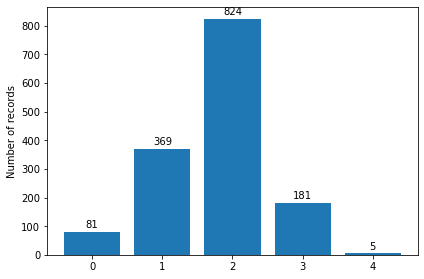

Pie Chart


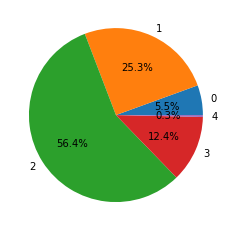

                                       GarageArea                                       
    Dtype:  int64
    Values:  [0, 160, 164, 180, 186, '.............', 1220, 1248, 1356, 1390, 1418]
    

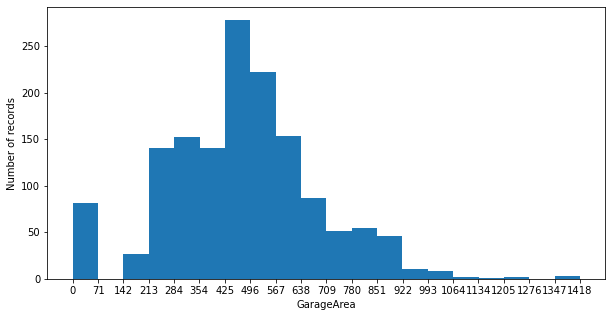

                                       GarageQual                                       
    Dtype:  object
    Values:  ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po']
    Bar Plot
    

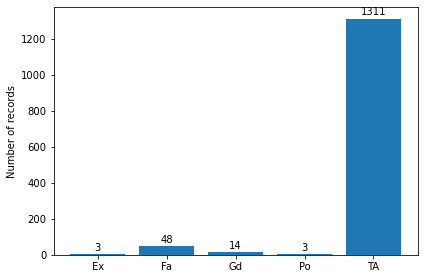

Pie Chart


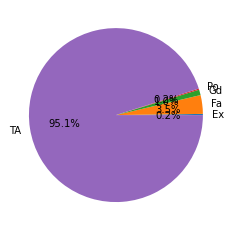

                                       GarageCond                                       
    Dtype:  object
    Values:  ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']
    Bar Plot
    

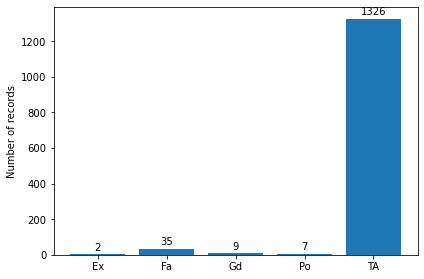

Pie Chart


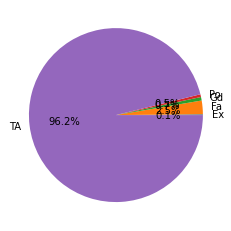

                                       PavedDrive                                       
    Dtype:  object
    Values:  ['N', 'P', 'Y']
    Bar Plot
    

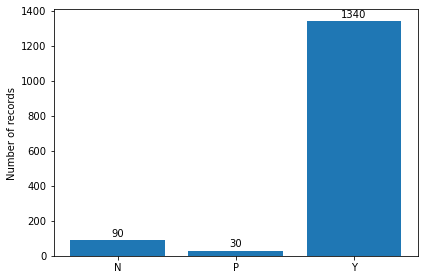

Pie Chart


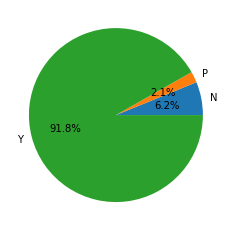

                                       WoodDeckSF                                       
    Dtype:  int64
    Values:  [0, 12, 24, 26, 28, '.............', 668, 670, 728, 736, 857]
    

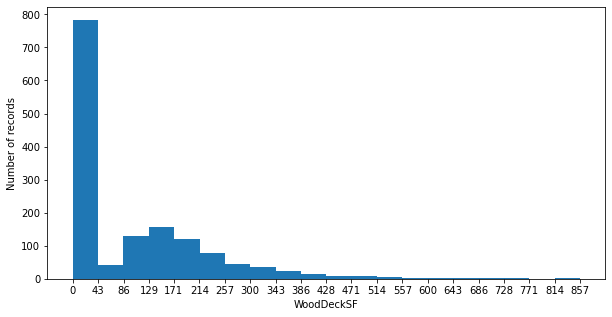

                                      OpenPorchSF                                       
    Dtype:  int64
    Values:  [0, 4, 8, 10, 11, '.............', 406, 418, 502, 523, 547]
    

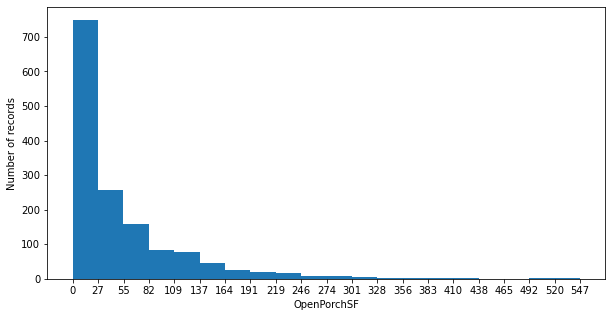

                                     EnclosedPorch                                      
    Dtype:  int64
    Values:  [0, 19, 20, 24, 30, '.............', 301, 318, 330, 386, 552]
    

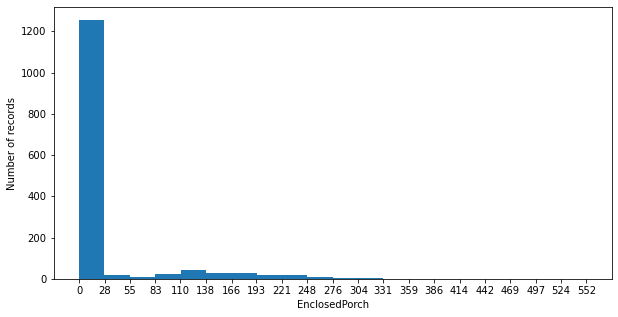

                                       3SsnPorch                                        
    Dtype:  int64
    Values:  [0, 23, 96, 130, 140, '.............', 290, 304, 320, 407, 508]
    

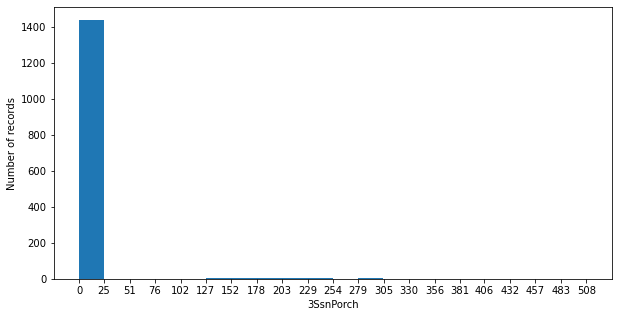

                                      ScreenPorch                                       
    Dtype:  int64
    Values:  [0, 40, 53, 60, 63, '.............', 385, 396, 410, 440, 480]
    

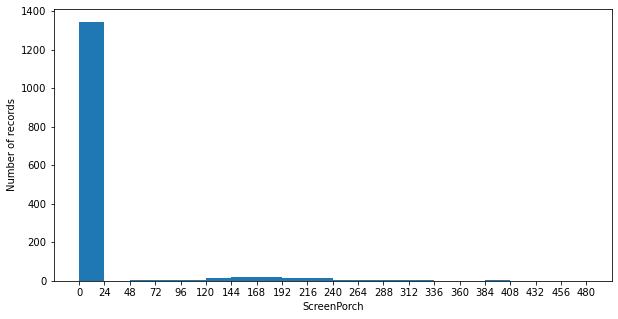

                                        PoolArea                                        
    Dtype:  int64
    Values:  [0, 480, 512, 519, 555, 576, 648, 738]
    Bar Plot
    

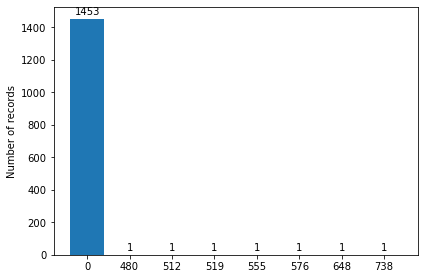

Pie Chart


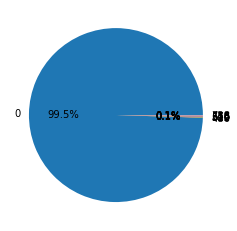

                                         PoolQC                                         
    Dtype:  object
    Values:  [nan, 'Ex', 'Fa', 'Gd']
    Bar Plot
    

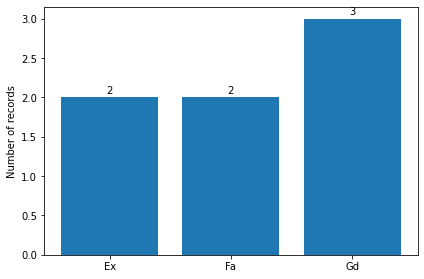

Pie Chart


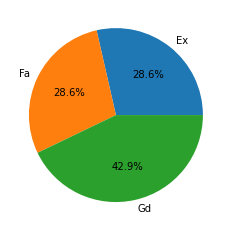

                                         Fence                                          
    Dtype:  object
    Values:  [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']
    Bar Plot
    

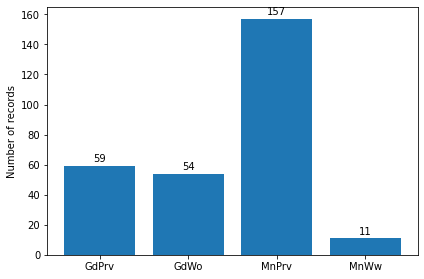

Pie Chart


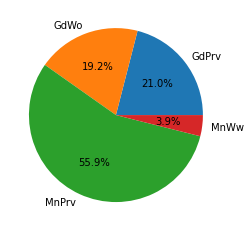

                                      MiscFeature                                       
    Dtype:  object
    Values:  [nan, 'Shed', 'Gar2', 'Othr', 'TenC']
    Bar Plot
    

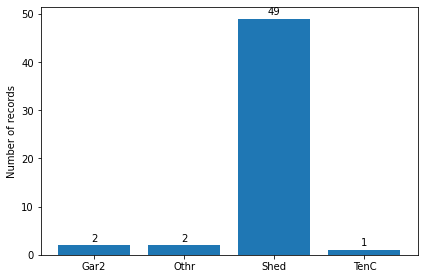

Pie Chart


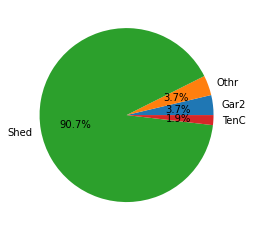

                                        MiscVal                                         
    Dtype:  int64
    Values:  [0, 54, 350, 400, 450, '.............', 2000, 2500, 3500, 8300, 15500]
    

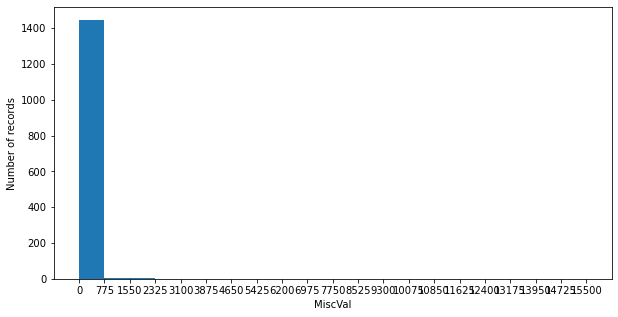

                                         MoSold                                         
    Dtype:  int64
    Values:  [1, 2, 3, 4, 5, '.............', 8, 9, 10, 11, 12]
    

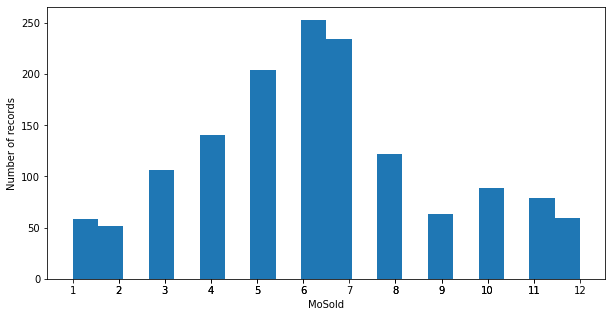

                                         YrSold                                         
    Dtype:  int64
    Values:  [2006, 2007, 2008, 2009, 2010]
    Bar Plot
    

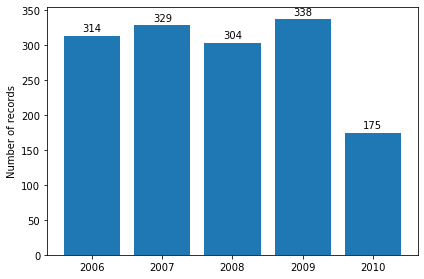

Pie Chart


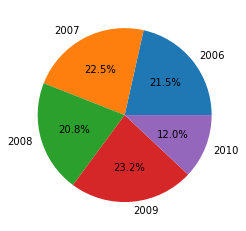

                                        SaleType                                        
    Dtype:  object
    Values:  ['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD']
    Bar Plot
    

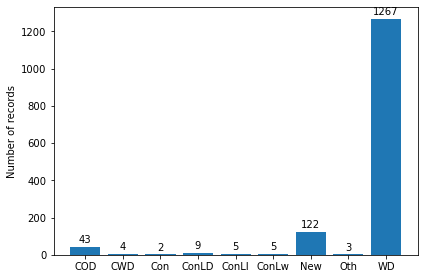

Pie Chart


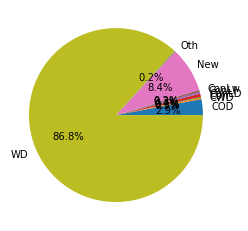

                                     SaleCondition                                      
    Dtype:  object
    Values:  ['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']
    Bar Plot
    

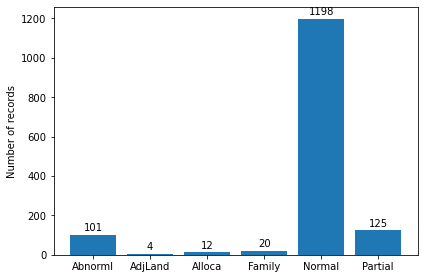

Pie Chart


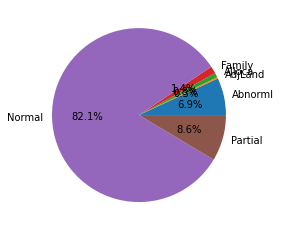

                                       SalePrice                                        
    Dtype:  int64
    Values:  [34900, 35311, 37900, 39300, 40000, '.............', 582933, 611657, 625000, 745000, 755000]
    

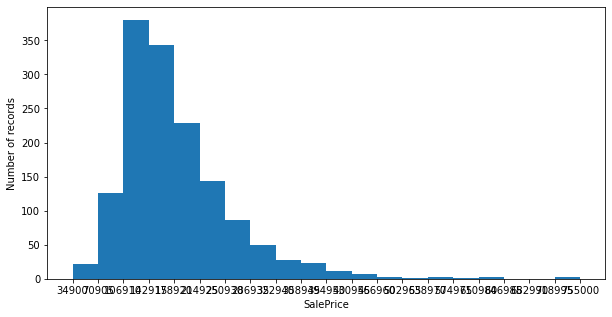

In [10]:
EDA.EDA_column_summary(df)

                                           Id                                           
    Number of Unique Values 1460
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [1, 2, 3, 4, 5, '.............', 1456, 1457, 1458, 1459, 1460]


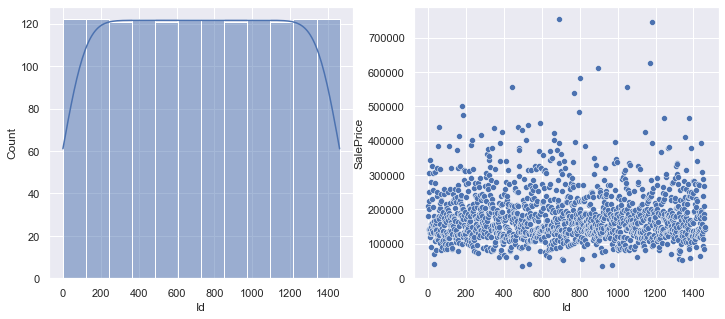


 
 

                                       MSSubClass                                       
    Number of Unique Values 15
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [20, 30, 40, 45, 50, '.............', 90, 120, 160, 180, 190]


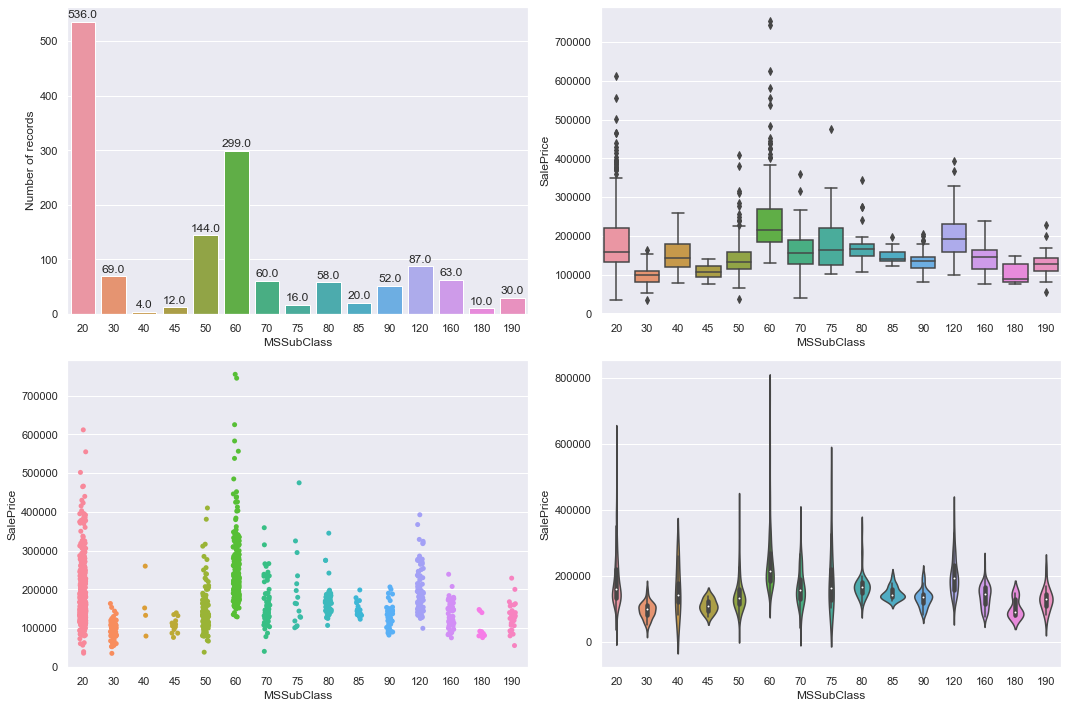


 
 

                                        MSZoning                                        
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['C (all)', 'FV', 'RH', 'RL', 'RM']


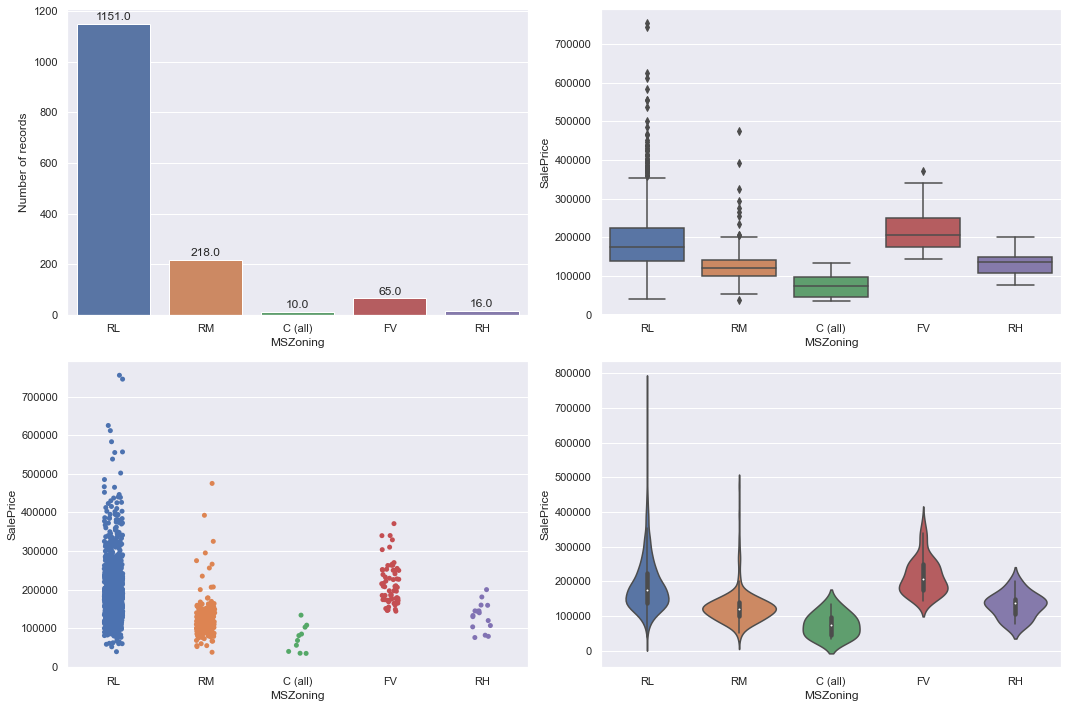


 
 

                                      LotFrontage                                       
    Number of Unique Values 111
Datatype of column: float64
Null Percentage:  17.7 %
Number of Non-null values 1201
Values like  [21.0, 24.0, 30.0, 32.0, 33.0, '.............', 168.0, 174.0, 182.0, 313.0, nan]


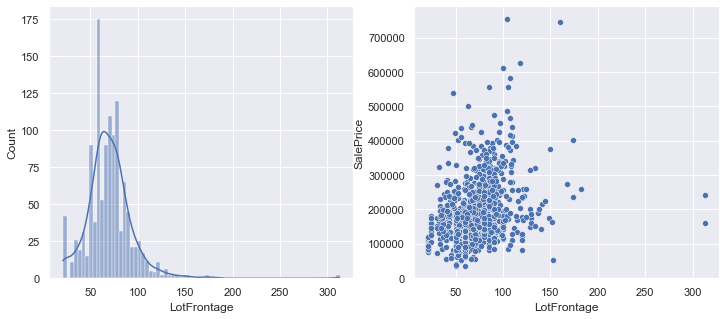


 
 

                                        LotArea                                         
    Number of Unique Values 1073
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [1300, 1477, 1491, 1526, 1533, '.............', 70761, 115149, 159000, 164660, 215245]


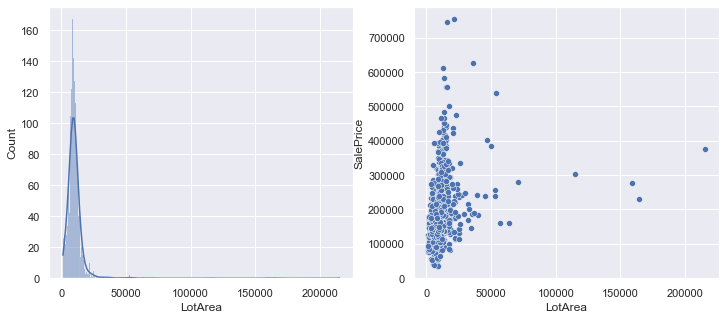


 
 

                                         Street                                         
    Number of Unique Values 2
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Grvl', 'Pave']


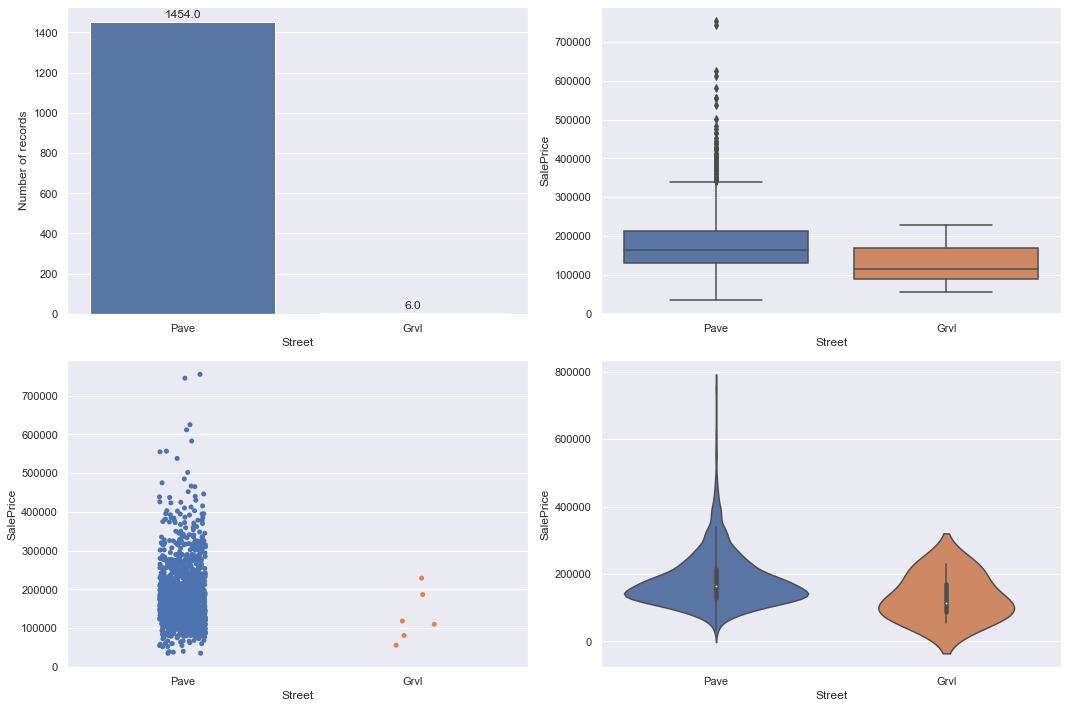


 
 

                                         Alley                                          
    Number of Unique Values 3
Datatype of column: object
Null Percentage:  93.8 %
Number of Non-null values 91
Values like  [nan, 'Grvl', 'Pave']


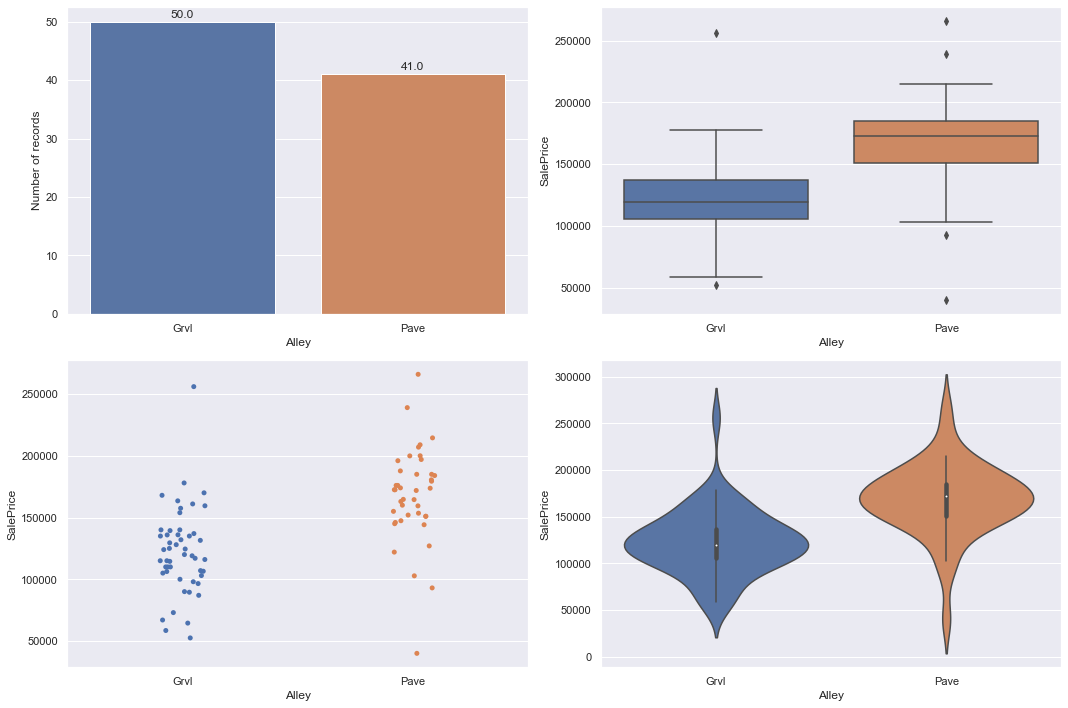


 
 

                                        LotShape                                        
    Number of Unique Values 4
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['IR1', 'IR2', 'IR3', 'Reg']


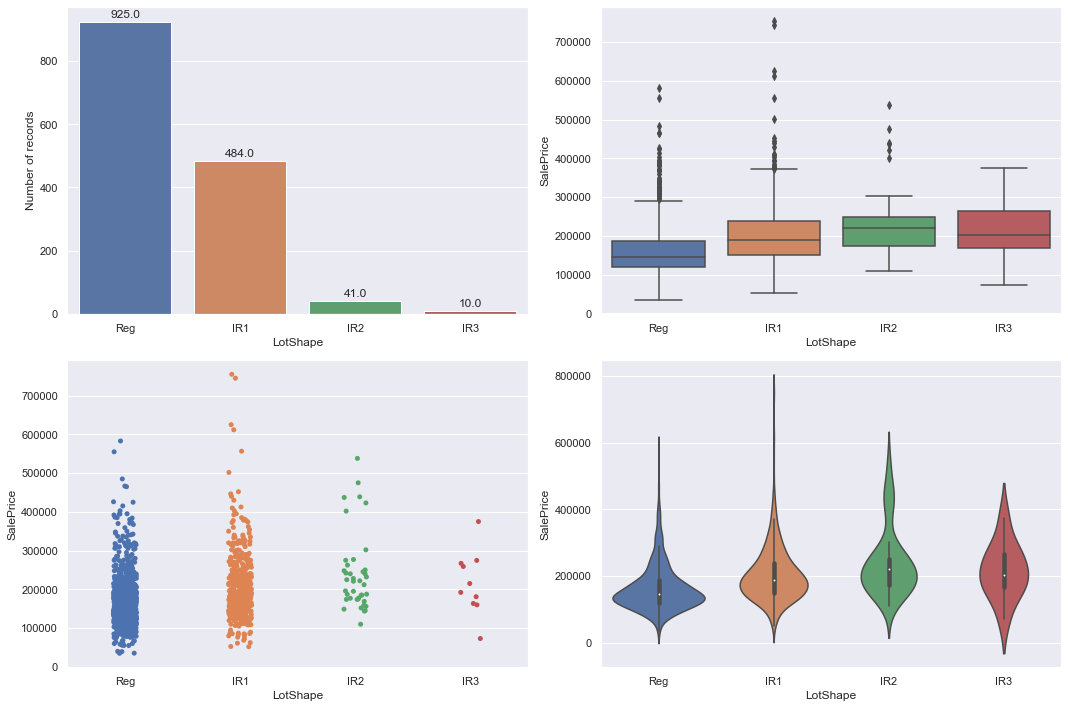


 
 

                                      LandContour                                       
    Number of Unique Values 4
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Bnk', 'HLS', 'Low', 'Lvl']


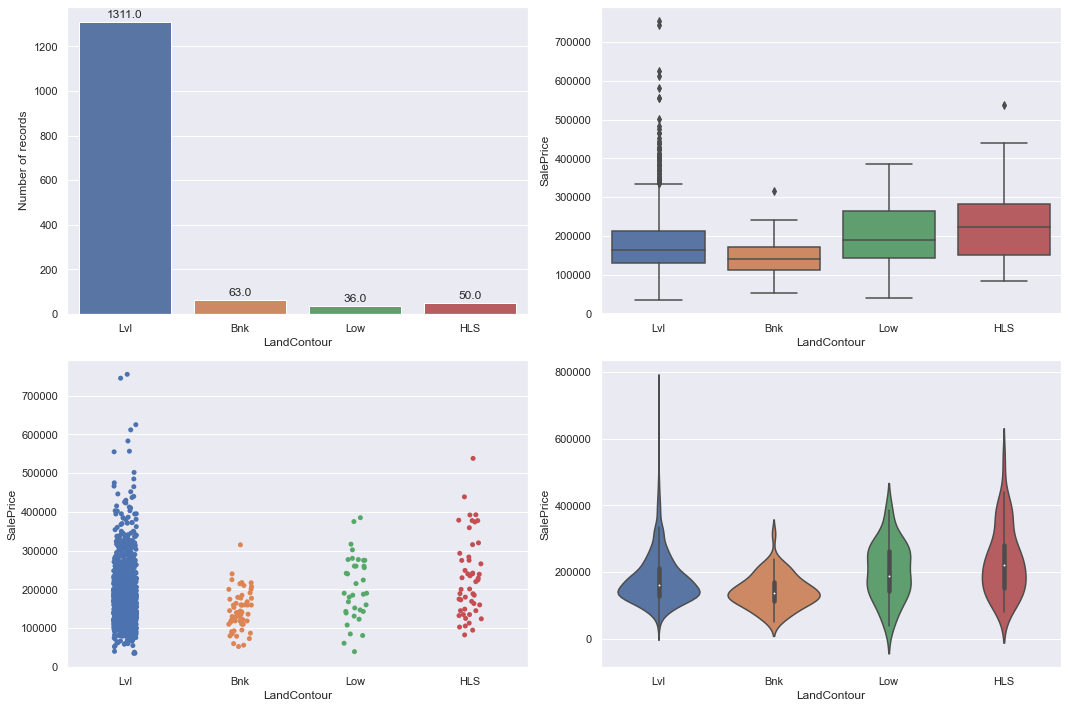


 
 

                                       Utilities                                        
    Number of Unique Values 2
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['AllPub', 'NoSeWa']


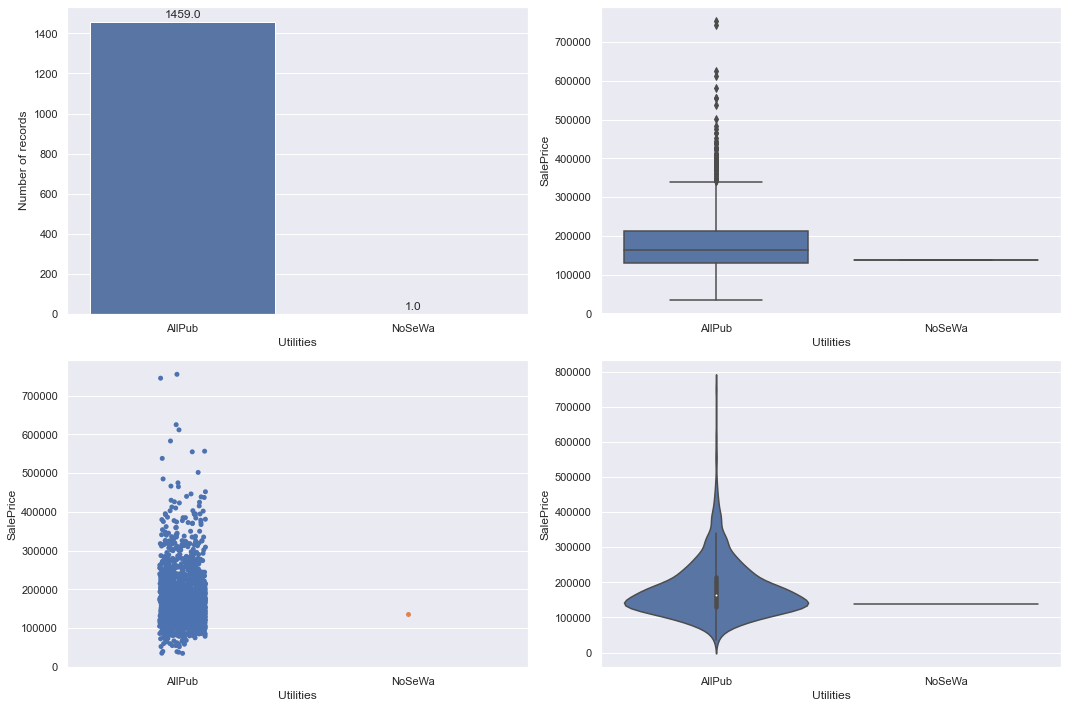


 
 

                                       LotConfig                                        
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']


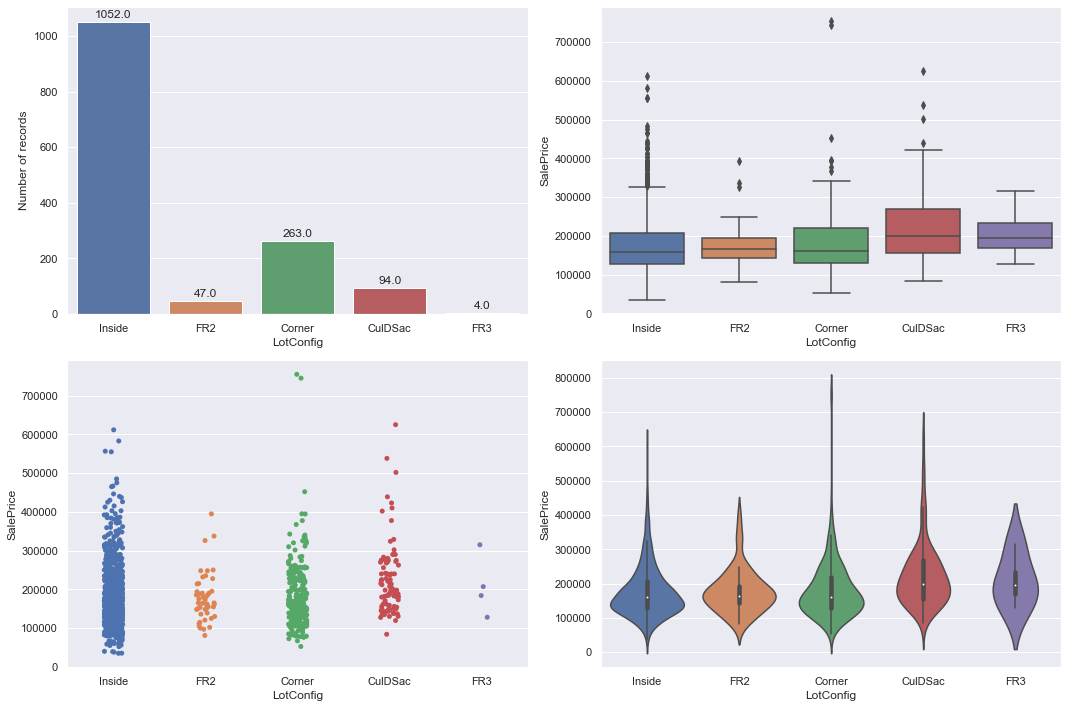


 
 

                                       LandSlope                                        
    Number of Unique Values 3
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Gtl', 'Mod', 'Sev']


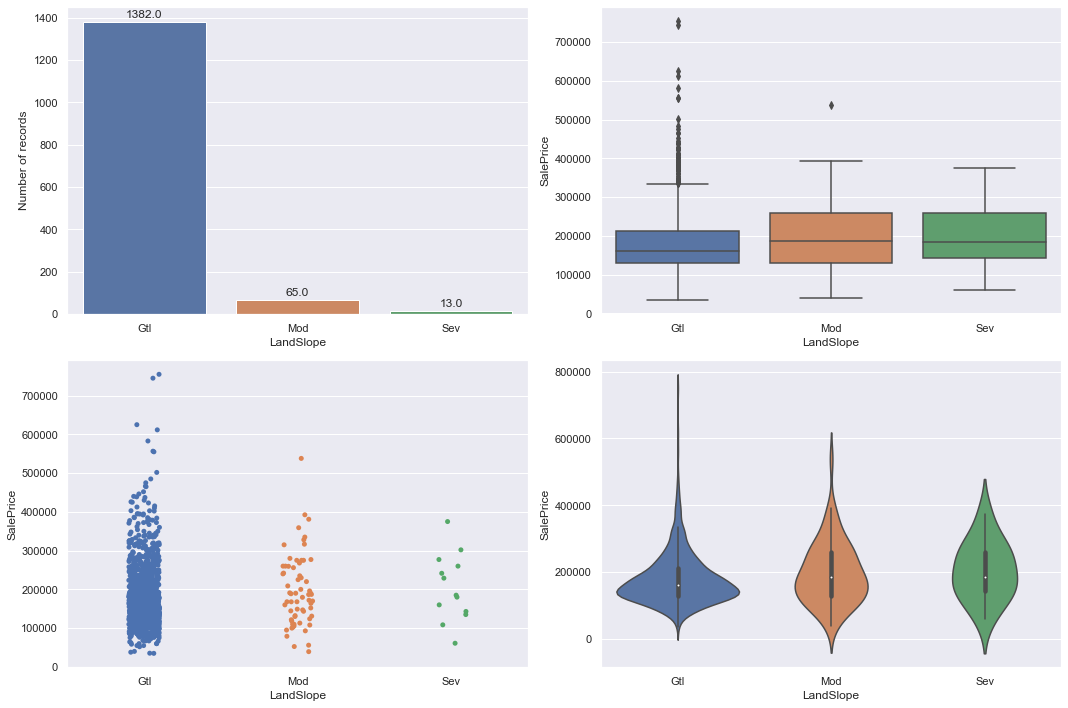


 
 

                                      Neighborhood                                      
    Number of Unique Values 25
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', '.............', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


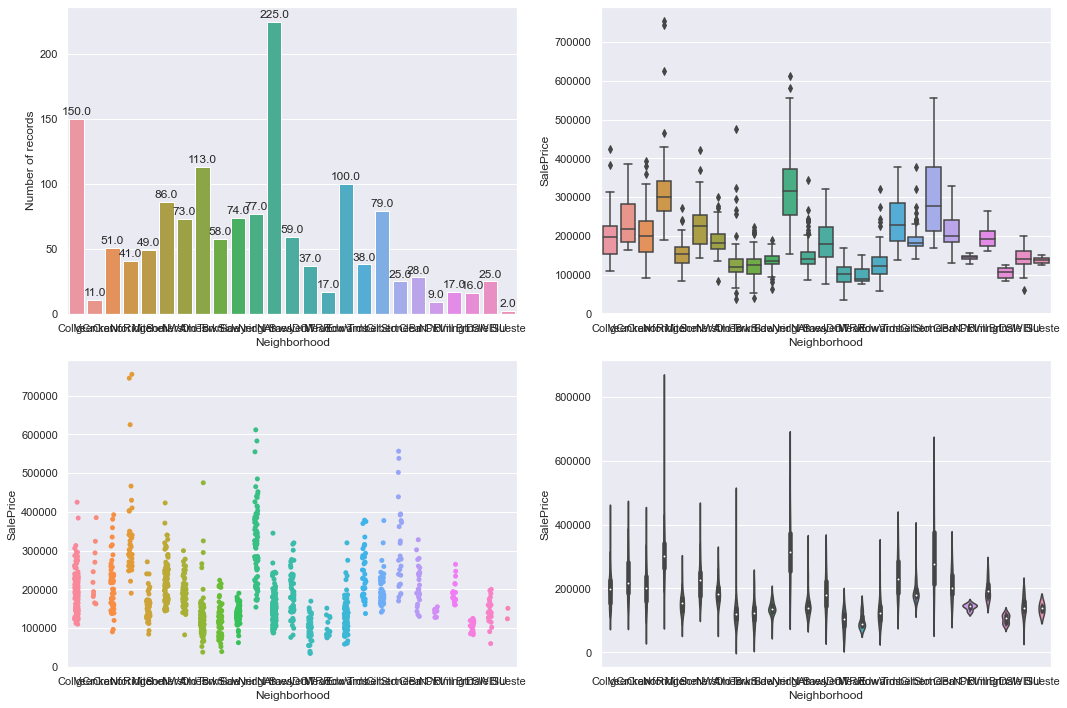


 
 

                                       Condition1                                       
    Number of Unique Values 9
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']


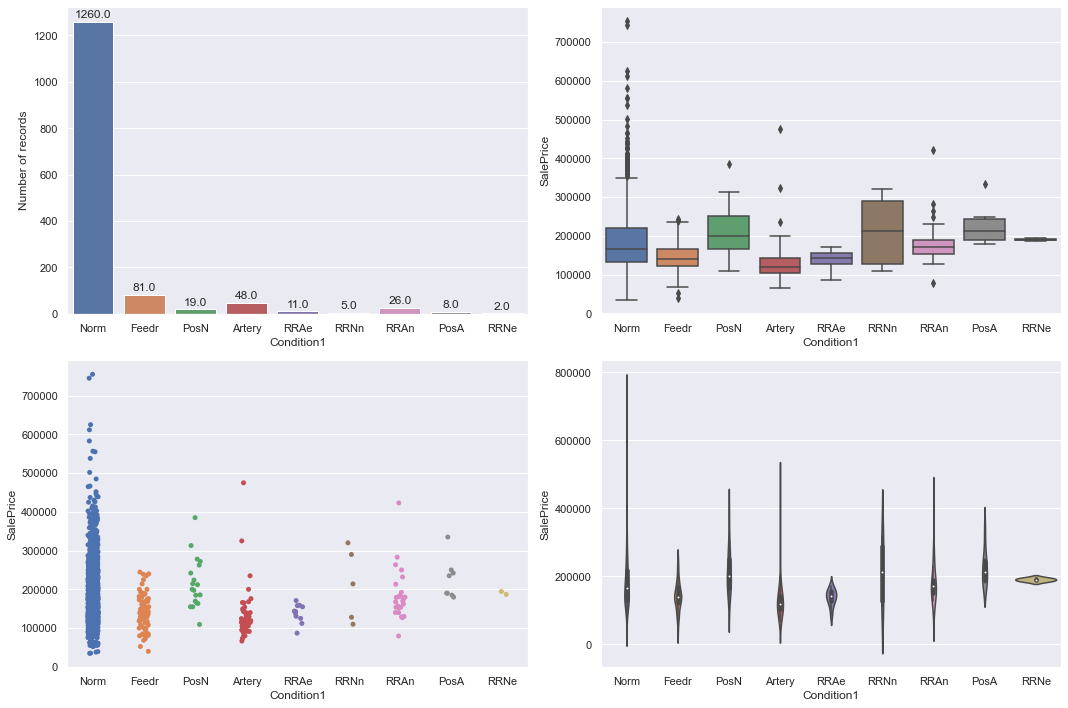


 
 

                                       Condition2                                       
    Number of Unique Values 8
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn']


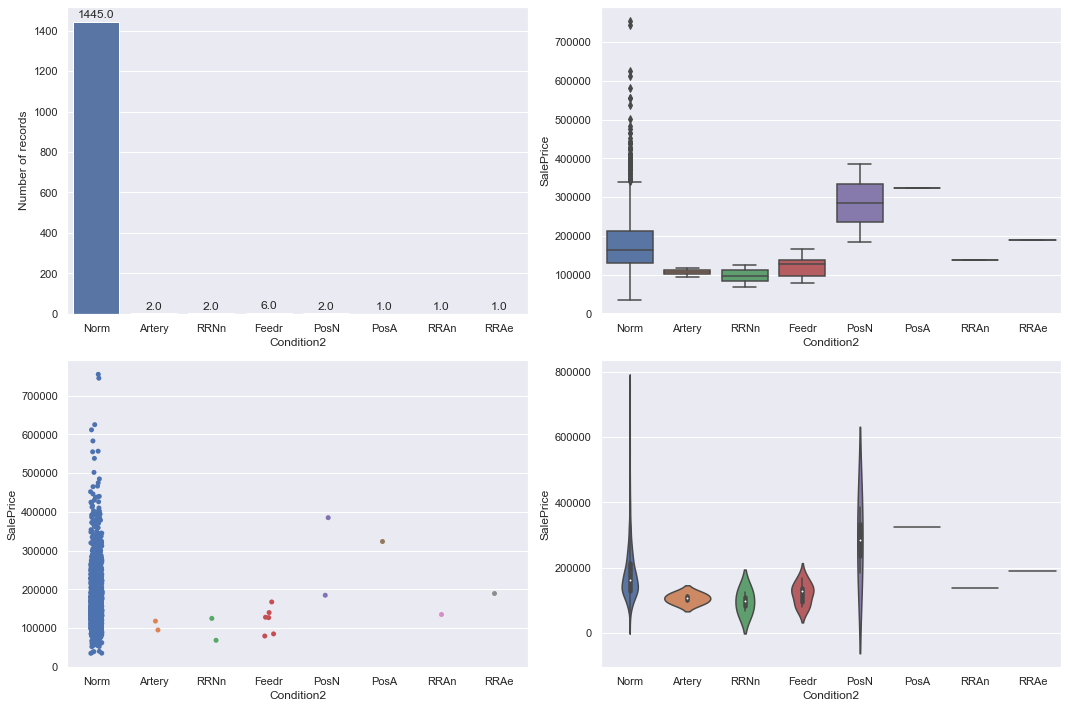


 
 

                                        BldgType                                        
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']


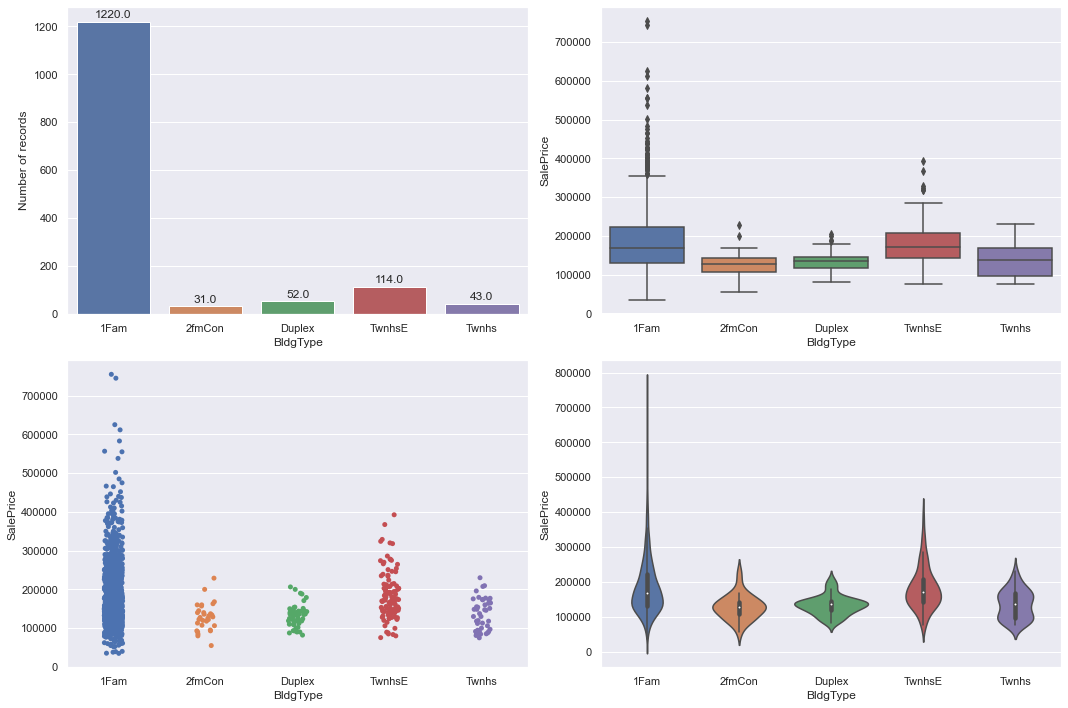


 
 

                                       HouseStyle                                       
    Number of Unique Values 8
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']


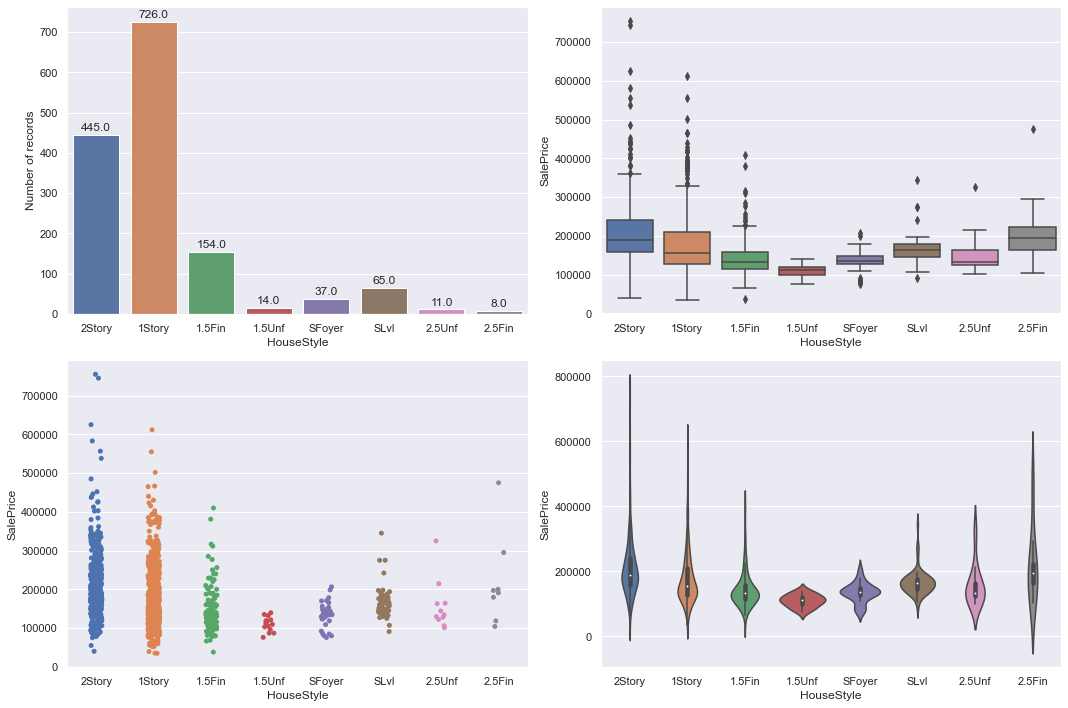


 
 

                                      OverallQual                                       
    Number of Unique Values 10
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


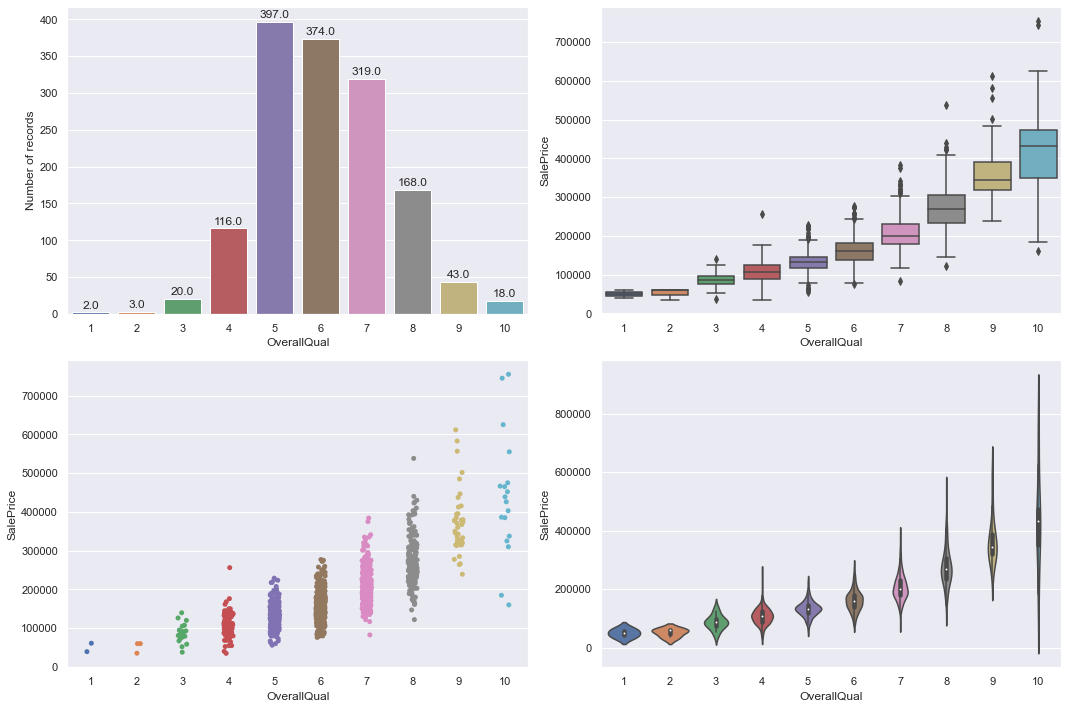


 
 

                                      OverallCond                                       
    Number of Unique Values 9
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [1, 2, 3, 4, 5, 6, 7, 8, 9]


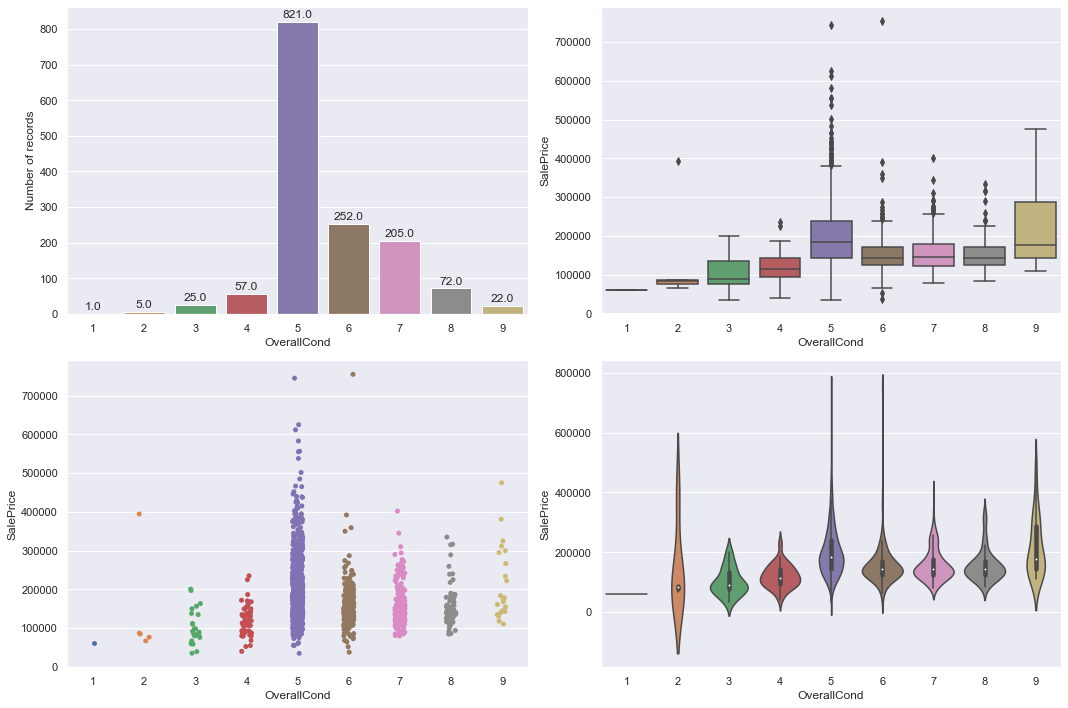


 
 

                                       YearBuilt                                        
    Number of Unique Values 112
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [1872, 1875, 1880, 1882, 1885, '.............', 2006, 2007, 2008, 2009, 2010]


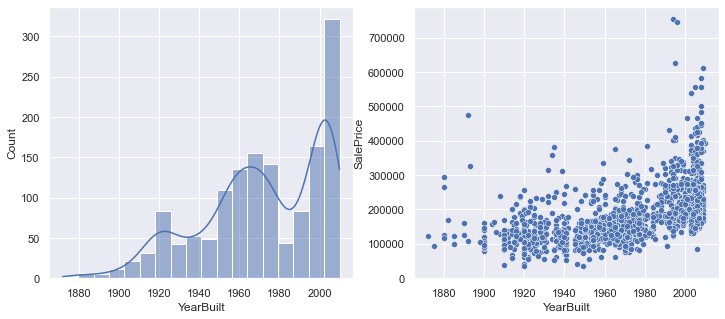


 
 

                                      YearRemodAdd                                      
    Number of Unique Values 61
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [1950, 1951, 1952, 1953, 1954, '.............', 2006, 2007, 2008, 2009, 2010]


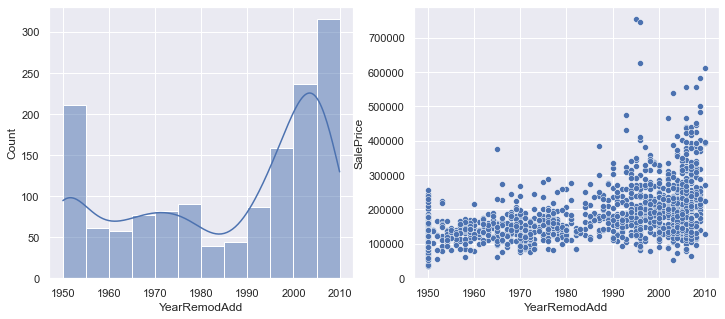


 
 

                                       RoofStyle                                        
    Number of Unique Values 6
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']


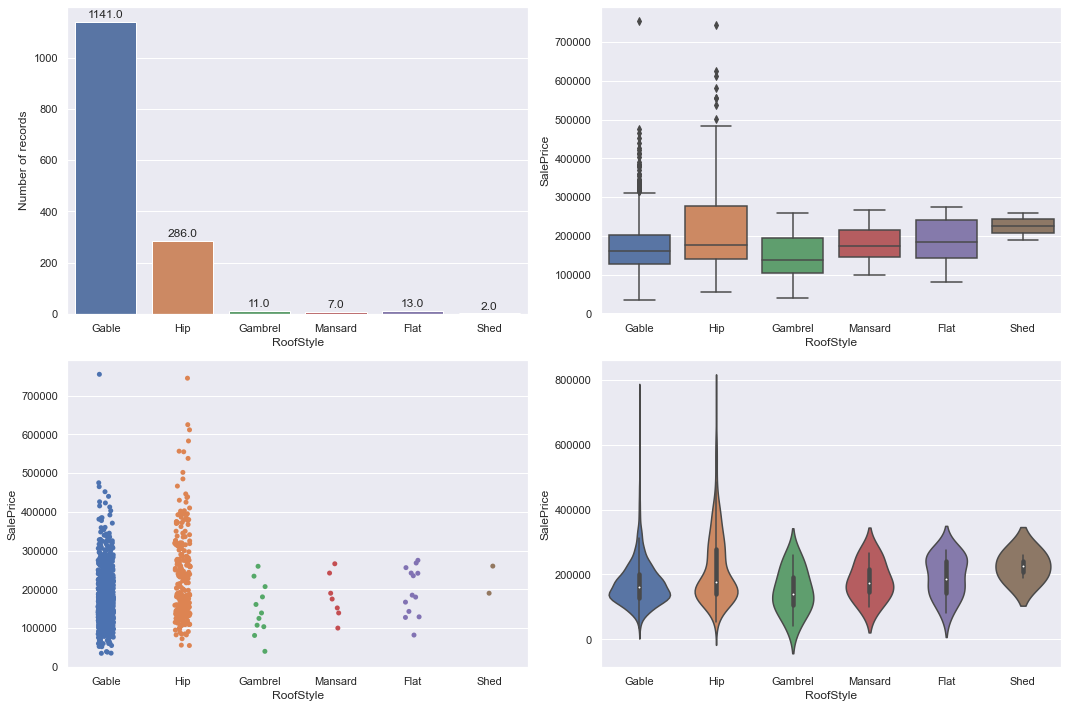


 
 

                                        RoofMatl                                        
    Number of Unique Values 8
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl']


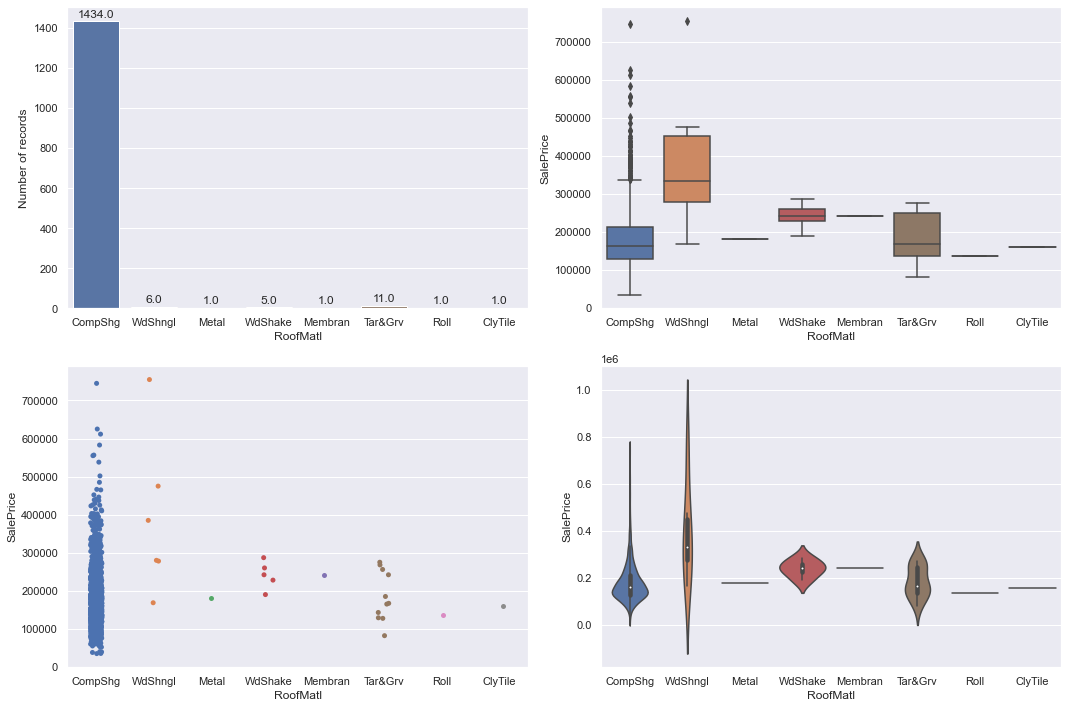


 
 

                                      Exterior1st                                       
    Number of Unique Values 15
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', '.............', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']


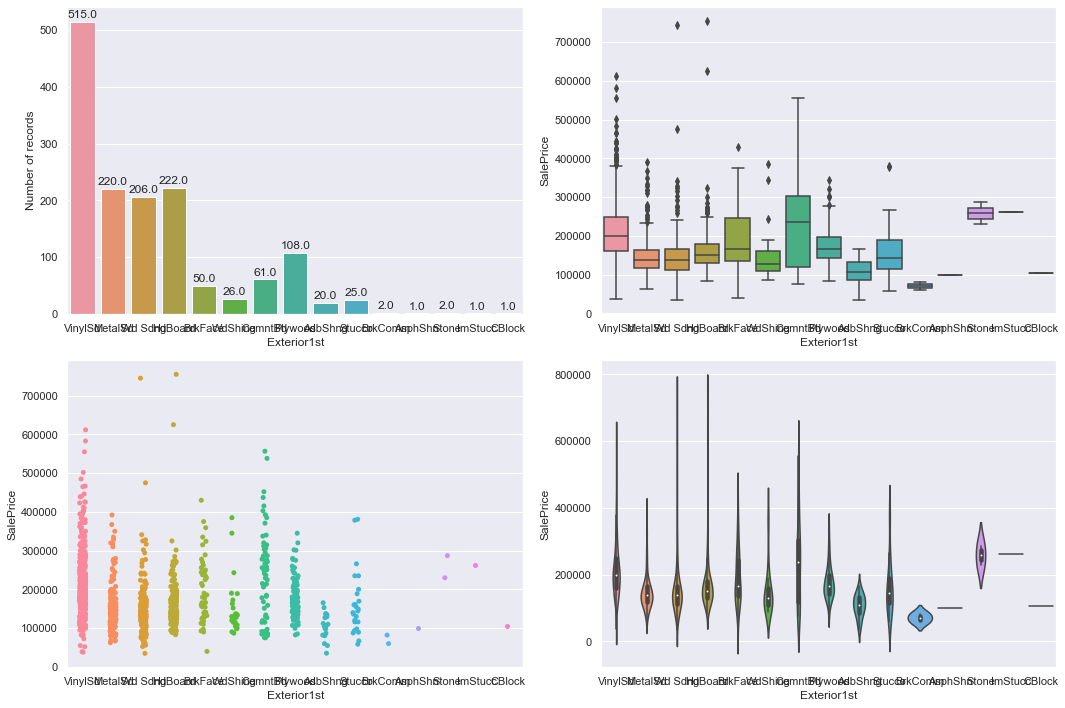


 
 

                                      Exterior2nd                                       
    Number of Unique Values 16
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', '.............', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng']


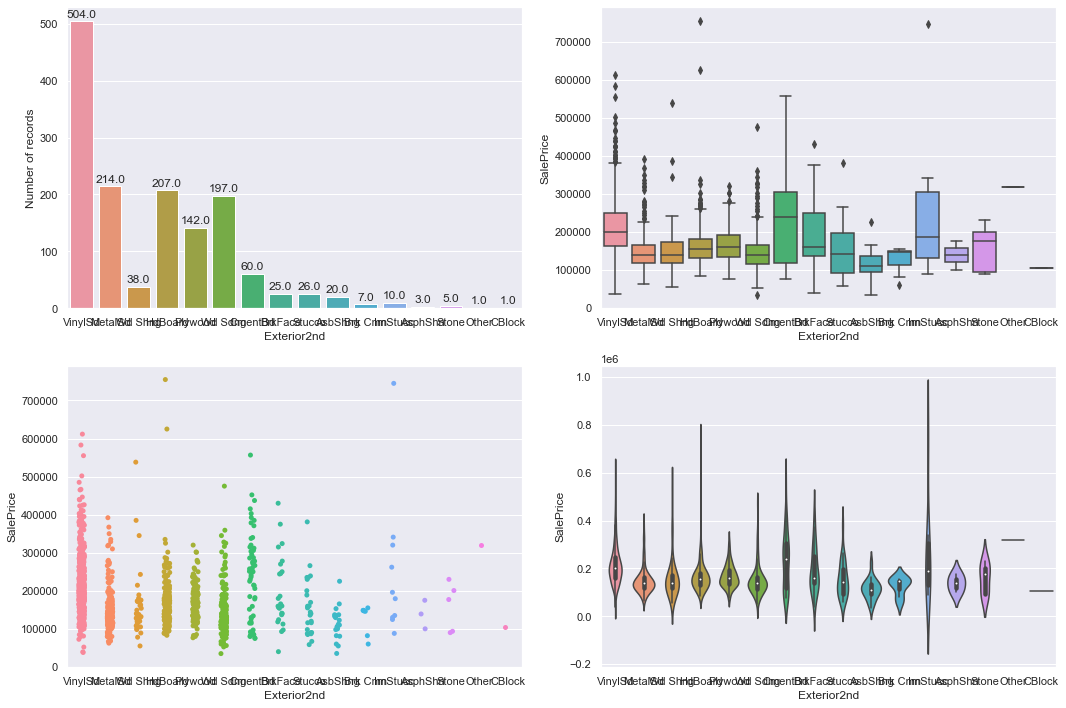


 
 

                                       MasVnrType                                       
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  0.5 %
Number of Non-null values 1452
Values like  ['BrkFace', 'None', 'Stone', 'BrkCmn', nan]


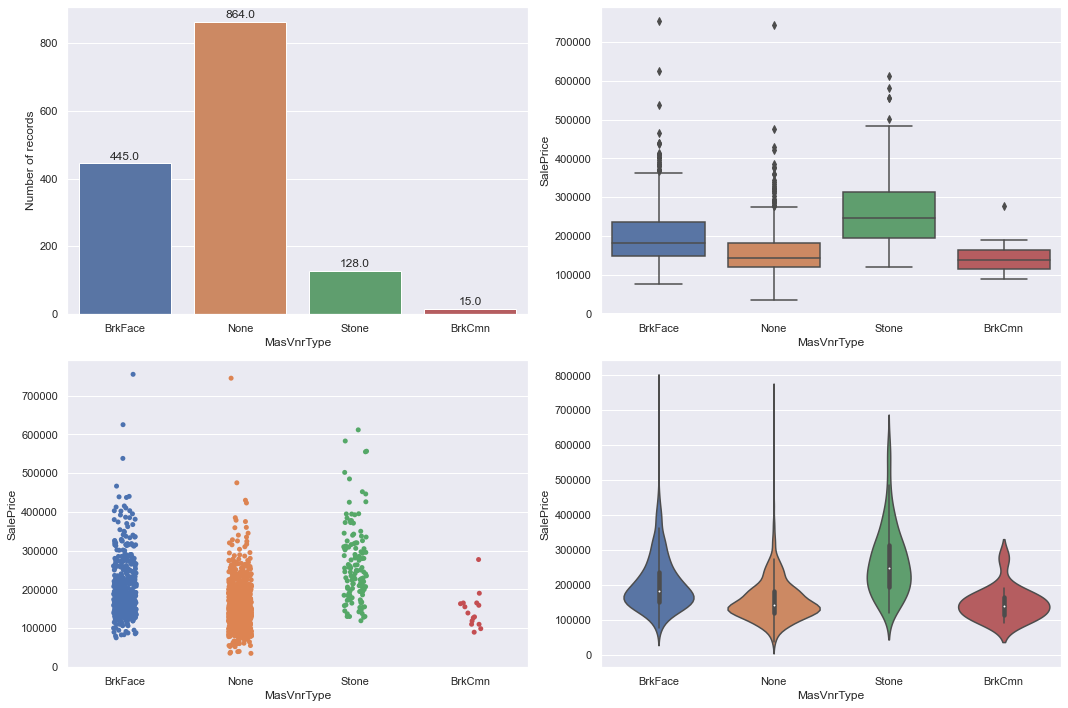


 
 

                                       MasVnrArea                                       
    Number of Unique Values 328
Datatype of column: float64
Null Percentage:  0.5 %
Number of Non-null values 1452
Values like  [0.0, 1.0, 11.0, 14.0, 16.0, '.............', 1129.0, 1170.0, 1378.0, 1600.0, nan]


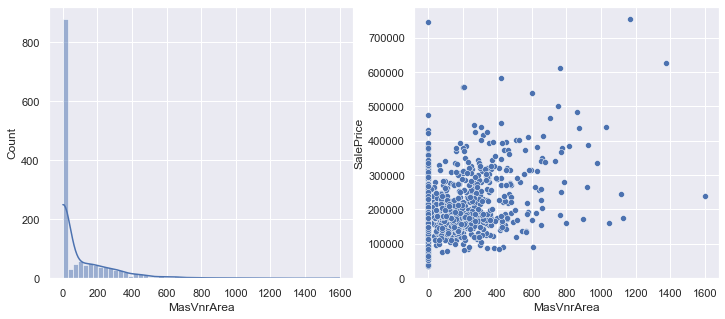


 
 

                                       ExterQual                                        
    Number of Unique Values 4
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Ex', 'Fa', 'Gd', 'TA']


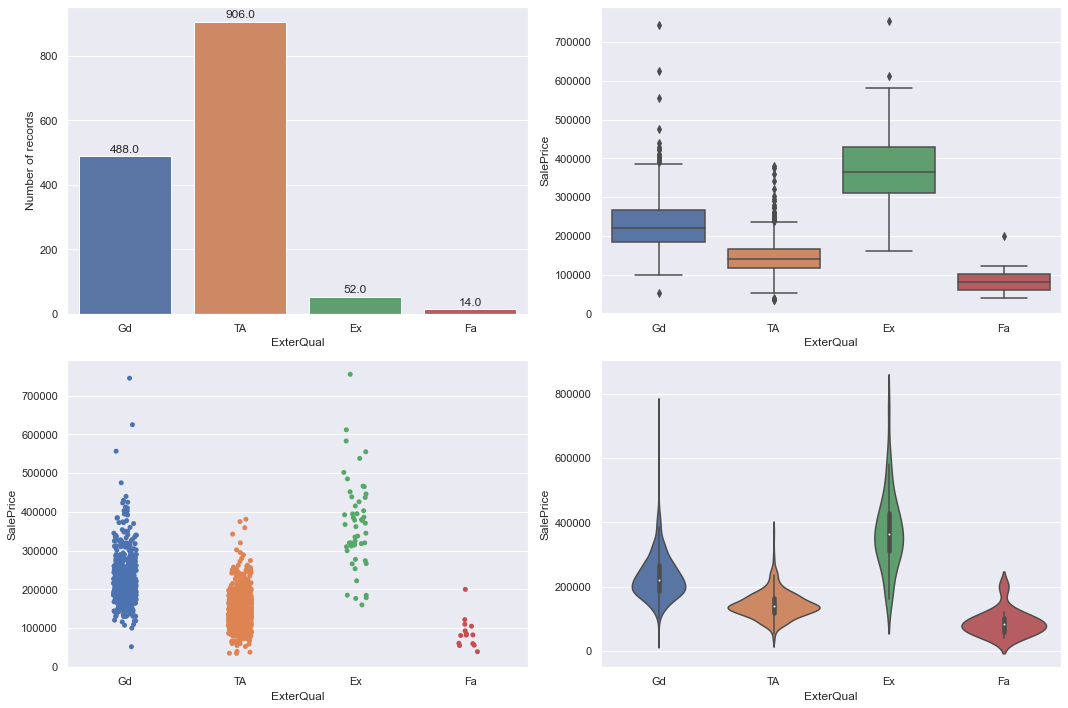


 
 

                                       ExterCond                                        
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Ex', 'Fa', 'Gd', 'Po', 'TA']


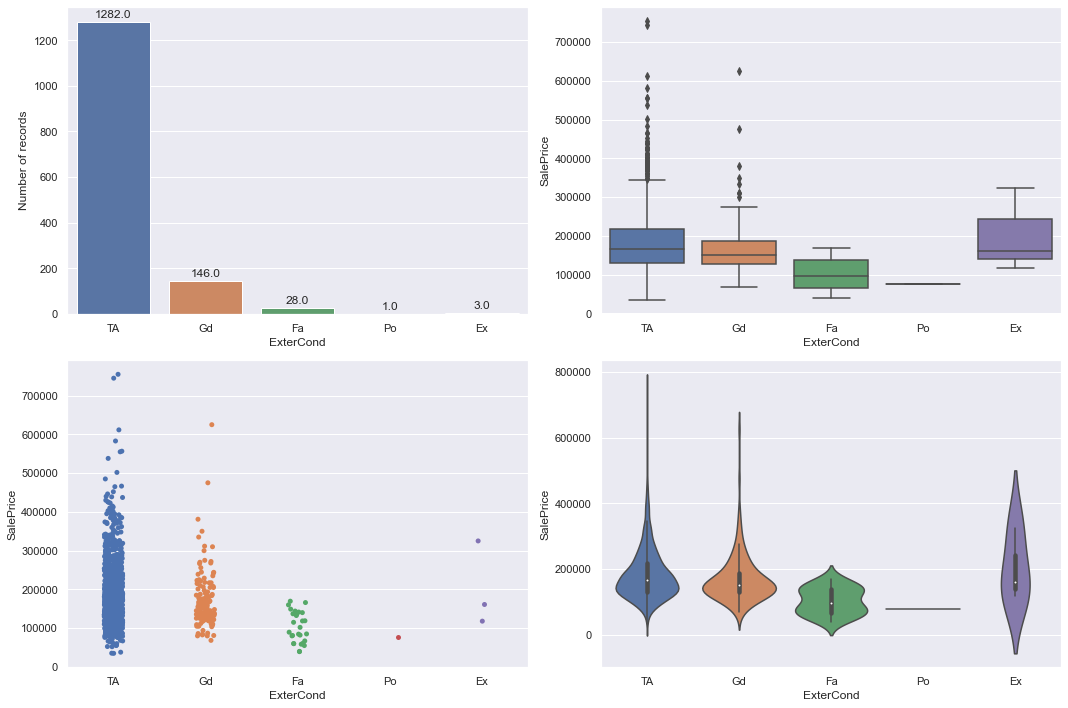


 
 

                                       Foundation                                       
    Number of Unique Values 6
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood']


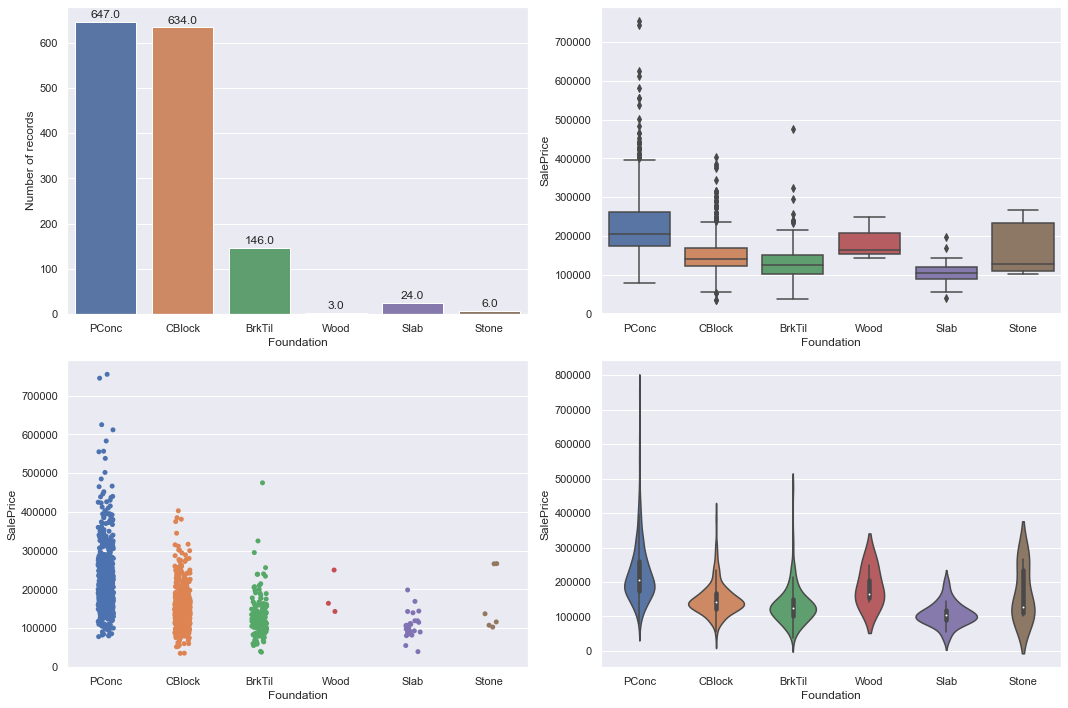


 
 

                                        BsmtQual                                        
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  2.5 %
Number of Non-null values 1423
Values like  ['Gd', 'TA', 'Ex', nan, 'Fa']


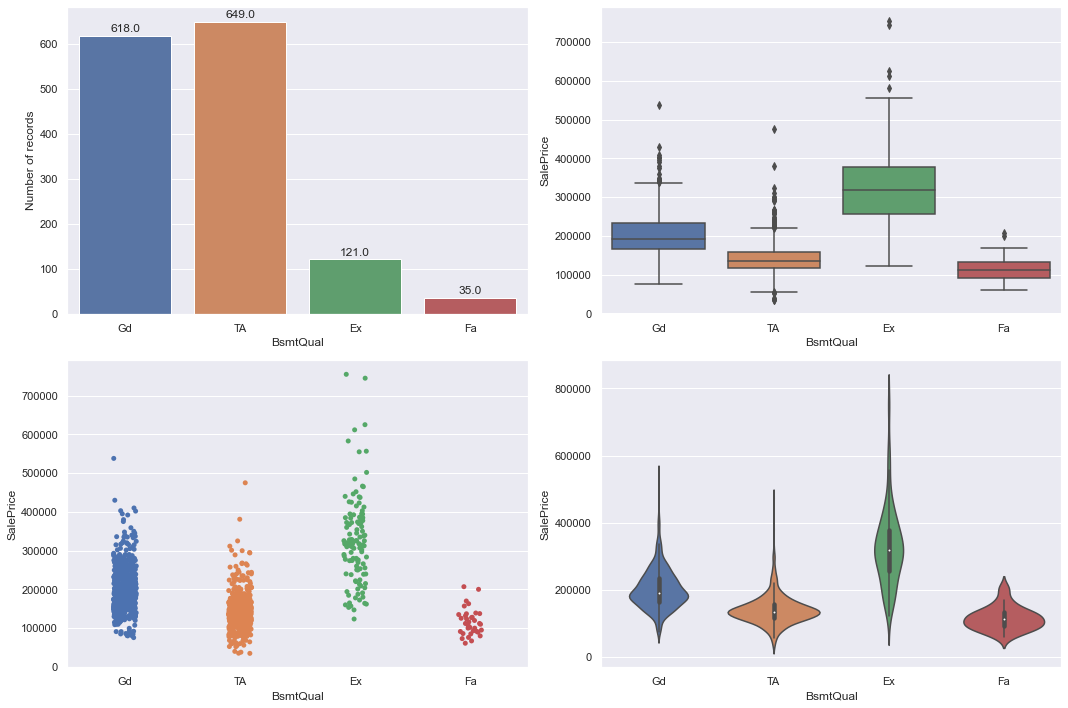


 
 

                                        BsmtCond                                        
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  2.5 %
Number of Non-null values 1423
Values like  ['TA', 'Gd', nan, 'Fa', 'Po']


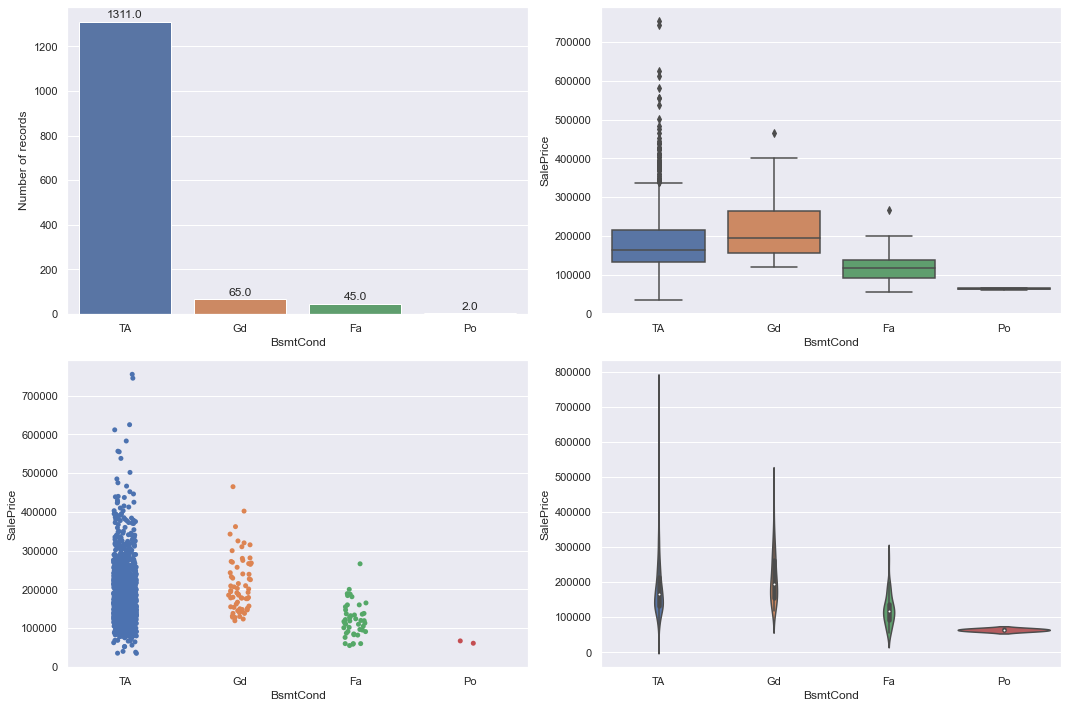


 
 

                                      BsmtExposure                                      
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  2.6 %
Number of Non-null values 1422
Values like  ['No', 'Gd', 'Mn', 'Av', nan]


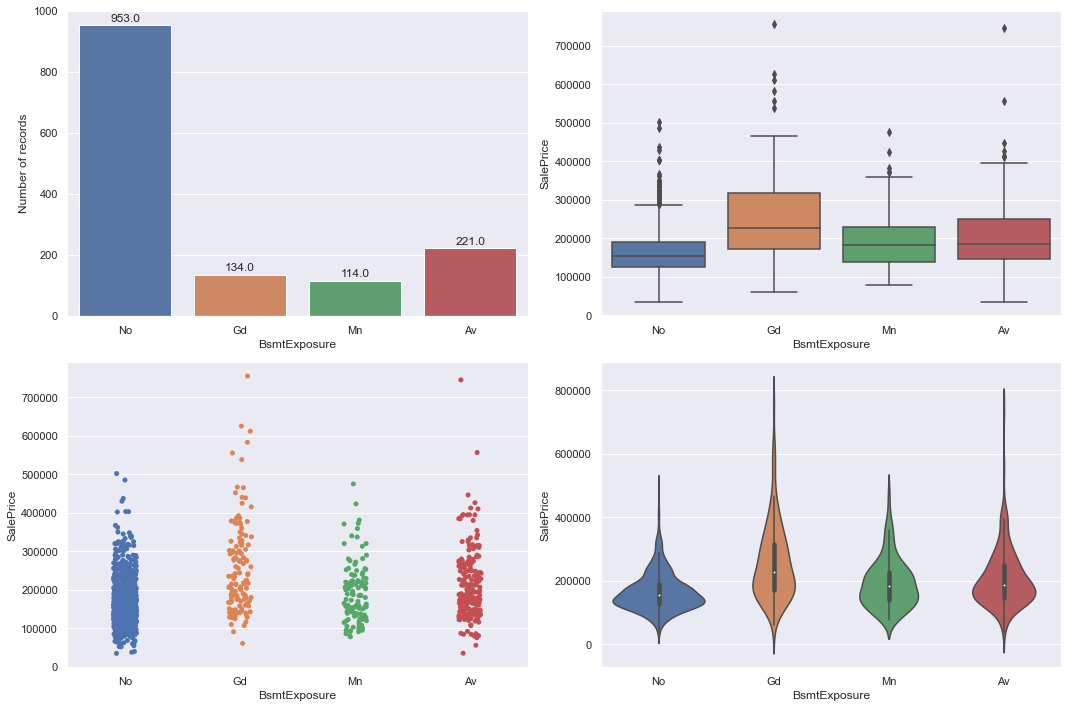


 
 

                                      BsmtFinType1                                      
    Number of Unique Values 7
Datatype of column: object
Null Percentage:  2.5 %
Number of Non-null values 1423
Values like  ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ']


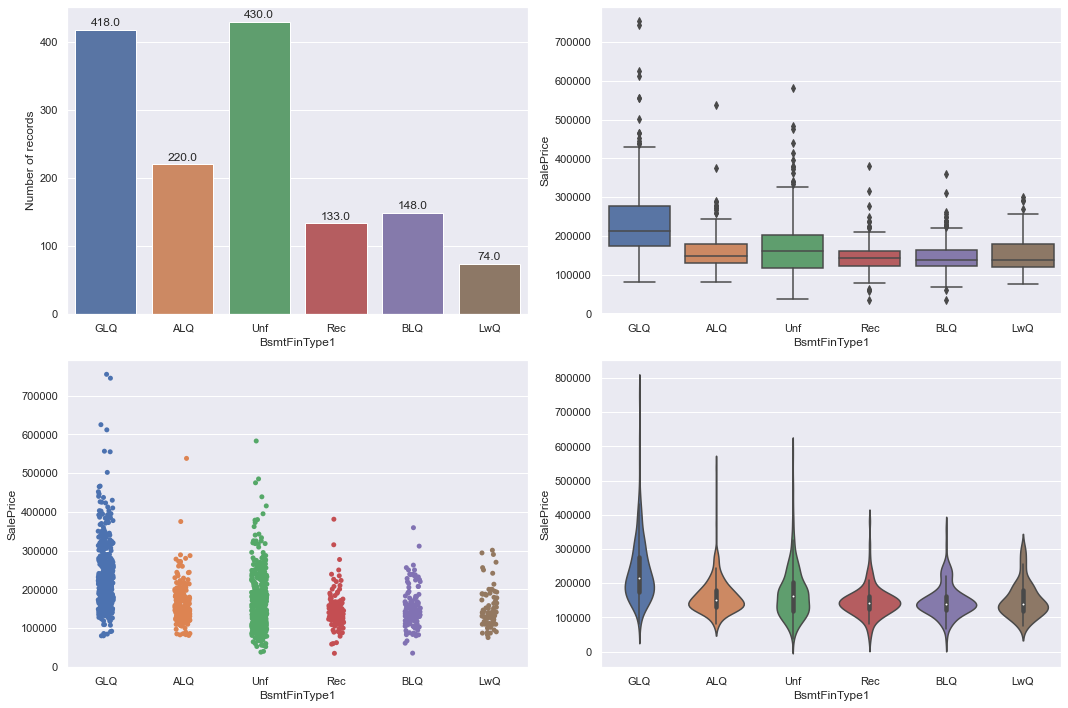


 
 

                                       BsmtFinSF1                                       
    Number of Unique Values 637
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 2, 16, 20, 24, '.............', 1904, 2096, 2188, 2260, 5644]


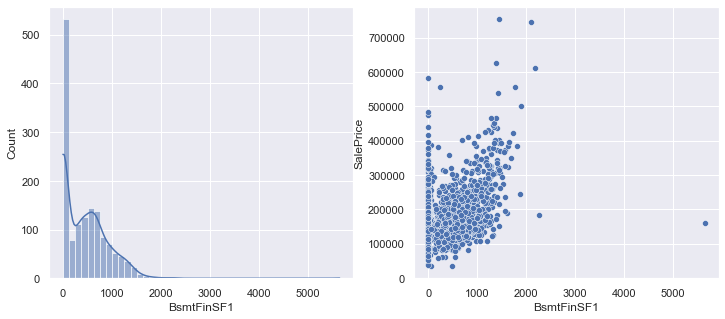


 
 

                                      BsmtFinType2                                      
    Number of Unique Values 7
Datatype of column: object
Null Percentage:  2.6 %
Number of Non-null values 1422
Values like  ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ']


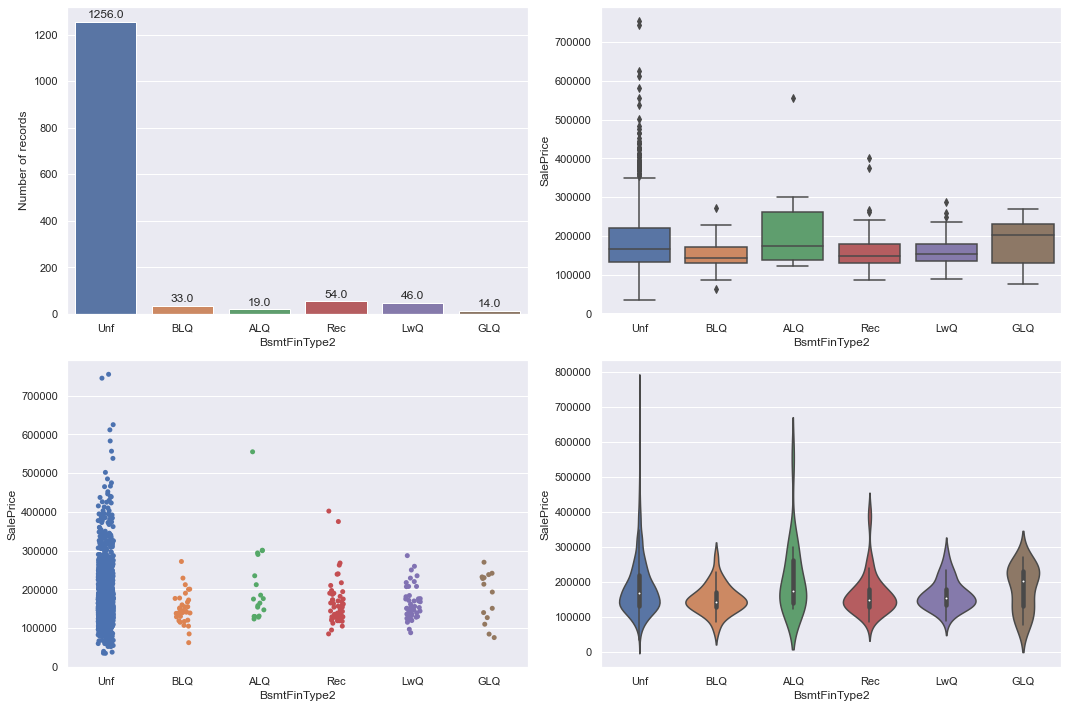


 
 

                                       BsmtFinSF2                                       
    Number of Unique Values 144
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 28, 32, 35, 40, '.............', 1080, 1085, 1120, 1127, 1474]


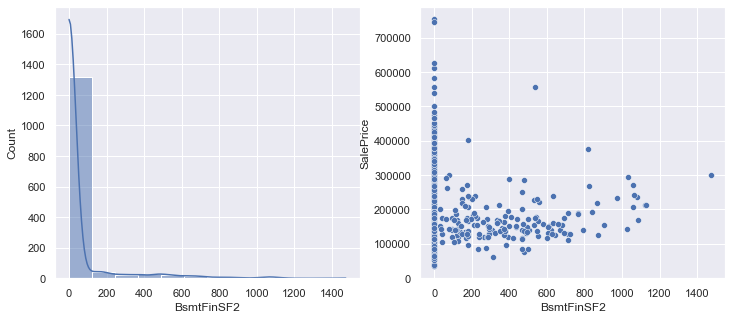


 
 

                                       BsmtUnfSF                                        
    Number of Unique Values 780
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 14, 15, 23, 26, '.............', 2042, 2046, 2121, 2153, 2336]


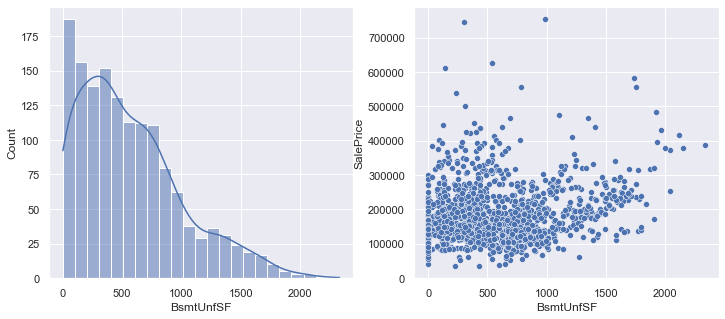


 
 

                                      TotalBsmtSF                                       
    Number of Unique Values 721
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 105, 190, 264, 270, '.............', 3094, 3138, 3200, 3206, 6110]


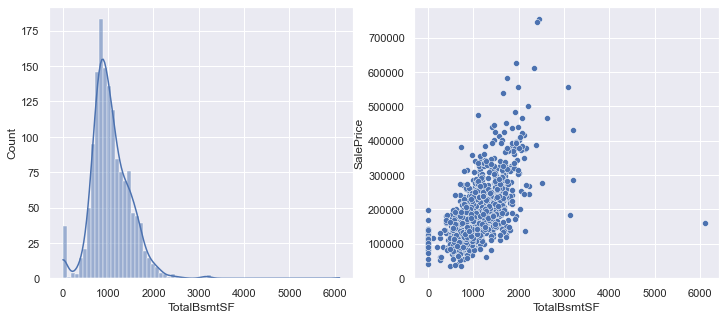


 
 

                                        Heating                                         
    Number of Unique Values 6
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall']


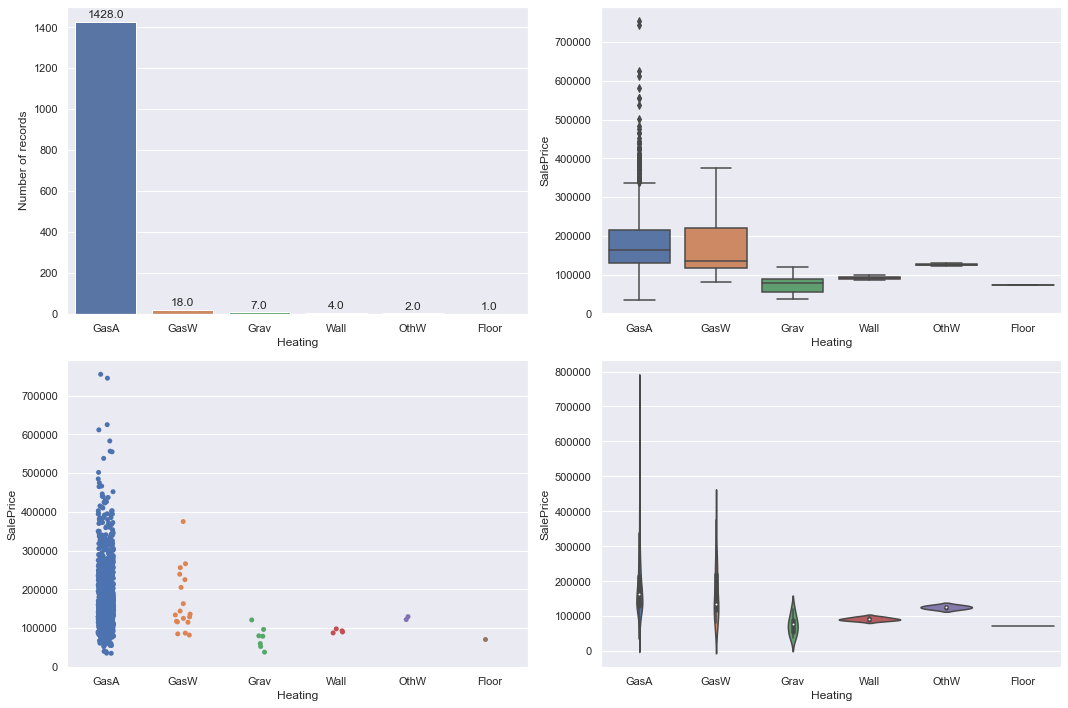


 
 

                                       HeatingQC                                        
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Ex', 'Fa', 'Gd', 'Po', 'TA']


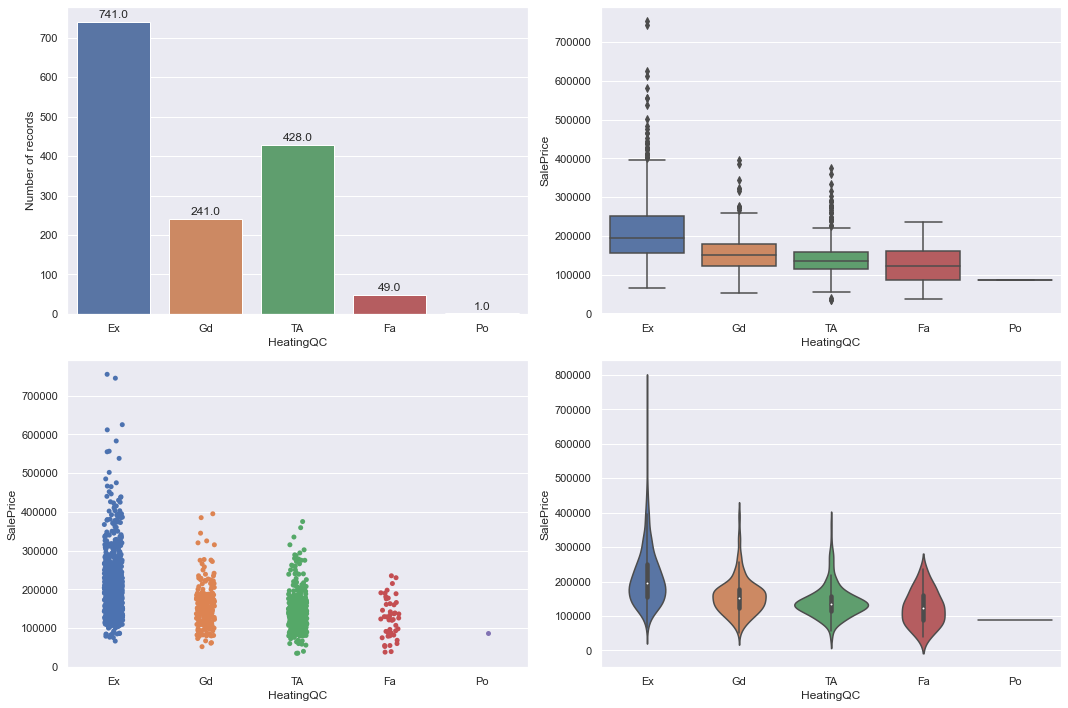


 
 

                                       CentralAir                                       
    Number of Unique Values 2
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['N', 'Y']


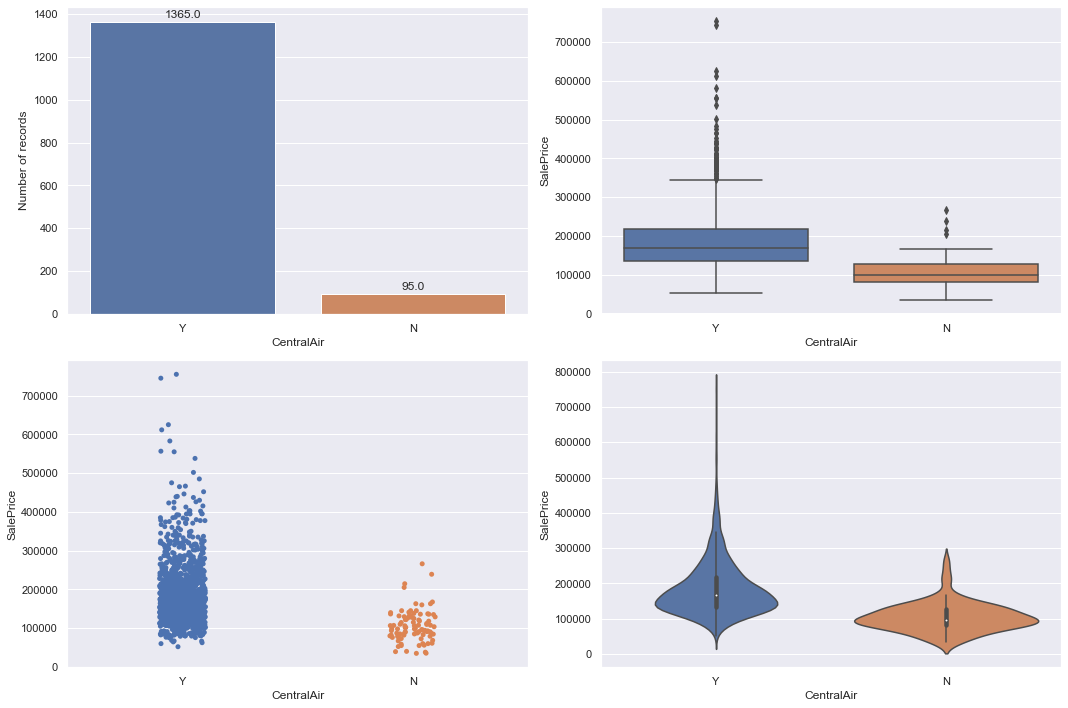


 
 

                                       Electrical                                       
    Number of Unique Values 6
Datatype of column: object
Null Percentage:  0.1 %
Number of Non-null values 1459
Values like  ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan]


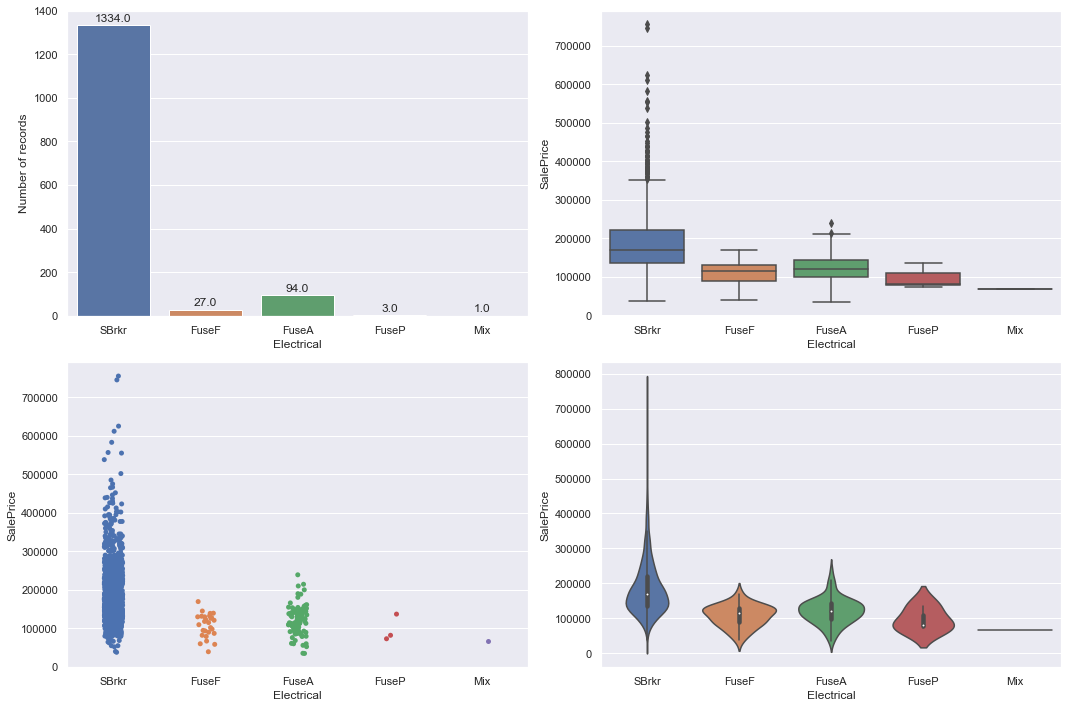


 
 

                                        1stFlrSF                                        
    Number of Unique Values 753
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [334, 372, 438, 480, 483, '.............', 2633, 2898, 3138, 3228, 4692]


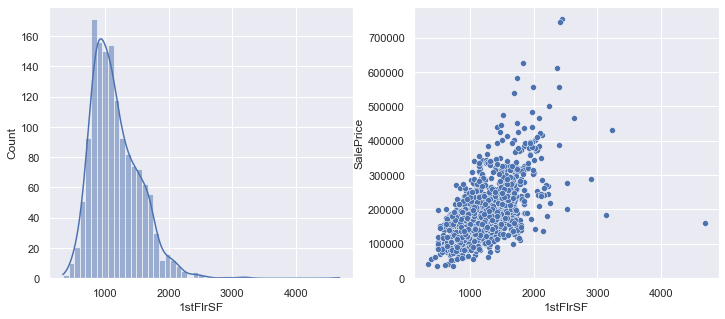


 
 

                                        2ndFlrSF                                        
    Number of Unique Values 417
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 110, 167, 192, 208, '.............', 1611, 1796, 1818, 1872, 2065]


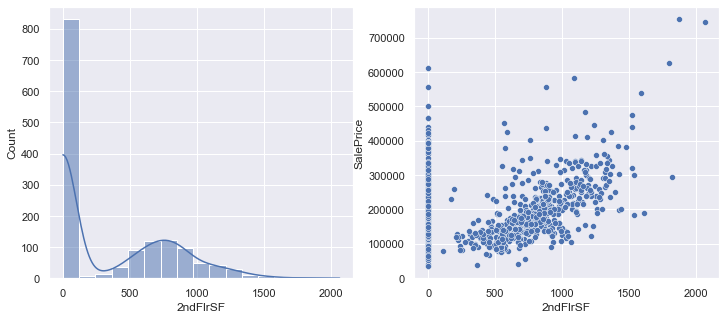


 
 

                                      LowQualFinSF                                      
    Number of Unique Values 24
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 53, 80, 120, 144, '.............', 513, 514, 515, 528, 572]


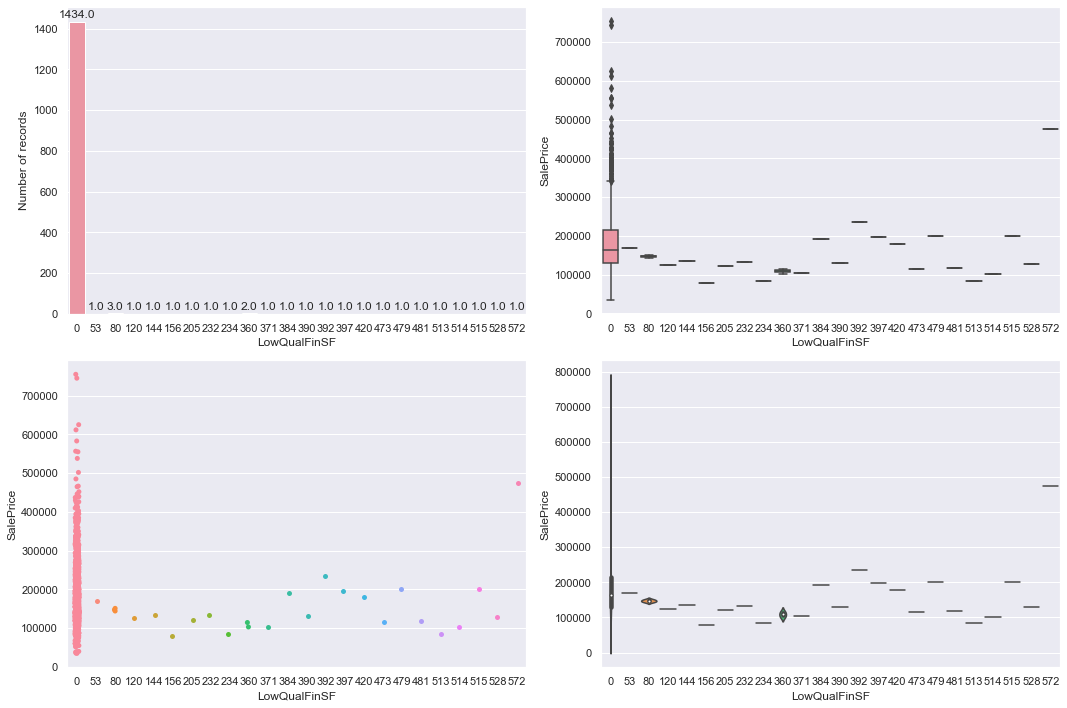


 
 

                                       GrLivArea                                        
    Number of Unique Values 861
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [334, 438, 480, 520, 605, '.............', 3627, 4316, 4476, 4676, 5642]


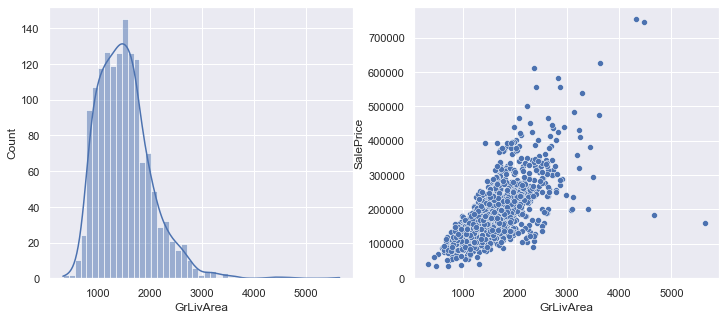


 
 

                                      BsmtFullBath                                      
    Number of Unique Values 4
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 1, 2, 3]


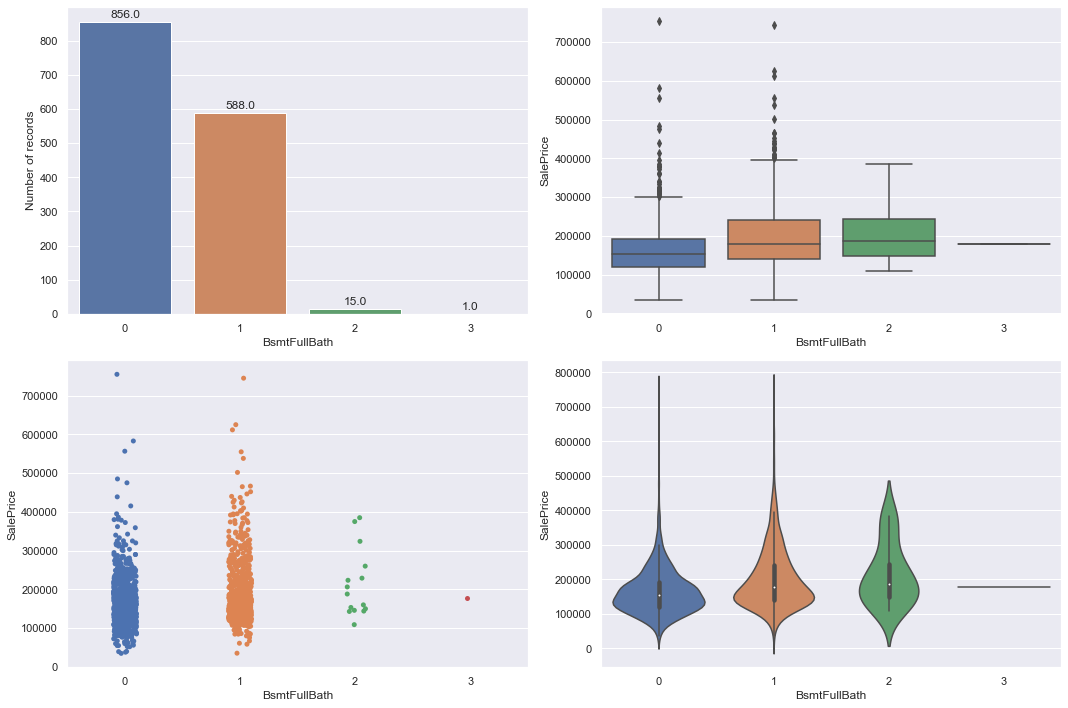


 
 

                                      BsmtHalfBath                                      
    Number of Unique Values 3
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 1, 2]


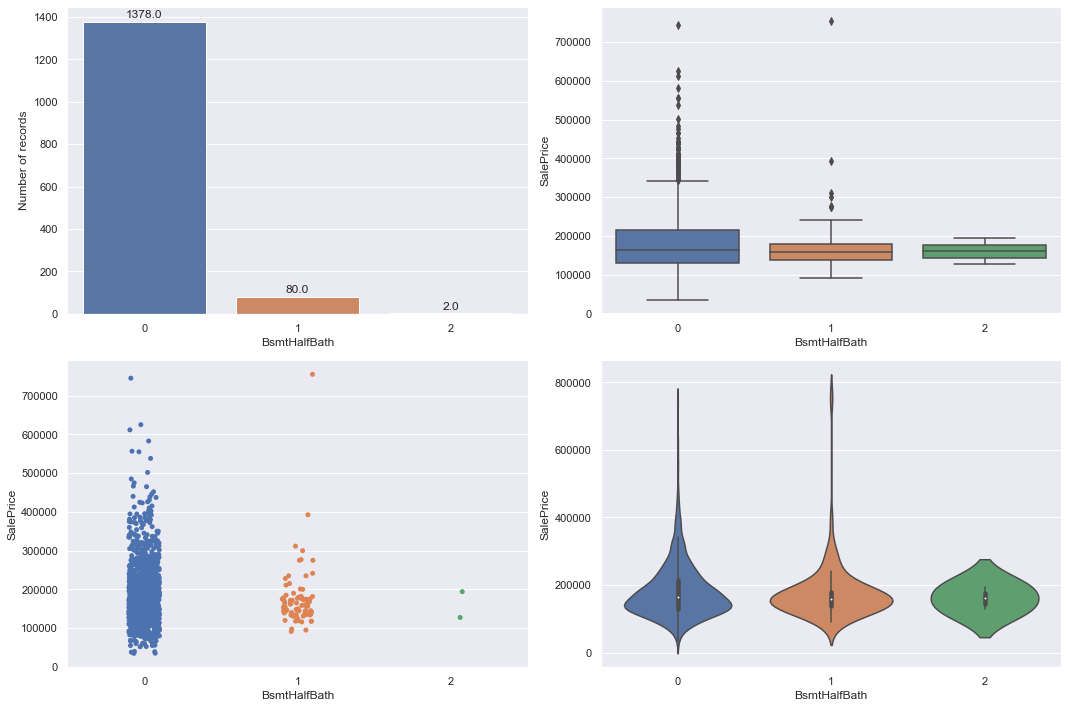


 
 

                                        FullBath                                        
    Number of Unique Values 4
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 1, 2, 3]


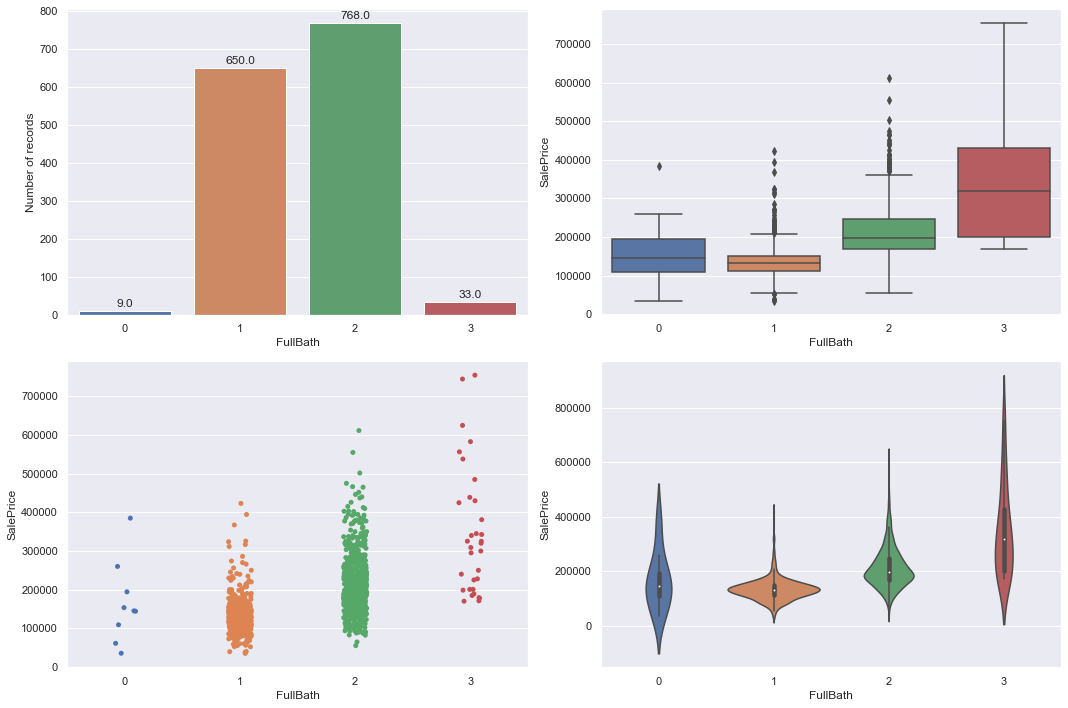


 
 

                                        HalfBath                                        
    Number of Unique Values 3
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 1, 2]


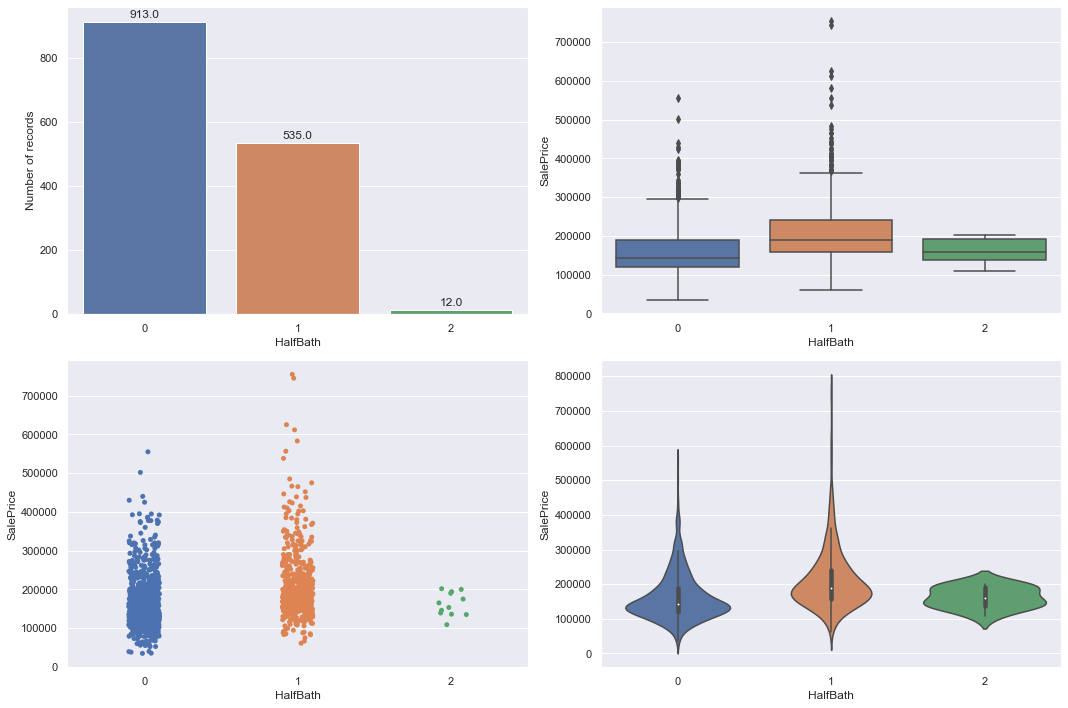


 
 

                                      BedroomAbvGr                                      
    Number of Unique Values 8
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 1, 2, 3, 4, 5, 6, 8]


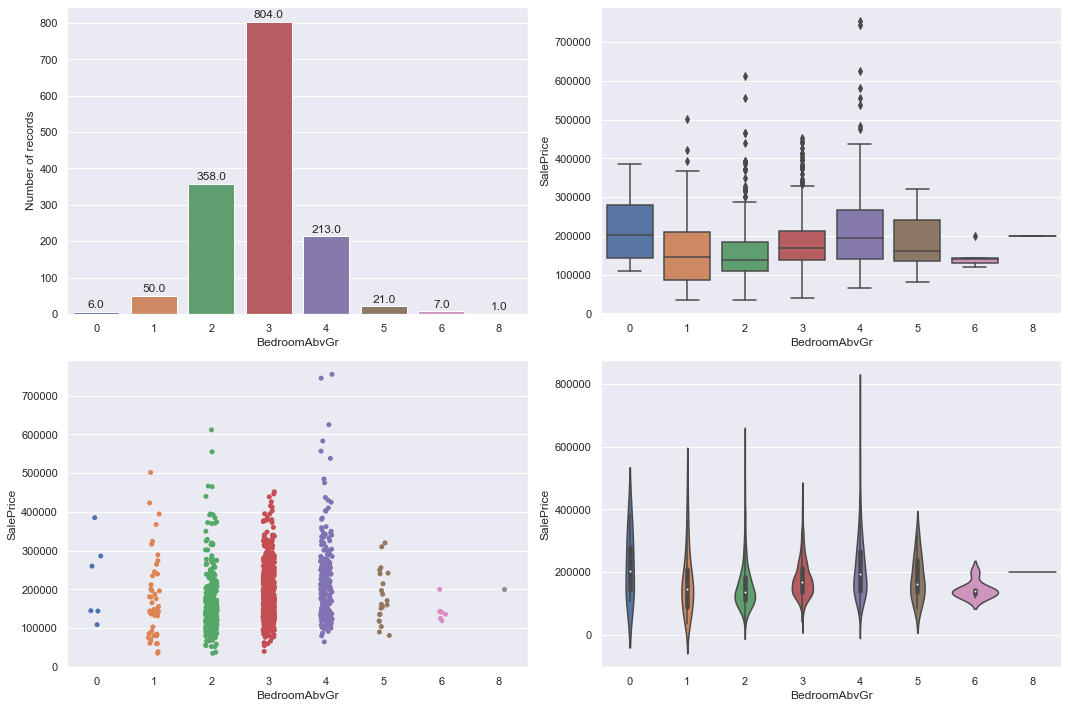


 
 

                                      KitchenAbvGr                                      
    Number of Unique Values 4
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 1, 2, 3]


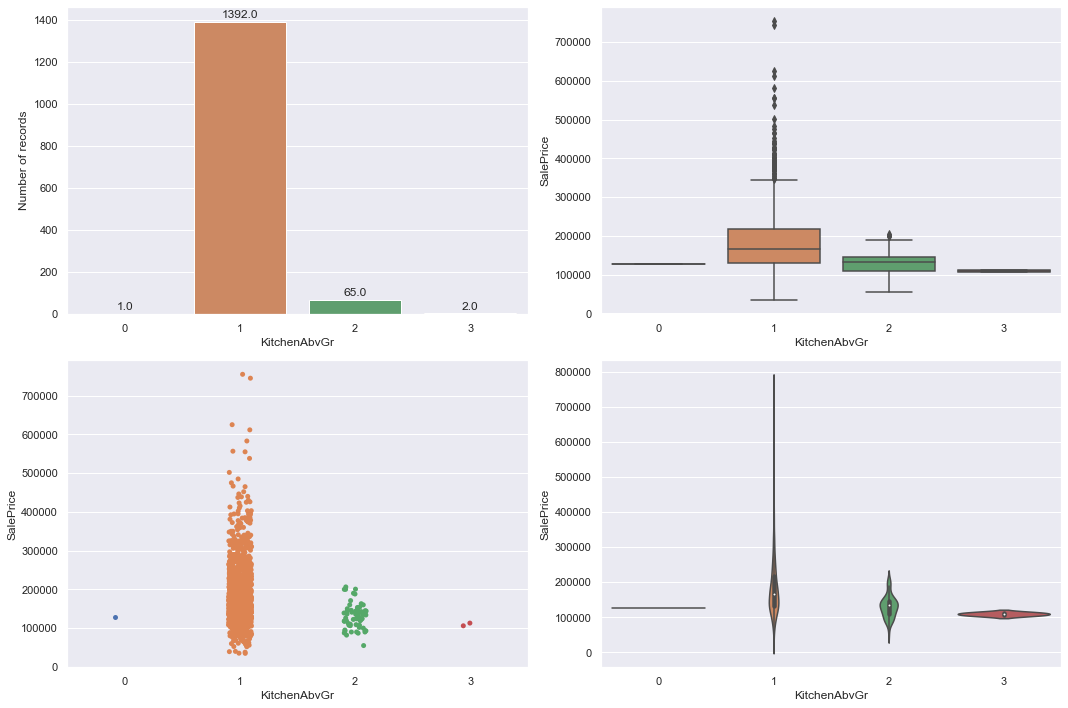


 
 

                                      KitchenQual                                       
    Number of Unique Values 4
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Ex', 'Fa', 'Gd', 'TA']


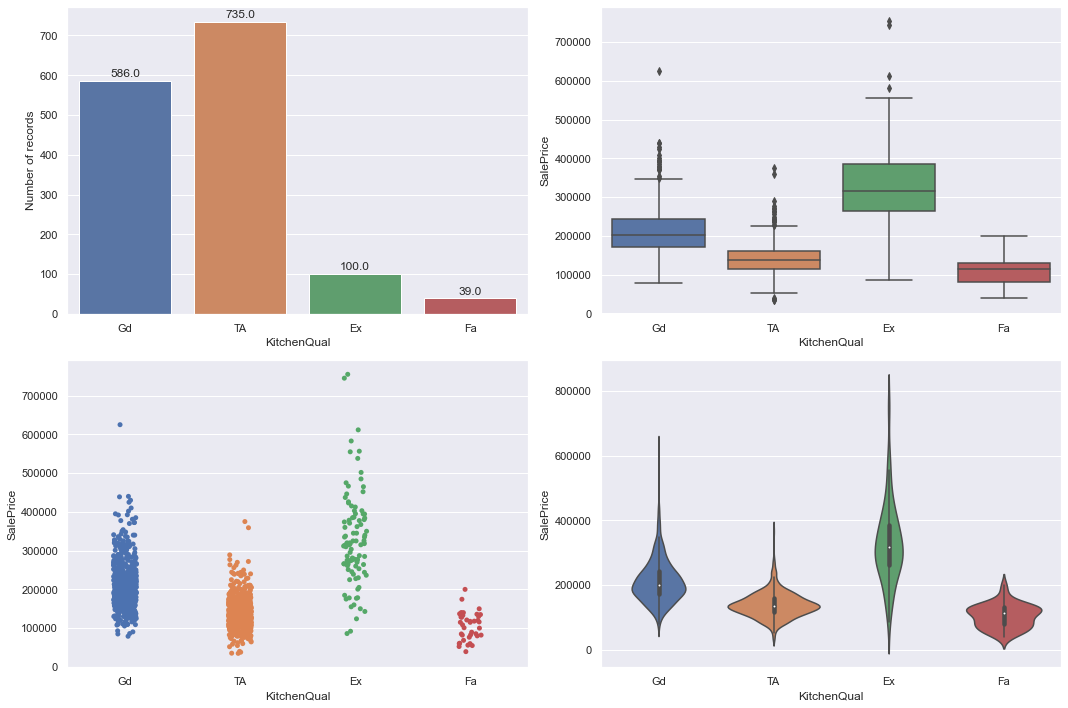


 
 

                                      TotRmsAbvGrd                                      
    Number of Unique Values 12
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [2, 3, 4, 5, 6, '.............', 9, 10, 11, 12, 14]


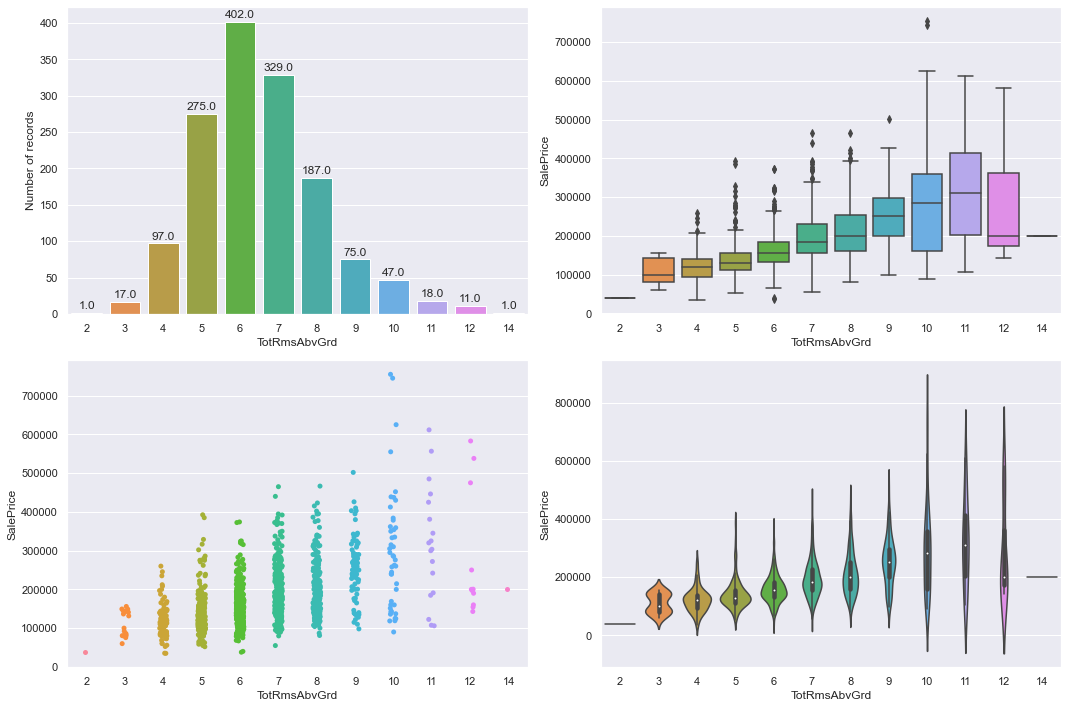


 
 

                                       Functional                                       
    Number of Unique Values 7
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ']


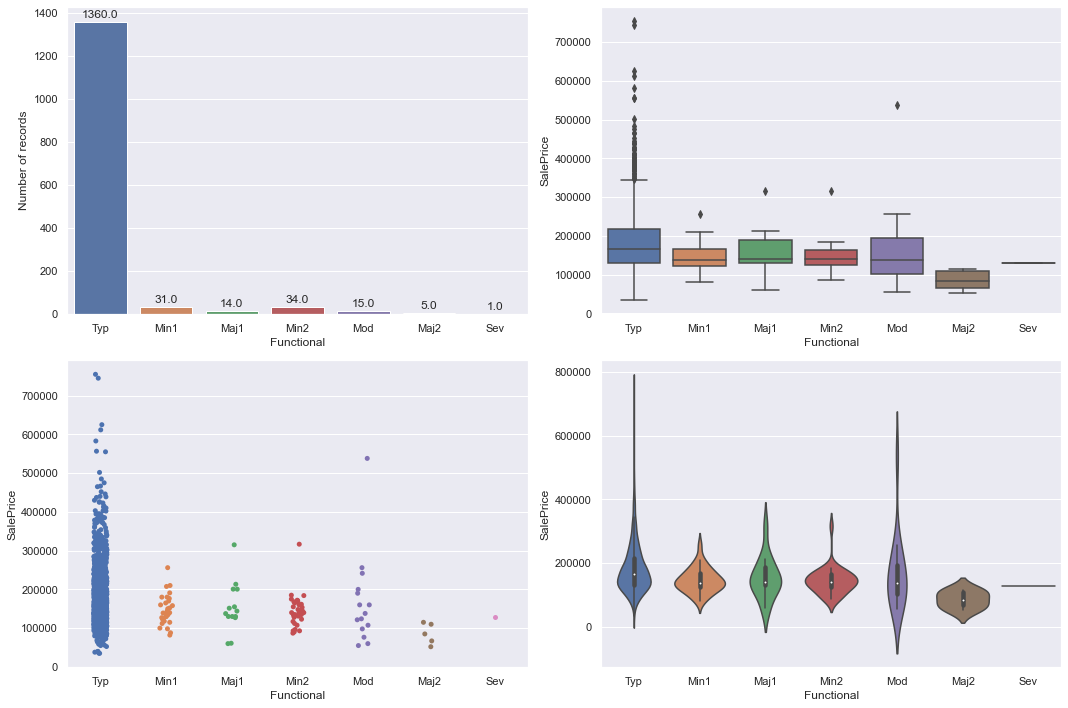


 
 

                                       Fireplaces                                       
    Number of Unique Values 4
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 1, 2, 3]


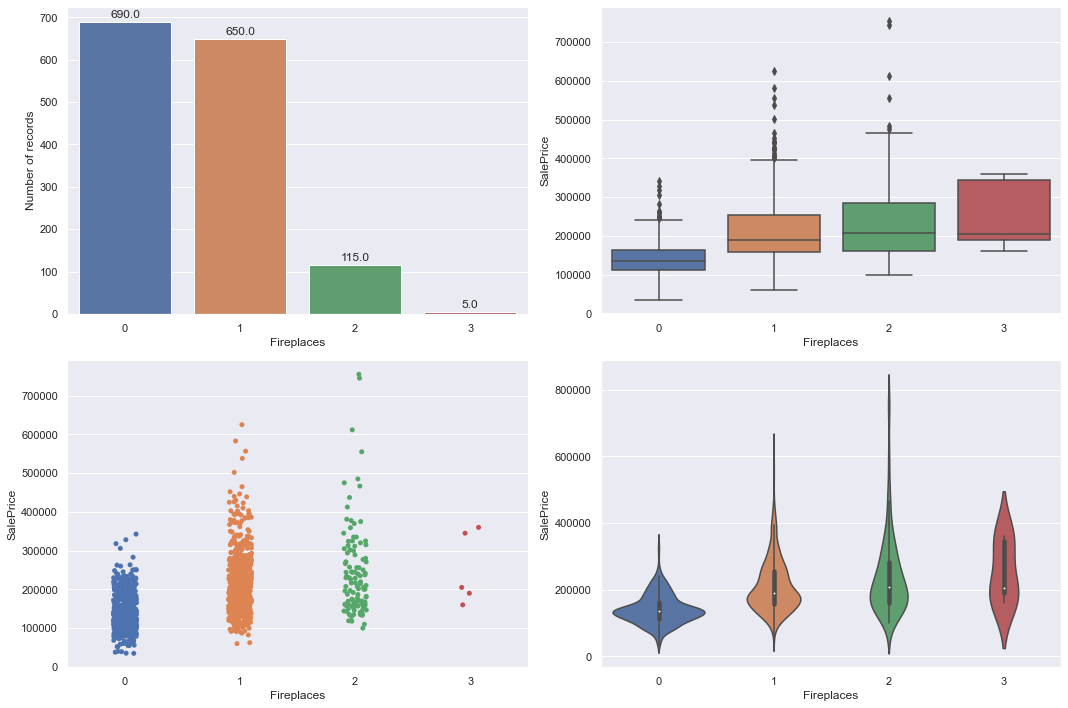


 
 

                                      FireplaceQu                                       
    Number of Unique Values 6
Datatype of column: object
Null Percentage:  47.3 %
Number of Non-null values 770
Values like  [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po']


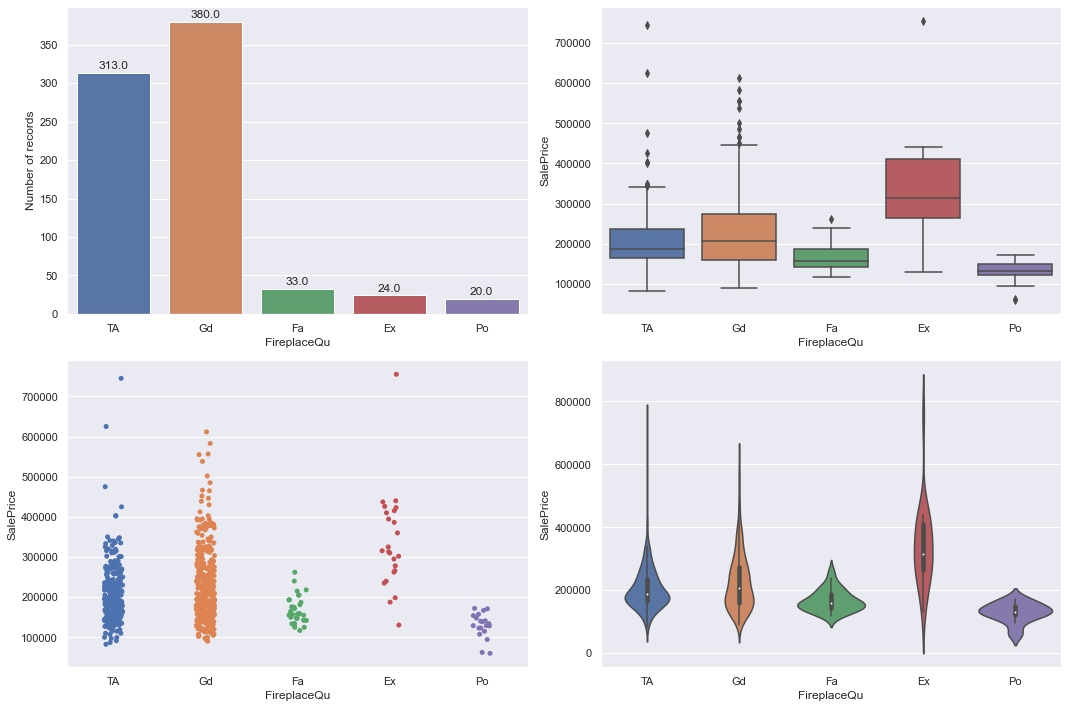


 
 

                                       GarageType                                       
    Number of Unique Values 7
Datatype of column: object
Null Percentage:  5.5 %
Number of Non-null values 1379
Values like  ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types']


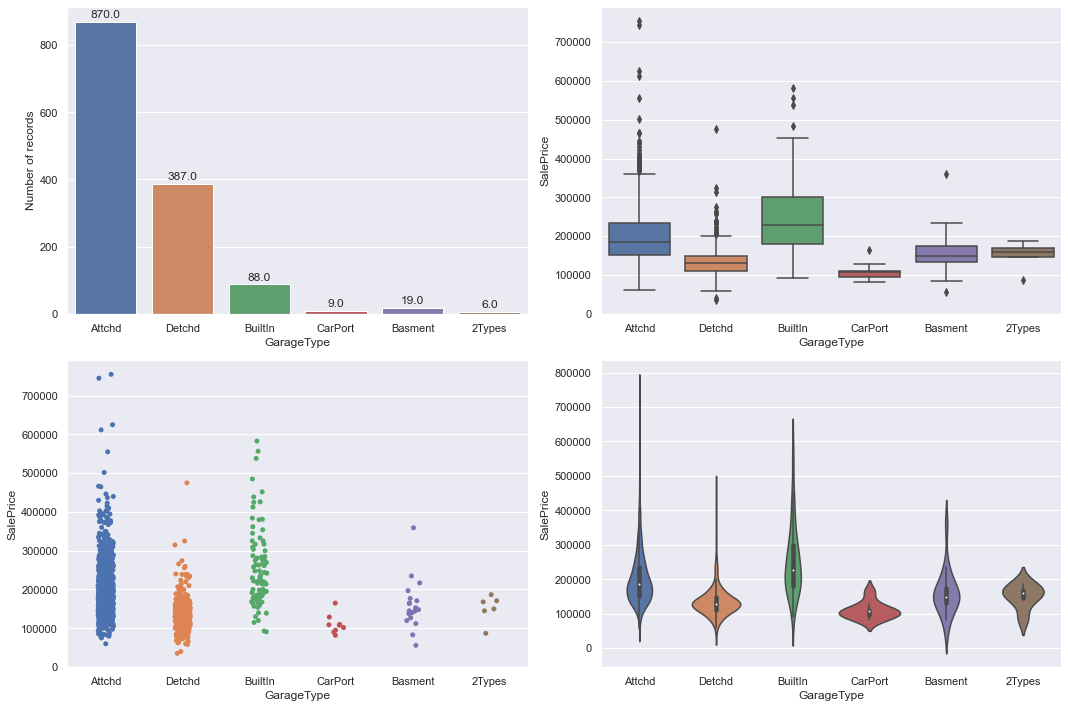


 
 

                                      GarageYrBlt                                       
    Number of Unique Values 98
Datatype of column: float64
Null Percentage:  5.5 %
Number of Non-null values 1379
Values like  [1900.0, 1906.0, 1908.0, 1910.0, 1914.0, '.............', 2007.0, 2008.0, 2009.0, 2010.0, nan]


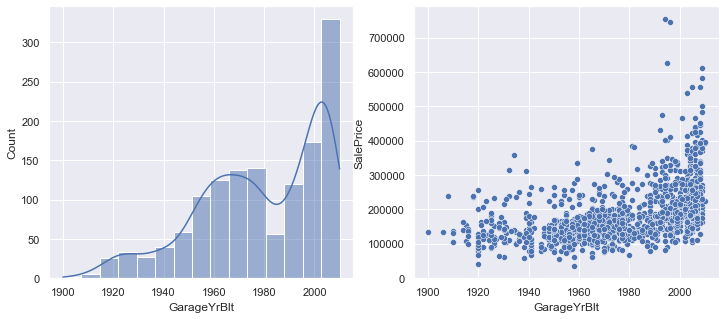


 
 

                                      GarageFinish                                      
    Number of Unique Values 4
Datatype of column: object
Null Percentage:  5.5 %
Number of Non-null values 1379
Values like  ['RFn', 'Unf', 'Fin', nan]


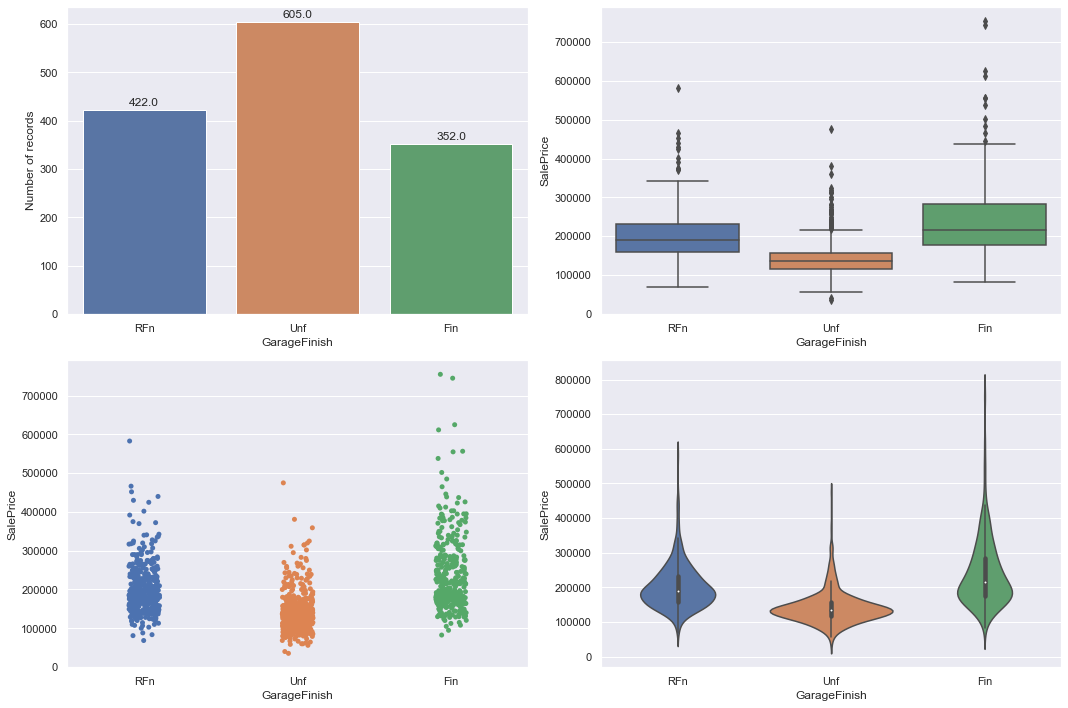


 
 

                                       GarageCars                                       
    Number of Unique Values 5
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 1, 2, 3, 4]


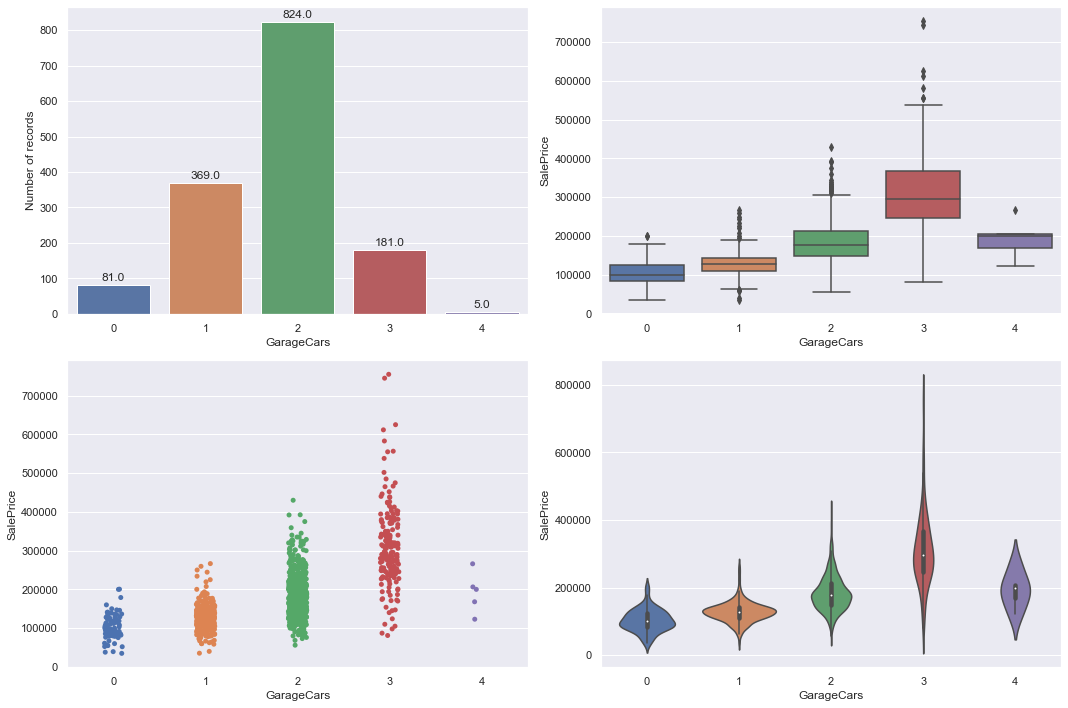


 
 

                                       GarageArea                                       
    Number of Unique Values 441
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 160, 164, 180, 186, '.............', 1220, 1248, 1356, 1390, 1418]


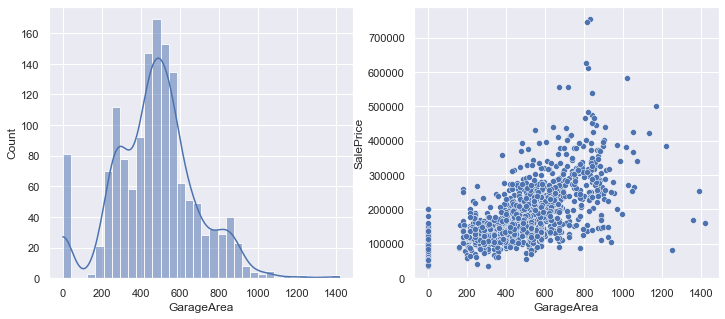


 
 

                                       GarageQual                                       
    Number of Unique Values 6
Datatype of column: object
Null Percentage:  5.5 %
Number of Non-null values 1379
Values like  ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po']


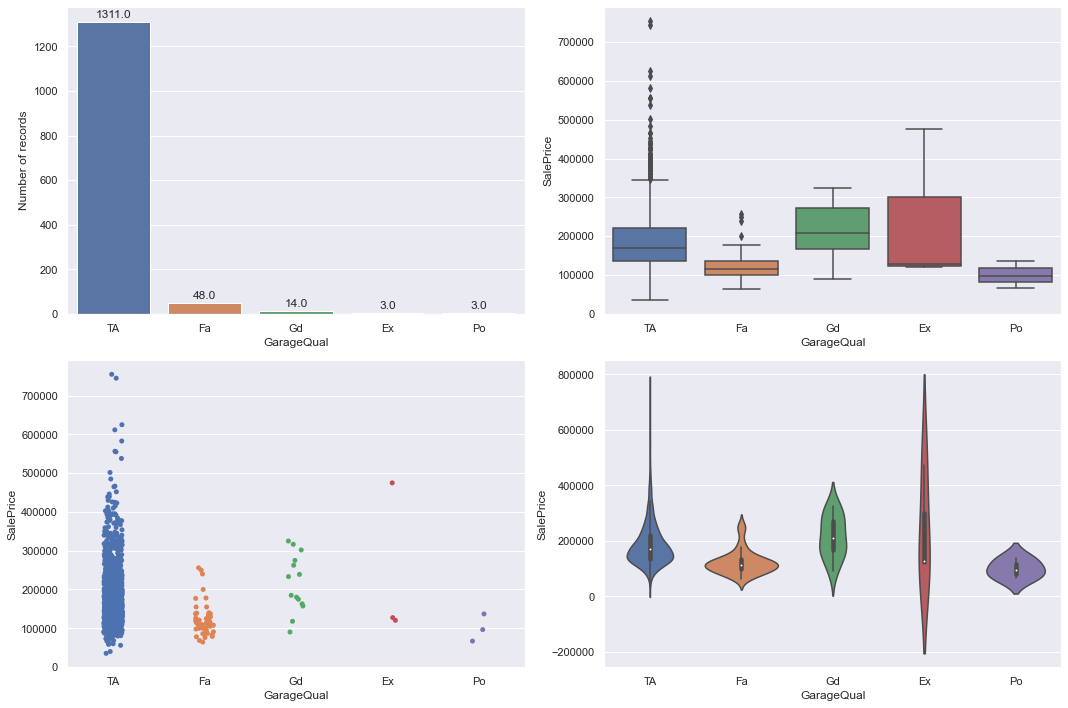


 
 

                                       GarageCond                                       
    Number of Unique Values 6
Datatype of column: object
Null Percentage:  5.5 %
Number of Non-null values 1379
Values like  ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']


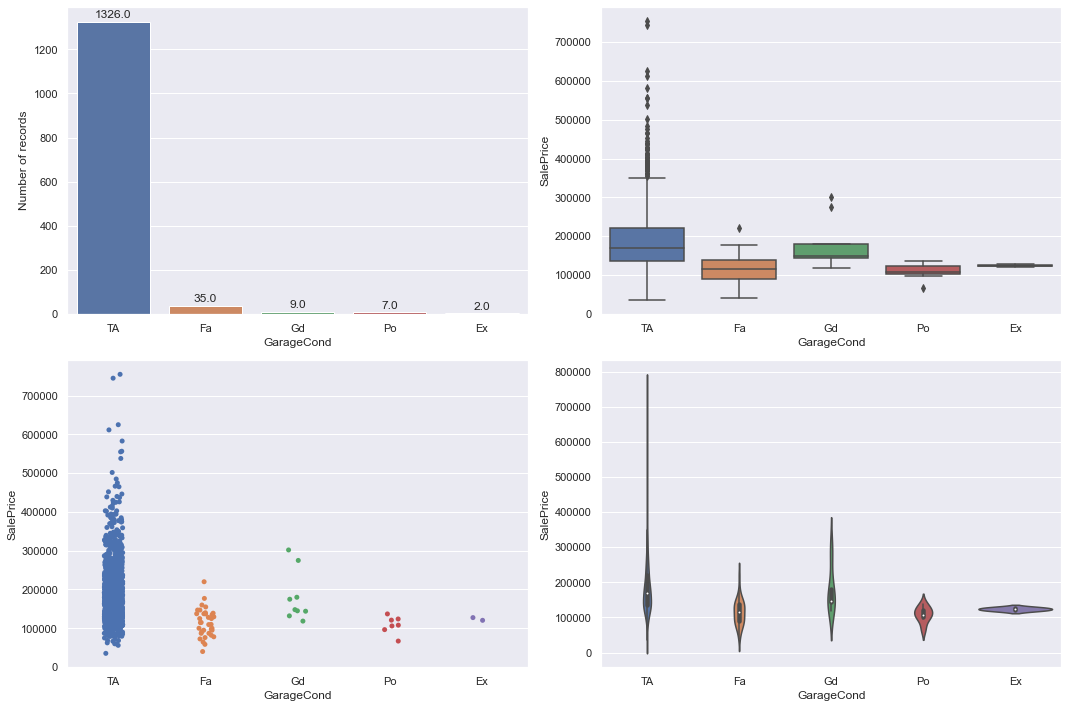


 
 

                                       PavedDrive                                       
    Number of Unique Values 3
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['N', 'P', 'Y']


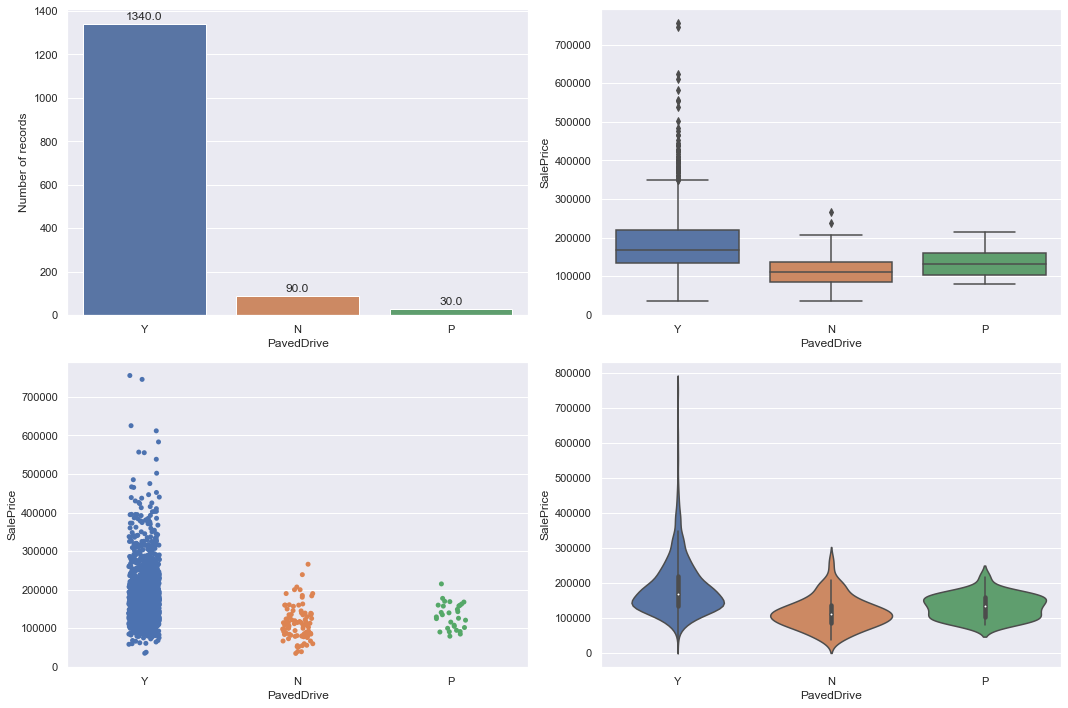


 
 

                                       WoodDeckSF                                       
    Number of Unique Values 274
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 12, 24, 26, 28, '.............', 668, 670, 728, 736, 857]


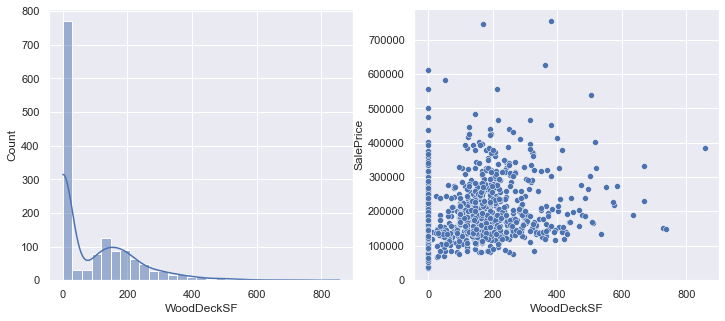


 
 

                                      OpenPorchSF                                       
    Number of Unique Values 202
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 4, 8, 10, 11, '.............', 406, 418, 502, 523, 547]


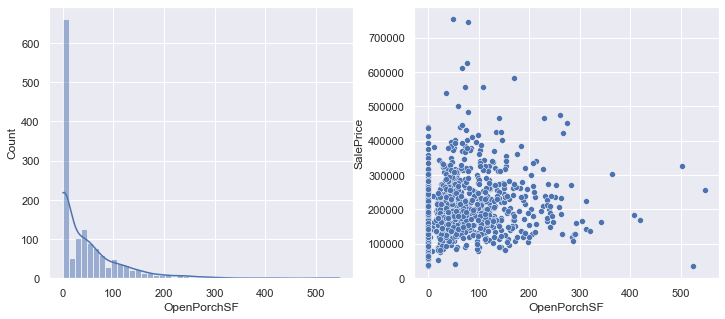


 
 

                                     EnclosedPorch                                      
    Number of Unique Values 120
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 19, 20, 24, 30, '.............', 301, 318, 330, 386, 552]


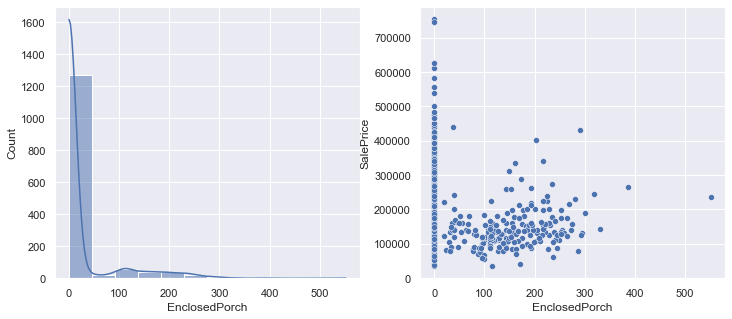


 
 

                                       3SsnPorch                                        
    Number of Unique Values 20
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 23, 96, 130, 140, '.............', 290, 304, 320, 407, 508]


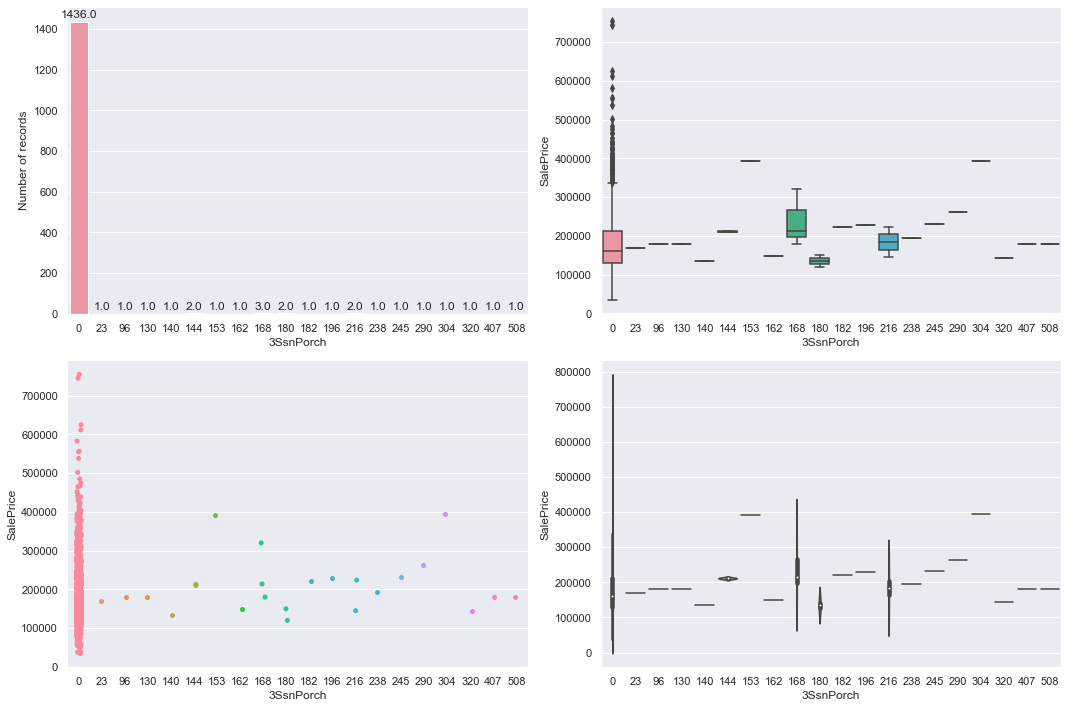


 
 

                                      ScreenPorch                                       
    Number of Unique Values 76
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 40, 53, 60, 63, '.............', 385, 396, 410, 440, 480]


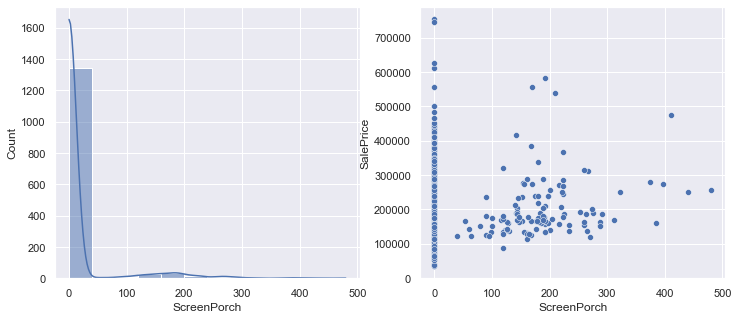


 
 

                                        PoolArea                                        
    Number of Unique Values 8
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 480, 512, 519, 555, 576, 648, 738]


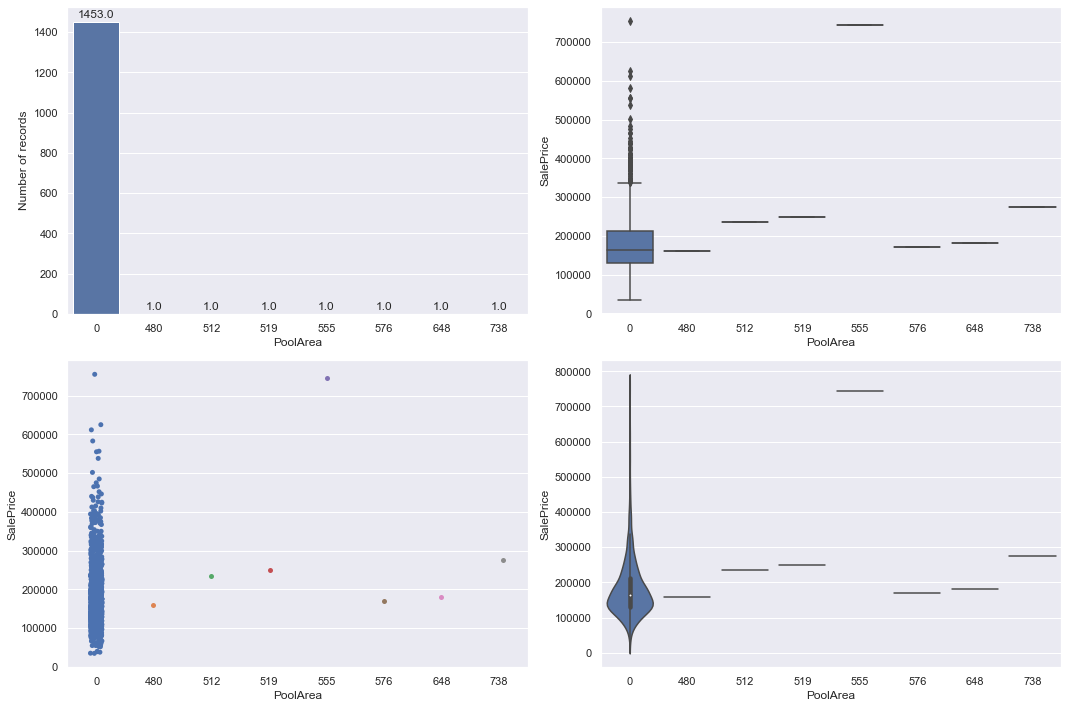


 
 

                                         PoolQC                                         
    Number of Unique Values 4
Datatype of column: object
Null Percentage:  99.5 %
Number of Non-null values 7
Values like  [nan, 'Ex', 'Fa', 'Gd']


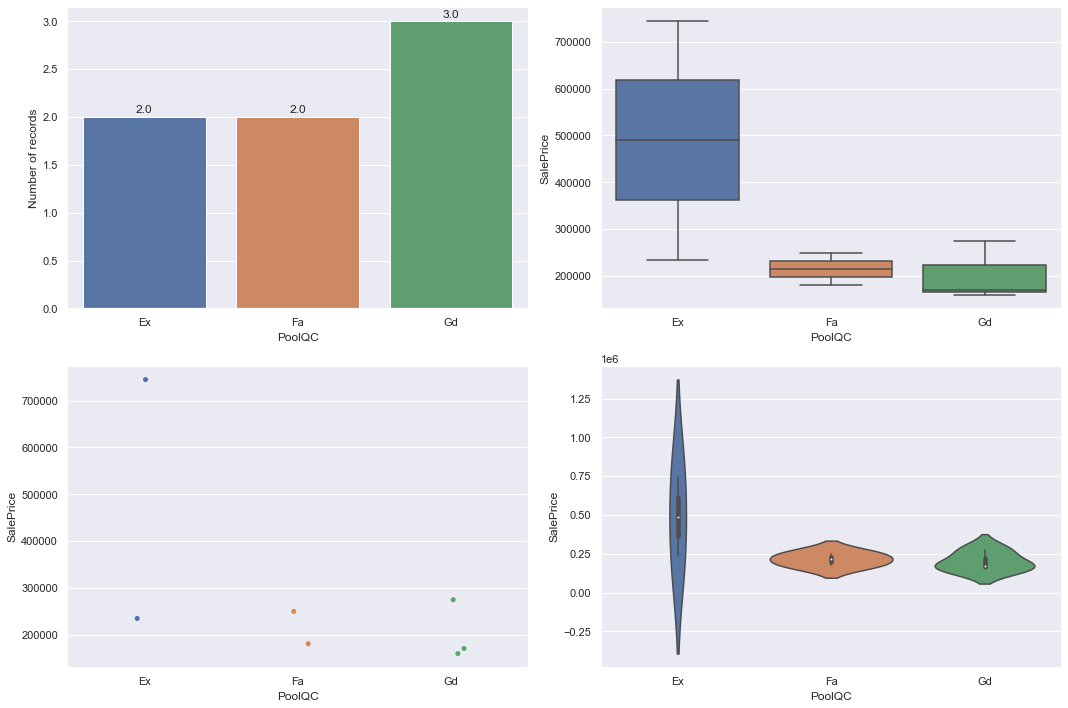


 
 

                                         Fence                                          
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  80.8 %
Number of Non-null values 281
Values like  [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']


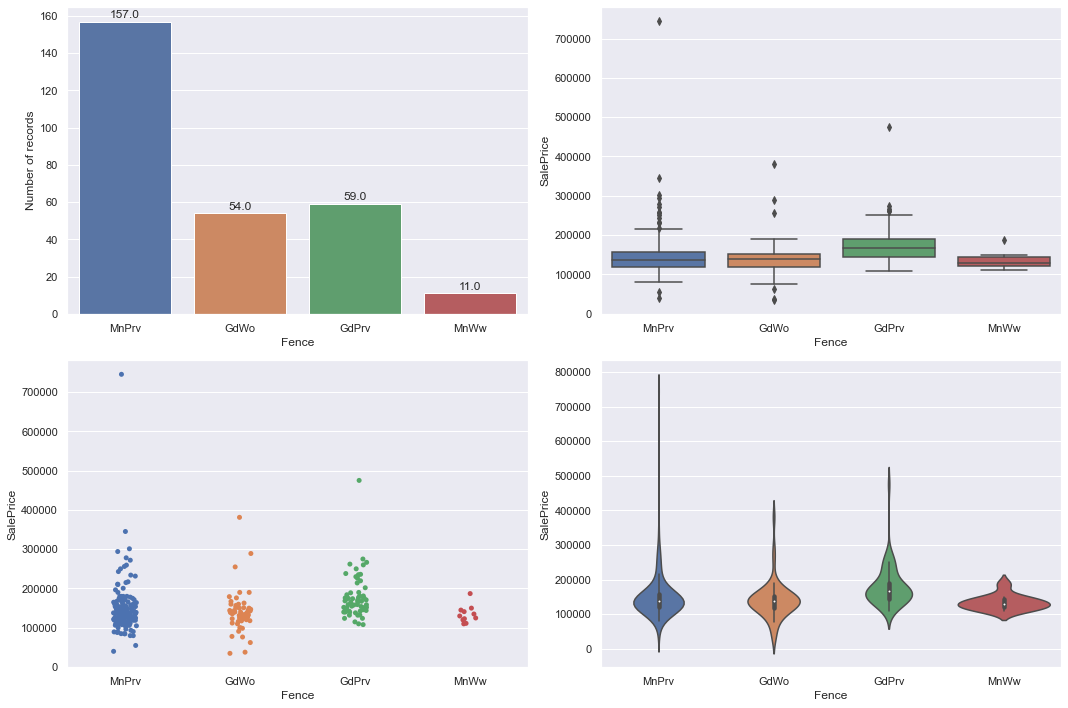


 
 

                                      MiscFeature                                       
    Number of Unique Values 5
Datatype of column: object
Null Percentage:  96.3 %
Number of Non-null values 54
Values like  [nan, 'Shed', 'Gar2', 'Othr', 'TenC']


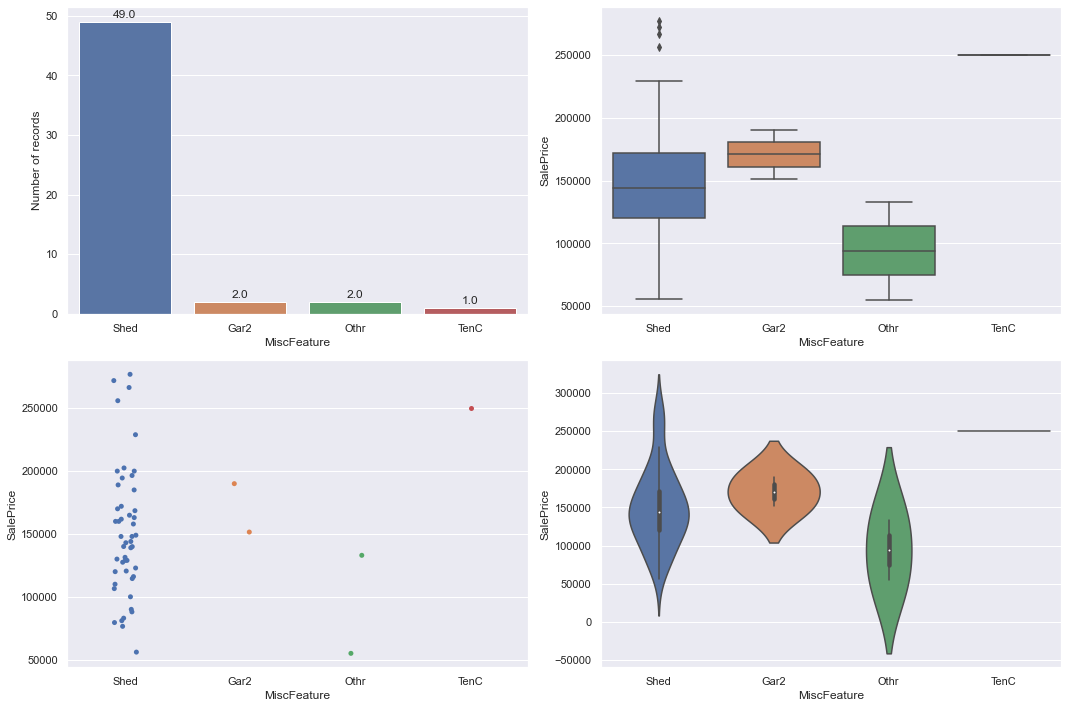


 
 

                                        MiscVal                                         
    Number of Unique Values 21
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 54, 350, 400, 450, '.............', 2000, 2500, 3500, 8300, 15500]


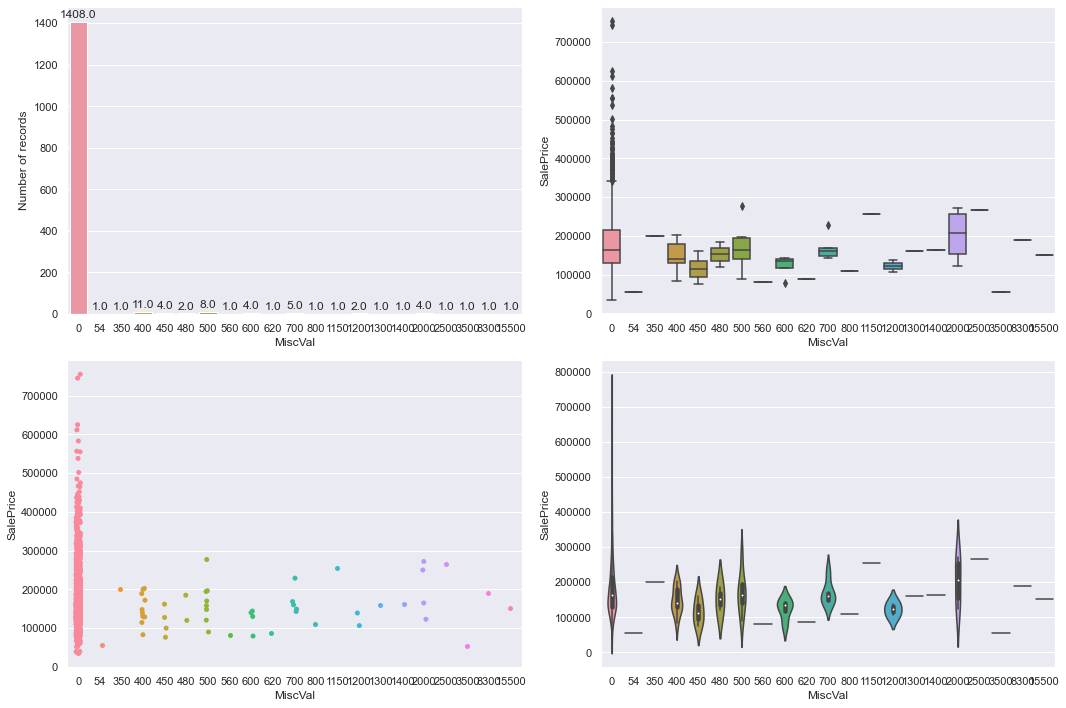


 
 

                                         MoSold                                         
    Number of Unique Values 12
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [1, 2, 3, 4, 5, '.............', 8, 9, 10, 11, 12]


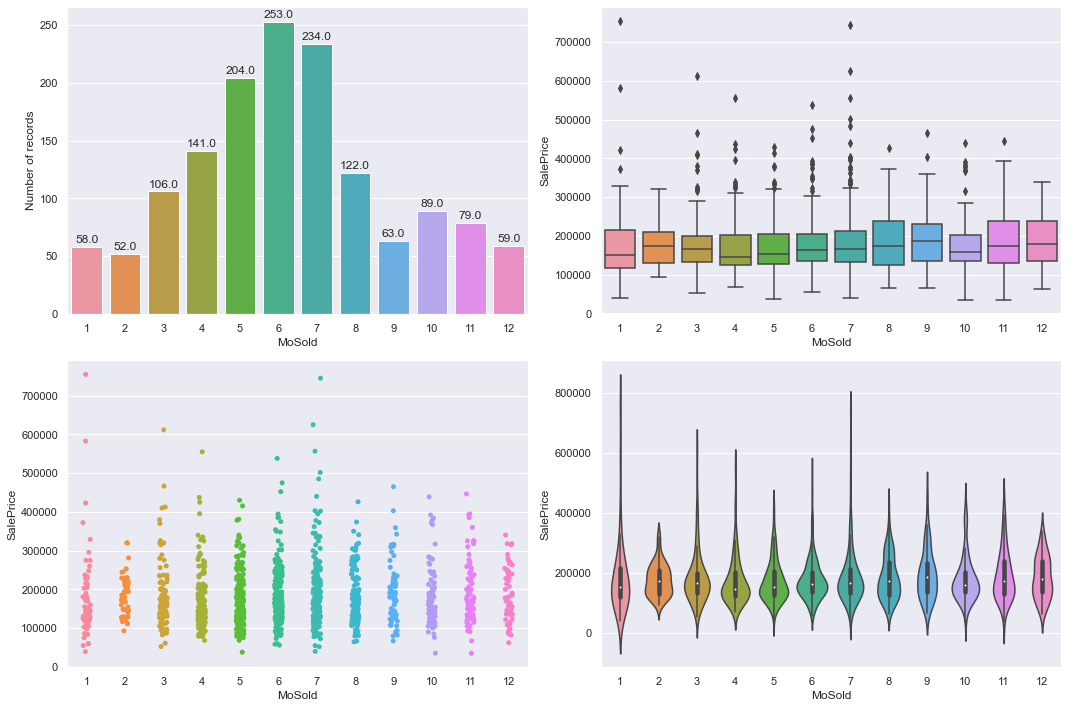


 
 

                                         YrSold                                         
    Number of Unique Values 5
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [2006, 2007, 2008, 2009, 2010]


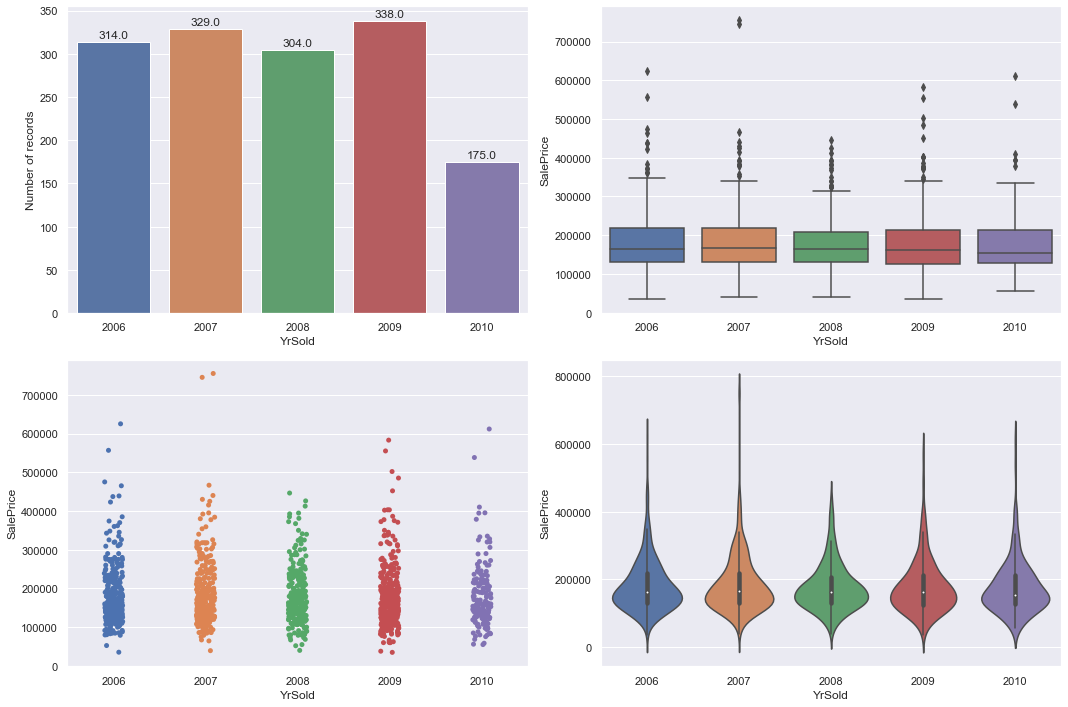


 
 

                                        SaleType                                        
    Number of Unique Values 9
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD']


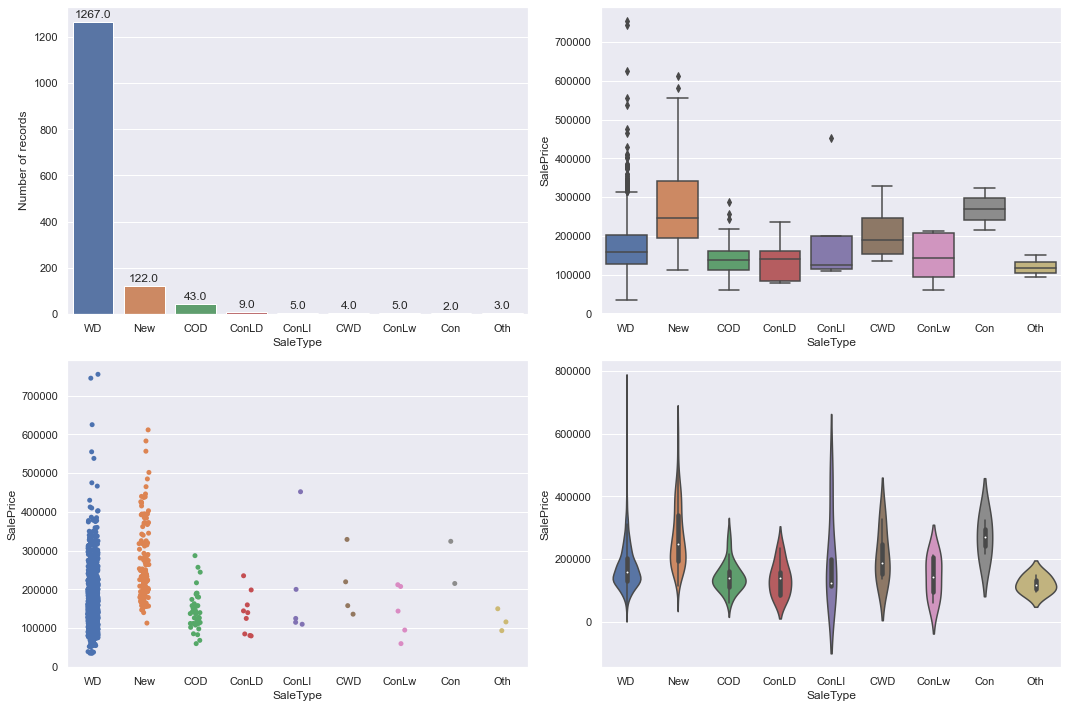


 
 

                                     SaleCondition                                      
    Number of Unique Values 6
Datatype of column: object
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  ['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']


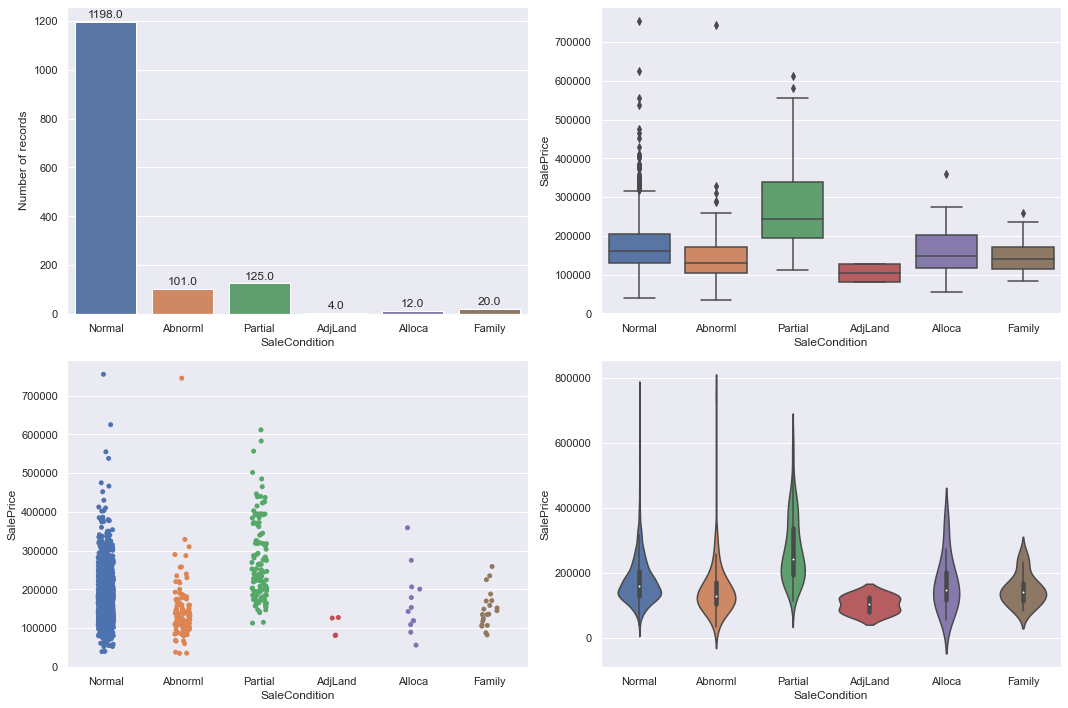


 
 

                                       SalePrice                                        
    Number of Unique Values 663
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [34900, 35311, 37900, 39300, 40000, '.............', 582933, 611657, 625000, 745000, 755000]


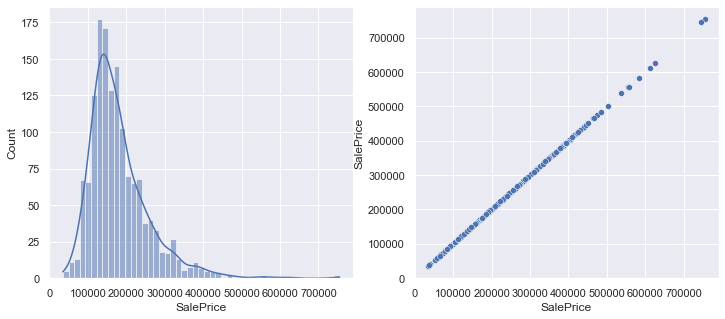

In [132]:
sns_eda.column_summary(df, 'SalePrice')

## Model 1
#### Trying out a simple model with 3-4 features, just to get hold of the Linear Regression function and it's attributes
The features selected are Overall Qual, YearBuilt, GrLivArea, TotRmsAbvGrd, GarageArea. These were selected by looking at the column summary graphs for each column in the dataset. I finalized 15 of them, selection criterion based on:
1. Distribution
2. Pattern w.r.t. Dependent Variable i.e. SalePrice
3. Null %

Out of these, were few category columns, and few clearly corelated columns just from their definition. Am down to these 5 columns by roughly understanding the data

In [125]:
X=df[['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'YearBuilt']]
Y=df['SalePrice'].values.reshape(-1, 1)

In [121]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [127]:
r_sq = model.score(X, Y)
print('The R squared of the model comes out to be ', r_sq)

The R squared of the model comes out to be  0.7520786514837667


In [138]:
model.coef_

array([[23011.20135037,    59.40550552, -1358.98661172,    57.3490275 ,
          379.18600195]])

In [136]:
#test data
df_test=pd.read_csv('C:\\Users\\hp\\Desktop\\Python\\Kaggle\\Housing Prices Prediction\\test.csv')
df_test1=df_test[['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'YearBuilt']]

In [180]:
EDA.EDA_summary(df_test1)

Column Name Data Type Non-null Count Null Percentage Unique Count  \
0   OverallQual     int64           1459           0.0 %           10   
1     GrLivArea     int64           1459           0.0 %          879   
2  TotRmsAbvGrd     int64           1459           0.0 %           12   
3    GarageArea   float64           1459           0.0 %          460   
4     YearBuilt     int64           1459           0.0 %          106   

                                            Examples  
0                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  
1  [407, 492, 498, 540, 572, ............., 3390,...  
2  [3, 4, 5, 6, 7, ............., 10, 11, 12, 13,...  
3  [0.0, 100.0, 160.0, 162.0, 164.0, ...............  
4  [1879, 1880, 1890, 1895, 1896, ............., ...

In [199]:
#imputing the mean of the garage area to the missing values
mean_g_area = df_test1['GarageArea'].mean()
df_test1['GarageArea'][1116]=mean_g_area 

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [186]:
#
arr_predict = model.predict(df_test1)
arr_id = np.array(df_test['Id']).reshape(-1,1) 
df_predict = pd.DataFrame(np.concatenate((arr_id, arr_predict), axis=1), columns=['Id', 'SalePrice'])
os.chdir('C:\\Users\\hp\\Desktop\\Python\\Kaggle\\Housing Prices Prediction')
df_predict.to_csv('model1_submission.csv')

In [149]:
df_corr=df.append(df_test)

In [157]:
df_corr.corr()['GarageArea'].sort_values(ascending=False)

GarageArea       1.000000
GarageCars       0.889700
SalePrice        0.623431
OverallQual      0.565122
GarageYrBlt      0.555836
1stFlrSF         0.492011
TotalBsmtSF      0.486067
GrLivArea        0.485469
YearBuilt        0.480735
FullBath         0.408487
YearRemodAdd     0.376765
MasVnrArea       0.374061
LotFrontage      0.359786
TotRmsAbvGrd     0.328687
BsmtFinSF1       0.310449
Fireplaces       0.294767
WoodDeckSF       0.238075
OpenPorchSF      0.232559
LotArea          0.213251
BsmtFullBath     0.184738
HalfBath         0.178993
BsmtUnfSF        0.164409
2ndFlrSF         0.128570
BedroomAbvGr     0.073912
ScreenPorch      0.062389
PoolArea         0.053049
MoSold           0.040335
3SsnPorch        0.029440
MiscVal          0.008446
BsmtFinSF2       0.003139
Id              -0.008865
YrSold          -0.013451
BsmtHalfBath    -0.021445
LowQualFinSF    -0.053551
KitchenAbvGr    -0.057852
MSSubClass      -0.103394
EnclosedPorch   -0.106417
OverallCond     -0.154149
Name: Garage

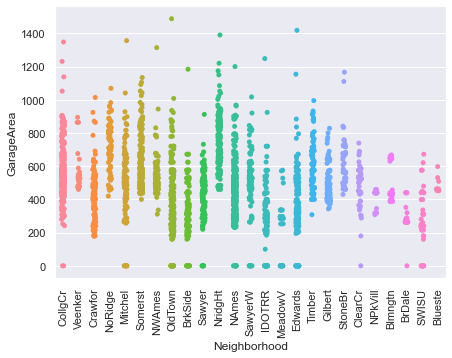

In [162]:
vis = sns.stripplot(x='Neighborhood', y='GarageArea', data=df_corr)
vis.set_xticklabels(vis.get_xticklabels(), rotation=90)
plt.show()

                                      OverallQual                                       
    Number of Unique Values 10
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


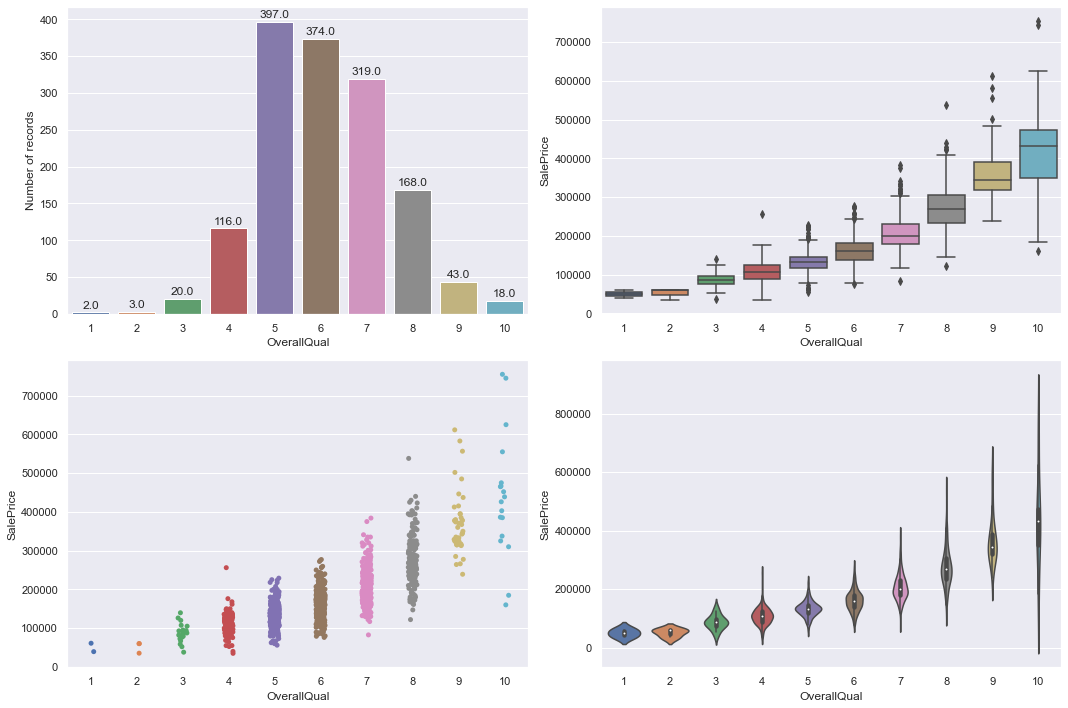


 
 

                                       GrLivArea                                        
    Number of Unique Values 861
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [334, 438, 480, 520, 605, '.............', 3627, 4316, 4476, 4676, 5642]


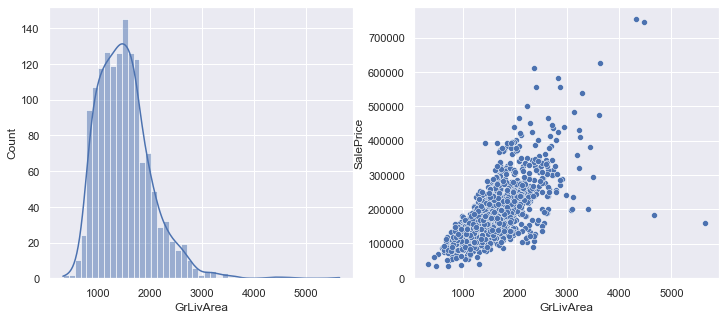


 
 

                                      TotRmsAbvGrd                                      
    Number of Unique Values 12
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [2, 3, 4, 5, 6, '.............', 9, 10, 11, 12, 14]


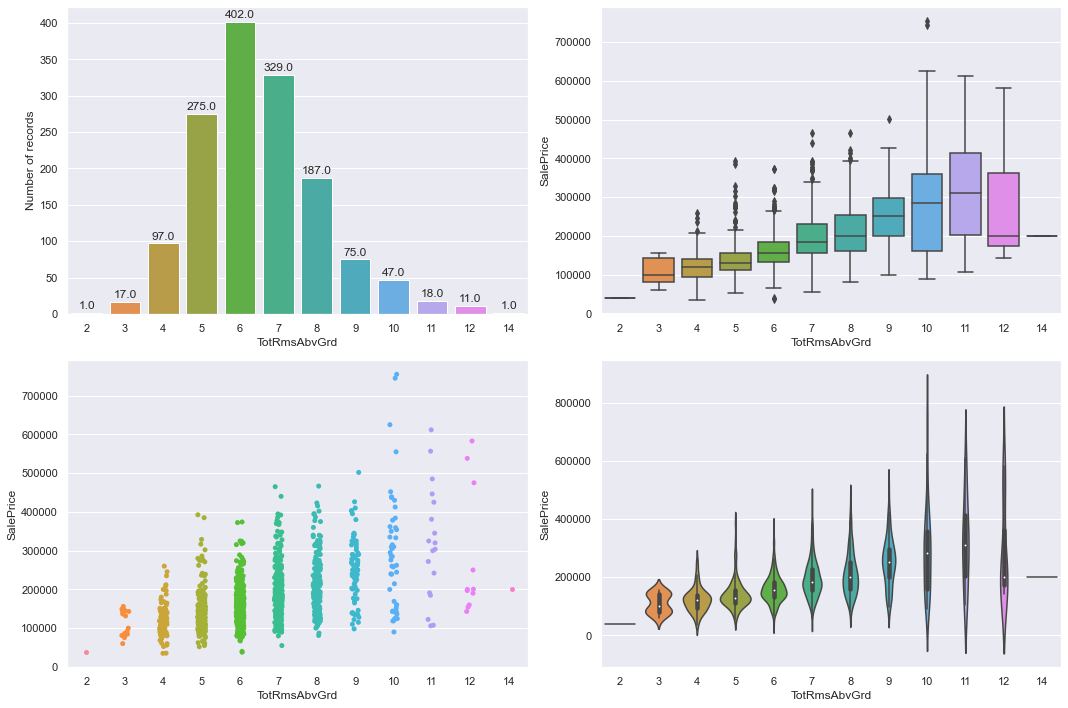


 
 

                                       GarageArea                                       
    Number of Unique Values 441
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [0, 160, 164, 180, 186, '.............', 1220, 1248, 1356, 1390, 1418]


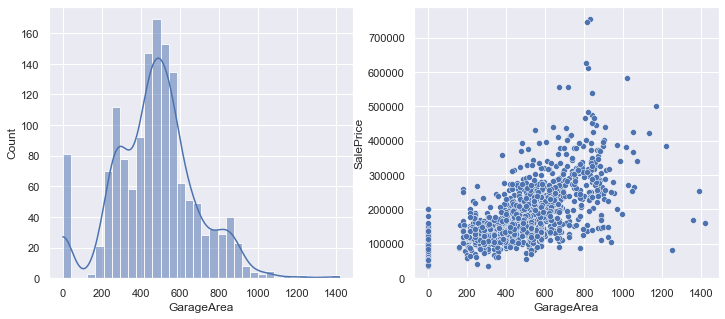


 
 

                                       YearBuilt                                        
    Number of Unique Values 112
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [1872, 1875, 1880, 1882, 1885, '.............', 2006, 2007, 2008, 2009, 2010]


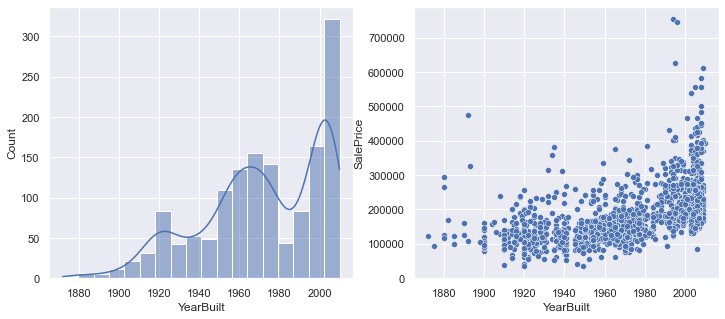


 
 

                                       SalePrice                                        
    Number of Unique Values 663
Datatype of column: int64
Null Percentage:  0.0 %
Number of Non-null values 1460
Values like  [34900, 35311, 37900, 39300, 40000, '.............', 582933, 611657, 625000, 745000, 755000]


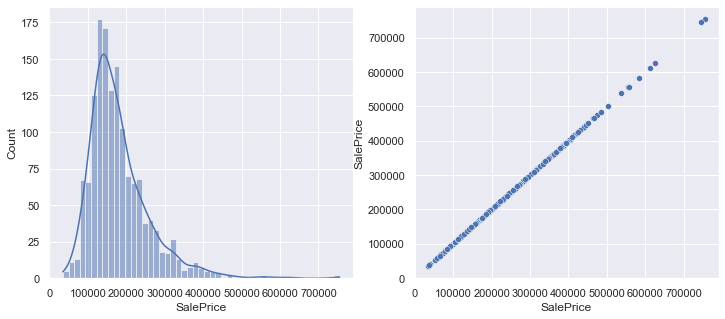

In [198]:
sns_eda.column_summary(df[['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'YearBuilt', 'SalePrice']], 'SalePrice')

In [168]:
df_test1['GarageArea'].mean()

472.76886145404666